# Modelamiento Dengue SIR SI

In [24]:
import numpy as np #para manejar matrices
from scipy.integrate import odeint #para resolver ecuaciones diferenciales ordinarias
import matplotlib.pyplot as plt #Para plotear
import math #para la raiz cuadrada

## Modelo SIR - SI

### SIR (Host - Humanos)

$S_h = - \dfrac{ \beta_{vh} S_h I_v}{N_h} $

$I_h = \dfrac{ \beta_{vh} S_h I_v}{N_h} - \gamma I_h$

$ R_h = \gamma I_h$

### SI (Vector - Mosquitos)

$S_v = - \dfrac{ \beta_{hv} S_v I_h}{N_h} - \mu_v S_v$

$I_v = \dfrac{ \beta_{hv} S_v I_h}{N_h} - \mu_v I_v$,

donde $S$ corresponde a la población susceptible,

$I$ corresponde a la población infectada/infecciosa,

$R$ corresponde a la población recuperada,

$N$ es el número total de la población

y los subíndices $v$ y $h$ corresponden a la población de vectores y hosts respectivamente.

En cuanto a los parámetros, estos son:

$\beta_{hv}$: tasa de trasmisibilidad host a vector.

$\beta_{vh}$: tasa de trasmisibilidad vector a host.

$u_v$: tasa de mortalidad de los vectores.

$\gamma$: tasa de recuperación.

Los parámetros $\beta$ están definidos como:

$\beta_{hv} = x_1 b b_h$ 

y

$\beta_{hv} = x_2 b b_m$,

donde $x_1$ y $x_2$ son la probabilidad de transmisión vector-a-host y host-a-vector respectivamente,

$b$ es la tasa de picaduras y, $b_h$ y $b_m$ son la probabilidad de transimisión del virus por picadurad vector-a-host y host-a-vector respectivamente.

Datos de la población de Humanos (Host)

In [25]:
#N_h = 520450
N_h = 3000
I0_h = 1
R0_h = 0
S0_h = N_h - I0_h

In [26]:
# Initial conditions vector
#S0vn = S0_v/N_v
#I0vn = I0_v/N_v
S0hn = S0_h/N_h
I0hn = I0_h/N_h
R0hn = R0_h/N_h
#S0hn = S0_h
#I0hn = I0_h
#R0hn = R0_h
#y0 = S0vn, I0vn,S0hn, I0hn, R0hn
#y0 = S0_v, I0_v,S0_h, I0_h, R0_h
y0 = S0_h, I0_h, R0_h

In [27]:
# A grid of time points (in days)
t = np.linspace(0, 20, 20)

# The SIR model differential equations.
def deriv(y, t, x_1,x_2):
    Sv, Iv, Sh, Ih, Rh = y
    #T=temperatura(t)
    T=24.6
    #x_1=0.3841
    #x_2=1
    
    if(T<=13.35 or T>=40.08):
        b=0
    else:
        b=0.00202*T*(T-13.35) * math.sqrt(40.08 - T)   
    
    if(T<=12.286 or T>=32.461):
        b_h=0
    else:
        b_h=0.001044*T*(T-12.286) * math.sqrt(32.461 - T)
        
    if(T>=12.4 and T<=26.1):
        b_m=-0.9037+0.0727*T
    elif(T>26.1 and T<=32.5):
        b_m=1
    else:
        b_m=0
    
    
    beta_hv=x_2*b*b_m
    beta_vh=x_1*b*b_h
    u_v=(8.692/10000)-((1.590/10000)*T)+((1.116/100000)* (T**2)) - ((3.408/10000000)*(T**3)) + ((3.809/1000000000)*(T**4))
    
    
    gamma= 1./7
    
    
    dShdt = -beta_vh * Sh * Iv/N_h
    dIhdt = beta_vh * Sh * Iv/N_h -(gamma * Ih)
    dRhdt = gamma * Ih
    dSvdt = -beta_hv * Sv * Ih/N_h - (u_v*Sv)
    dIvdt = beta_hv * Sv * Ih/N_h - (u_v*Iv)

    return dSvdt, dIvdt,dShdt, dIhdt, dRhdt








In [28]:
def derivart(y, t, N, beta, gamma):
    S, I ,R = y
    dSdt = -beta * S * I/N 
    dIdt = beta * S * I/N - gamma * I
    dRdt = gamma * I/N
    return dSdt, dIdt, dRdt

In [29]:

# Integrate the SIR equations over the time grid, t.
#ret = odeint(deriv, y0, t, args=(x_1,x_2))
beta=0.3
gamma=0.7
print("y0",y0,"t",t,"gamma: ",gamma," beta: ",beta)
ret = odeint(derivart, y0, t, args=(N_h, beta, gamma))
#Sv, Iv, Sh, Ih, Rh = ret.T
Sh, Ih, Rh = ret.T

y0 (2999, 1, 0) t [ 0.          1.05263158  2.10526316  3.15789474  4.21052632  5.26315789
  6.31578947  7.36842105  8.42105263  9.47368421 10.52631579 11.57894737
 12.63157895 13.68421053 14.73684211 15.78947368 16.84210526 17.89473684
 18.94736842 20.        ] gamma:  0.7  beta:  0.3


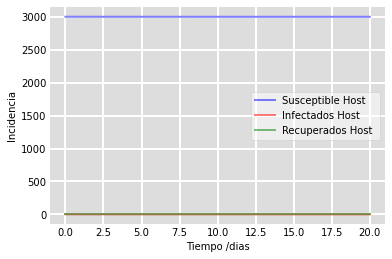

In [30]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
#ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(t, Ih, 'r', alpha=0.5, lw=2, label='Infectados Host')
ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
ax.set_xlabel('Tiempo /dias')
ax.set_ylabel('Incidencia')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Datos de Comas

In [31]:
import os
import pandas as pd
path = "./data/SIRSI/"
filename_read = os.path.join(path,"COMAS_CASOS_DISTRITO.csv")
dataset = pd.read_csv(filename_read,delimiter=";",engine='python')
#dataset[dataset['Distrito']=='COMAS']
dataset=dataset[dataset['Anho']==2017]
dataset


,Departamento,Distrito,Provincia,numero_casos,ocntrol1,Texto_casos,Texto_casos_confirmados,Texto_muertes,texto_Titulo,Anho,...,Referencia,SelectMorbilidad,SHAPE.AREA,SHAPE.LEN,SiCasoacum,siMax,TASA ACUMULADA,Texto2,Texto3,vraem
53,LIMA,COMAS,LIMA,0 caso,150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,0,NaN,0,0
54,LIMA,COMAS,LIMA,0 caso,150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,0,NaN,0,0
55,LIMA,COMAS,LIMA,0 caso,150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,0,NaN,0,0
56,LIMA,COMAS,LIMA,0 caso,150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,0,NaN,0,0
57,LIMA,COMAS,LIMA,0 caso,150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,0,NaN,0,0
58,LIMA,COMAS,LIMA,0 caso,150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,0,NaN,0,0
59,LIMA,COMAS,LIMA,0 caso,150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,0,NaN,0,0
60,LIMA,COMAS,LIMA,1 caso,1150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,"1,15",1,"0,004054754","0,317464297",1,0,"0,009859013",100,0,0
61,LIMA,COMAS,LIMA,2 casos,2150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,"1,15",1,"0,004054754","0,317464297",1,0,"0,019718026",100,0,0
62,LIMA,COMAS,LIMA,2 casos,2150110,", LIMA, LIMA",", LIMA, LIMA",", LIMA, LIMA",Situaci¢n actual de Dengue. semana epidemiol¢g...,2017,...,0,1,"0,004054754","0,317464297",1,0,"0,019718026",100,0,0


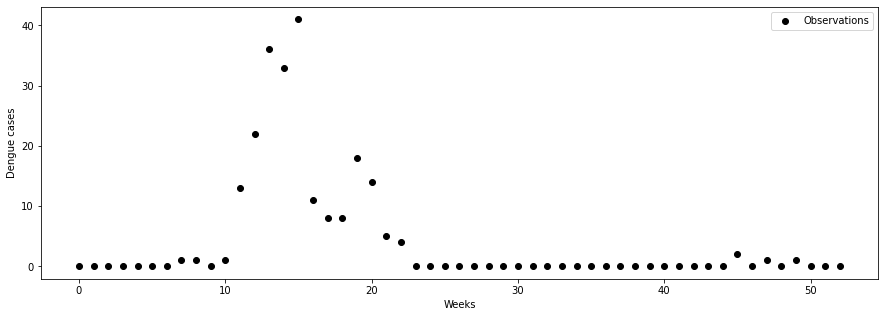

In [32]:
dataset = dataset.reset_index(drop=True)
# graficando 
graf = dataset['Casos']
#noise(graf)
plt.figure(figsize=(15,5));
#legend = plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Dengue cases')
#plt.title(depto)
plt.plot(graf,'ko',label="Observations")
plt.legend()
plt.show()

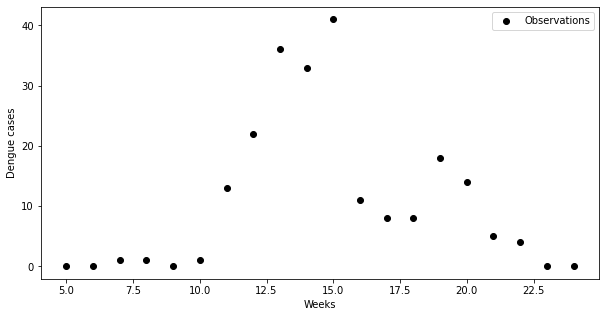

In [33]:
dataset = dataset[5:25]
# graficando 
graf = dataset['Casos']
#noise(graf)
plt.figure(figsize=(10,5));
#legend = plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Dengue cases')
#plt.title(depto)
plt.plot(graf,'ko',label="Observations")
plt.legend()
plt.show()

In [34]:
datos=graf.to_numpy()

In [35]:
print(datos)

[ 0  0  1  1  0  1 13 22 36 33 41 11  8  8 18 14  5  4  0  0]


In [36]:
from scipy.stats import poisson
from scipy.stats import norm

from scipy.integrate import odeint as ode
def m_a(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
def NLL(params, data): #negative log likelihood
    params = np.abs(params)
    beta=params[0]
    gamma=params[1]
    #k=params[2]
    data = np.array(data)
    ret = odeint(derivart, y0, t, args=(N_h, beta, gamma))
    Sh, Ih, Rh = ret.T
    y=Ih
    #nll = sum(y) - sum(data*np.log(y))
    
    # note this is a slightly shortened version--there's an additive constant term missing but it 
    # makes calculation faster and won't alter the threshold. Alternatively, can do:
    #nll = -sum(np.log(poisson.pmf((data),(y)))) # the round is b/c Poisson is for (integer) count data
    # this can also barf if data and y are too far apart because the dpois will be ~0, which makes the log angry
    #nll = -sum(np.log(norm.pdf(data,y,0.1*m_a(data)))) 
    # ML using normally distributed measurement error (least squares)
    nll = -sum(np.log(norm.pdf(data,y,0.1*np.mean(data)))) # example WLS assuming sigma = 0.1*mean(data)
    #nll = sum((y - data)**2)  # alternatively can do OLS but note this will mess with the thresholds 
    #                             for the profile! This version of OLS is off by a scaling factor from
    #                             actual LL units.
    print(" beta: ",beta,"gamma: ",gamma, "NLL: ",nll)
    
    return nll

 beta:  0.3 gamma:  0.7 NLL:  2387.018191258605
 beta:  0.315 gamma:  0.7 NLL:  2386.4200936633065
 beta:  0.3 gamma:  0.735 NLL:  2388.148797356511
 beta:  0.315 gamma:  0.6649999999999999 NLL:  2384.6783378956684
 beta:  0.3225 gamma:  0.6299999999999997 NLL:  2381.6906699738674
 beta:  0.33749999999999997 gamma:  0.6299999999999997 NLL:  2380.33202305235
 beta:  0.35624999999999996 gamma:  0.5949999999999995 NLL:  2373.578628227691
 beta:  0.36374999999999996 gamma:  0.5249999999999992 NLL:  2355.151119823612
 beta:  0.38812499999999994 gamma:  0.4374999999999989 NLL:  2284.341329602203
 beta:  0.4218749999999999 gamma:  0.40249999999999875 NLL:  2177.71564885285
 beta:  0.4715624999999999 gamma:  0.2887499999999983 NLL:  2709.426476225268
 beta:  0.4537499999999999 gamma:  0.2449999999999981 NLL:  inf
 beta:  0.38062499999999994 gamma:  0.5074999999999992 NLL:  2341.228734540546
 beta:  0.4293749999999999 gamma:  0.33249999999999846 NLL:  1962.3200224705708
 beta:  0.45375 gamma:  

<ipython-input-36-e235534832fe>:26: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(norm.pdf(data,y,0.1*np.mean(data)))) # example WLS assuming sigma = 0.1*mean(data)


 3.8114372831409113 gamma:  3.2349044930678246 NLL:  535.0170963154148
 beta:  3.778134985552526 gamma:  3.240730492373057 NLL:  424.8478327885241
 beta:  3.293063948246763 gamma:  2.8211205109121025 NLL:  529.5937827377106
 beta:  3.8137921420244574 gamma:  3.2975512395346005 NLL:  411.52567792988197
 beta:  4.089629958265724 gamma:  3.501530230959846 NLL:  592.109876496153
 beta:  3.6491303665498758 gamma:  3.15294618345082 NLL:  405.1554744420275
 beta:  3.6847875230218077 gamma:  3.2097669306123633 NLL:  431.82537017213497
 beta:  3.7547981199198466 gamma:  3.232989601932884 NLL:  407.4913199216974
 beta:  3.5901363444452645 gamma:  3.0883845458491033 NLL:  408.51712212698925
 beta:  3.6460502938400623 gamma:  3.1406762192704774 NLL:  402.91427287381936
 beta:  3.540382540470092 gamma:  3.0606328007884134 NLL:  426.295344762551
 beta:  3.701194225057408 gamma:  3.1899004016467662 NLL:  402.01739193416904
 beta:  3.698114152347595 gamma:  3.1776304374664237 NLL:  406.28886629715083


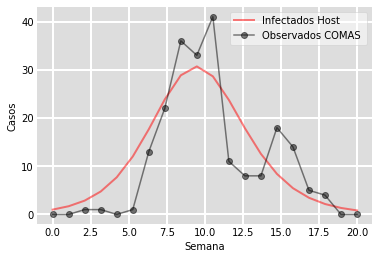

In [37]:
import scipy.optimize as optimize
beta=0.3
gamma=0.7
#k=500000
params=[beta,gamma]
optimizer = optimize.minimize(NLL, params, args=(datos), method='Nelder-Mead')
bounds = [(0.0,50.0),(1./7,1./7)]
#optimizer = optimize.differential_evolution(NLL, bounds, args=(datos,))
paramests = np.abs(optimizer.x)
beta_est=paramests[0] 
gamma_est=paramests[1]
#k_est=paramests[2]

t = np.linspace(0, 20, 20)
print("y0",y0,"t",t,"beta estimado",beta_est,"gamma estimado",gamma_est)
# Integrate the SIR equations over the time grid, t.
ret = odeint(derivart, y0, t, args=(N_h, beta_est, gamma_est))
#ret = odeint(derivart, y0, t, args=(N, beta, gamma))
Sh, Ih, Rh = ret.T
print('I',Ih)
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
#ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
#ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(t, Ih, 'r', alpha=0.5, lw=2, label='Infectados Host')
#ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
ax.plot(t, datos, 'black', alpha=0.5, marker='o', label='Observados COMAS ')
ax.set_xlabel('Semana')
ax.set_ylabel('Casos')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


In [38]:
#def derivart(y, t, N, beta, gamma):
#    S, I ,R = y
#    dSdt = -beta * S * I / N
#    dIdt = beta * S * I / N - gamma * I
#    dRdt = gamma * I
#    return dSdt, dIdt, dRdt

In [39]:
import scipy.stats as stats 

In [40]:
def log_prior(theta):
    beta, gamma = theta
   #print("here")
    lp=np.log(stats.gamma.pdf(beta, a=0.6, scale=10000))+np.log(stats.gamma.pdf(gamma, a=0.7, scale=100))
    return lp

In [41]:
def log_probability(theta, data, times,k):
    lp = log_prior(theta)
   # print(theta)
    if not np.isfinite(lp):
        return -np.inf
    nl= NLL(theta,data)
  
    return lp - nl

In [42]:
import emcee

In [43]:
paramests[0:2]

array([3.68820853, 3.18040245])

In [44]:
# Initialize the walkers
coords = paramests[0:2]+ 1e-9 * np.random.randn(30,2)
nwalkers, ndim = coords.shape

# Set up the backend
# Don't forget to clear it in case the file already exists
filename = "tutorial3.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim,log_probability, args=(datos,t,paramests[1]), backend=backend)


In [45]:
max_n = 10000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(coords, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 200:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1
    print(tau)
    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

 beta:  3.688208530054716 gamma:  3.1804024484436426 NLL:  401.69124643496957
 beta:  3.6882085296834237 gamma:  3.180402447556791 NLL:  401.69124643541636
 beta:  3.688208530074789 gamma:  3.1804024484935134 NLL:  401.6912464347658
 beta:  3.688208527084964 gamma:  3.180402447995118 NLL:  401.69124643379257
 beta:  3.6882085279701204 gamma:  3.180402448205506 NLL:  401.6912464341135
 beta:  3.6882085279512418 gamma:  3.180402447878892 NLL:  401.6912464343102
 beta:  3.688208530299223 gamma:  3.180402448652457 NLL:  401.69124643513436
 beta:  3.6882085289035613 gamma:  3.180402449099289 NLL:  401.6912464342905
 beta:  3.6882085295530618 gamma:  3.180402446830171 NLL:  401.6912464353232
 beta:  3.688208528046697 gamma:  3.1804024486266287 NLL:  401.69124643362665
 beta:  3.6882085294243763 gamma:  3.1804024480164115 NLL:  401.6912464346728
 beta:  3.688208527637455 gamma:  3.180402449390814 NLL:  401.6912464333606
 beta:  3.688208527947825 gamma:  3.180402449238698 NLL:  401.69124643364

  0%|                                                                                | 1/10000 [00:00<31:26,  5.30it/s]

 beta:  3.688208530065277 gamma:  3.1804024474122086 NLL:  401.6912464356188
 beta:  3.6882085287148674 gamma:  3.1804024489952023 NLL:  401.6912464342462
 beta:  3.688208529513595 gamma:  3.180402446877238 NLL:  401.69124643531177
 beta:  3.6882085288696644 gamma:  3.1804024482621105 NLL:  401.6912464344164
 beta:  3.6882085248641117 gamma:  3.180402447880499 NLL:  401.69124643278104
 beta:  3.6882085287974378 gamma:  3.1804024485830817 NLL:  401.69124643419264
 beta:  3.6882085294817872 gamma:  3.180402449025104 NLL:  401.6912464343175
 beta:  3.6882085305615657 gamma:  3.1804024471248016 NLL:  401.6912464361228
 beta:  3.6882085287826567 gamma:  3.180402448881264 NLL:  401.69124643398374
 beta:  3.688208530202029 gamma:  3.1804024498132715 NLL:  401.6912464343459
 beta:  3.688208528609936 gamma:  3.180402447801667 NLL:  401.69124643421213
 beta:  3.6882085312690216 gamma:  3.1804024471899135 NLL:  401.6912464360608
 beta:  3.688208532762468 gamma:  3.180402447651667 NLL:  401.691246

  0%|                                                                                | 2/10000 [00:00<27:29,  6.06it/s]

 beta:  3.6882085304427923 gamma:  3.1804024463686713 NLL:  401.6912464361172
 beta:  3.688208531483423 gamma:  3.180402450224094 NLL:  401.69124643462425
 beta:  3.68820853082991 gamma:  3.180402447191006 NLL:  401.6912464360434
 beta:  3.6882085280049974 gamma:  3.180402448552701 NLL:  401.6912464338836
 beta:  3.6882085287986794 gamma:  3.1804024482644415 NLL:  401.69124643447213
 beta:  3.6882085317229905 gamma:  3.180402450876059 NLL:  401.69124643465165
 beta:  3.688208523613022 gamma:  3.1804024477613067 NLL:  401.69124643245783
 beta:  3.6882085282661823 gamma:  3.180402448615613 NLL:  401.6912464341676
 beta:  3.688208530742024 gamma:  3.1804024467971583 NLL:  401.6912464360287
 beta:  3.688208530303396 gamma:  3.1804024500260826 NLL:  401.69124643444957
 beta:  3.688208527084293 gamma:  3.180402448360046 NLL:  401.6912464336592
 beta:  3.6882085314312443 gamma:  3.1804024471174213 NLL:  401.6912464362113
 beta:  3.688208530365903 gamma:  3.180402448067701 NLL:  401.6912464352

  0%|                                                                                | 4/10000 [00:00<22:26,  7.43it/s]

 3.6882085223682597 gamma:  3.180402447524692 NLL:  401.6912464318414
 beta:  3.6882085276739374 gamma:  3.180402447329757 NLL:  401.6912464344509
 beta:  3.6882085310145056 gamma:  3.180402445087422 NLL:  401.6912464368341
 beta:  3.6882085281526034 gamma:  3.180402447779927 NLL:  401.6912464344691
 beta:  3.6882085306881054 gamma:  3.180402447777581 NLL:  401.6912464355396
 beta:  3.6882085293128437 gamma:  3.1804024486897235 NLL:  401.6912464346061
 beta:  3.6882085300593492 gamma:  3.1804024467714114 NLL:  401.69124643590374
 beta:  3.688208528901581 gamma:  3.180402446966983 NLL:  401.6912464353019
 beta:  3.6882085230116086 gamma:  3.180402448299116 NLL:  401.6912464315251
 beta:  3.6882085262360147 gamma:  3.180402449069149 NLL:  401.6912464331087
 beta:  3.6882085310496455 gamma:  3.180402452233541 NLL:  401.69124643348465
 beta:  3.688208530238133 gamma:  3.18040244839272 NLL:  401.69124643507865
 beta:  3.688208522847008 gamma:  3.180402448632701 NLL:  401.69124643152617
 bet

  0%|                                                                                | 6/10000 [00:00<21:39,  7.69it/s]

401.69124643763905
 beta:  3.6882085338279507 gamma:  3.1804024499043444 NLL:  401.69124643602714
 beta:  3.688208534711077 gamma:  3.1804024471207724 NLL:  401.6912464377491
 beta:  3.6882085275283982 gamma:  3.1804024494977057 NLL:  401.6912464332181
 beta:  3.6882085311514436 gamma:  3.180402447147632 NLL:  401.69124643604795
 beta:  3.688208529906709 gamma:  3.180402452325972 NLL:  401.69124643337625
 beta:  3.6882085279790187 gamma:  3.1804024469857426 NLL:  401.69124643467444
 beta:  3.688208526730115 gamma:  3.180402456441032 NLL:  401.6912464297988
 beta:  3.6882085297933886 gamma:  3.180402448391514 NLL:  401.69124643481706
 beta:  3.6882085326315543 gamma:  3.1804024466445098 NLL:  401.69124643686496
 beta:  3.688208528971958 gamma:  3.1804024487714235 NLL:  401.6912464343167
 beta:  3.6882085289146898 gamma:  3.18040244732806 NLL:  401.69124643484594
 beta:  3.688208529689188 gamma:  3.180402447551215 NLL:  401.691246435231
 beta:  3.688208526117837 gamma:  3.180402447419573

  0%|                                                                                | 7/10000 [00:00<21:26,  7.77it/s]

 beta:  3.688208537135638 gamma:  3.180402448105694 NLL:  401.6912464382543
 beta:  3.6882085284538495 gamma:  3.1804024465782565 NLL:  401.69124643520524
 beta:  3.688208533436184 gamma:  3.1804024535002897 NLL:  401.69124643431473
 beta:  3.6882085301366097 gamma:  3.1804024479240716 NLL:  401.6912464350495
 beta:  3.688208528741063 gamma:  3.180402447779455 NLL:  401.69124643476044
 beta:  3.6882085254592196 gamma:  3.1804024504699155 NLL:  401.6912464319957
 beta:  3.688208531006847 gamma:  3.180402449141925 NLL:  401.6912464349539
 beta:  3.6882085272260885 gamma:  3.1804024584981643 NLL:  401.6912464291894
 beta:  3.6882085342890893 gamma:  3.1804024471377237 NLL:  401.69124643750075
 beta:  3.6882085314990274 gamma:  3.1804024485255225 NLL:  401.6912464355259
 beta:  3.6882085449009883 gamma:  3.1804024367993473 NLL:  401.6912464468528
 beta:  3.6882085266029514 gamma:  3.1804024512768723 NLL:  401.6912464316684
 beta:  3.688208533291019 gamma:  3.1804024459702758 NLL:  401.6912

  0%|                                                                                | 9/10000 [00:01<19:47,  8.41it/s]


 beta:  3.6882085332822268 gamma:  3.1804024459783875 NLL:  401.691246437535
 beta:  3.6882085315576267 gamma:  3.1804024442366483 NLL:  401.69124643758255
 beta:  3.688208527371914 gamma:  3.1804024488205815 NLL:  401.69124643351074
 beta:  3.688208522366708 gamma:  3.180402437913704 NLL:  401.6912464359382
 beta:  3.688208534932297 gamma:  3.1804024439166247 NLL:  401.6912464392704
 beta:  3.6882085327263687 gamma:  3.180402448108808 NLL:  401.6912464361972
 beta:  3.6882085333588956 gamma:  3.1804024481161313 NLL:  401.69124643649195
 beta:  3.6882085250323513 gamma:  3.1804024465898695 NLL:  401.69124643360885
 beta:  3.6882085239227402 gamma:  3.1804024470848122 NLL:  401.6912464326525
 beta:  3.6882085308908454 gamma:  3.1804024721231583 NLL:  401.6912464245733
 beta:  3.6882085312497557 gamma:  3.1804024514201883 NLL:  401.6912464339959
 beta:  3.688208544014804 gamma:  3.18040244613072 NLL:  401.69124644251445
 beta:  3.6882085298078877 gamma:  3.180402446365171 NLL:  401.6912

  0%|                                                                               | 11/10000 [00:01<19:52,  8.38it/s]

 3.6882085209429163 gamma:  3.180402451521742 NLL:  401.69124642940017
 beta:  3.688208521405691 gamma:  3.180402433164685 NLL:  401.69124643802263
 beta:  3.68820852690827 gamma:  3.180402428561209 NLL:  401.6912464427213
 beta:  3.6882085248969316 gamma:  3.180402449527493 NLL:  401.6912464320579
 beta:  3.6882085330103536 gamma:  3.1804024797391417 NLL:  401.6912464220057
 beta:  3.6882085176682873 gamma:  3.1804024542127536 NLL:  401.6912464267212
 beta:  3.6882085198437817 gamma:  3.180402449355257 NLL:  401.69124642984553
 beta:  3.688208530191789 gamma:  3.180402460040731 NLL:  401.6912464298174
 beta:  3.688208534907352 gamma:  3.180402448748393 NLL:  401.69124643721625
 beta:  3.688208535464505 gamma:  3.1804024690606103 NLL:  401.69124642811886
 beta:  3.6882085315682276 gamma:  3.180402446952693 NLL:  401.69124643624184
 beta:  3.6882085407768894 gamma:  3.180402451722504 NLL:  401.6912464384092
 beta:  3.688208524735633 gamma:  3.1804024487990734 NLL:  401.6912464323188
 be

  0%|                                                                               | 12/10000 [00:01<19:53,  8.37it/s]

 3.6882085273751133 gamma:  3.1804024594670888 NLL:  401.691246428471
 beta:  3.688208528479033 gamma:  3.180402470672004 NLL:  401.69124642404796
 beta:  3.6882085356719108 gamma:  3.180402453894483 NLL:  401.6912464349841
 beta:  3.688208551994917 gamma:  3.1804024945431135 NLL:  401.6912464240553
 beta:  3.6882085503154025 gamma:  3.180402449082819 NLL:  401.6912464437312
 beta:  3.6882085280933405 gamma:  3.1804024477980355 NLL:  401.69124643436817
 beta:  3.6882084927418077 gamma:  3.1804024583690604 NLL:  401.69124641328455
 beta:  3.6882085468827177 gamma:  3.180402452544859 NLL:  401.6912464407385
 beta:  3.688208532441996 gamma:  3.180402451547434 NLL:  401.6912464345277
 beta:  3.6882084967973876 gamma:  3.180402417488633 NLL:  401.69124643415637
 beta:  3.6882085383723457 gamma:  3.18040243247942 NLL:  401.6912464459148
 beta:  3.6882085405585556 gamma:  3.1804024535363262 NLL:  401.69124643752934
 beta:  3.6882085204245585 gamma:  3.1804024445494496 NLL:  401.6912464322458


  0%|                                                                               | 14/10000 [00:01<18:55,  8.79it/s]

 beta:  3.6882085022322215 gamma:  3.1804024192444476 NLL:  401.6912464359262
 beta:  3.688208514945849 gamma:  3.1804024384715466 NLL:  401.6912464324072
 beta:  3.6882085280941665 gamma:  3.1804024561571236 NLL:  401.6912464305743
 beta:  3.688208443834981 gamma:  3.180402463641757 NLL:  401.69124638881976
 beta:  3.6882085478888684 gamma:  3.1804024637343926 NLL:  401.69124643629675
 beta:  3.688208545968462 gamma:  3.1804024473382033 NLL:  401.69124644325666
 beta:  3.6882085159835 gamma:  3.180402531257447 NLL:  401.69124639075176
 beta:  3.6882085180340307 gamma:  3.1804024543362432 NLL:  401.6912464267849
 beta:  3.6882085325853486 gamma:  3.1804024478101227 NLL:  401.69124643657693
 beta:  3.6882085536075797 gamma:  3.180402443420596 NLL:  401.6912464483012
 beta:  3.6882085231972246 gamma:  3.1804024317478277 NLL:  401.6912464393317
 beta:  3.68820854894034 gamma:  3.1804024544182607 NLL:  401.69124644112736
 beta:  3.6882085825172486 gamma:  3.1804024303931704 NLL:  401.69124

  0%|▏                                                                              | 16/10000 [00:01<19:03,  8.73it/s]

 3.6882085680419756 gamma:  3.180402449237696 NLL:  401.69124645226924
 beta:  3.688208560604479 gamma:  3.1804024423555677 NLL:  401.69124645193585
 beta:  3.688208523824469 gamma:  3.180402468477719 NLL:  401.69124642297334
 beta:  3.688208546054926 gamma:  3.1804024423364203 NLL:  401.6912464452919
 beta:  3.6882084172804617 gamma:  3.180402362854288 NLL:  401.6912464224575
 beta:  3.6882084989175743 gamma:  3.180402427719219 NLL:  401.6912464302535
 beta:  3.6882085484324865 gamma:  3.180402429728848 NLL:  401.6912464521274
 beta:  3.6882085561049527 gamma:  3.180402455994436 NLL:  401.6912464433797
 beta:  3.6882084962784334 gamma:  3.1804025981907684 NLL:  401.69124635197863
 beta:  3.688208520262612 gamma:  3.1804024413787775 NLL:  401.69124643348584
 beta:  3.6882084686932384 gamma:  3.1804024493731964 NLL:  401.69124640629434
 beta:  3.6882085958688684 gamma:  3.180402411551209 NLL:  401.6912464824156
 beta:  3.6882085277313377 gamma:  3.180402449366183 NLL:  401.6912464337716

  0%|▏                                                                              | 18/10000 [00:02<18:05,  9.20it/s]

 beta:  3.688208435437805 gamma:  3.1804026009507838 NLL:  401.6912463232804
 beta:  3.68820864535285 gamma:  3.180402465235395 NLL:  401.69124648056635
 beta:  3.6882085367766453 gamma:  3.180402508047352 NLL:  401.69124641074654
 beta:  3.6882085394631776 gamma:  3.1804024536254096 NLL:  401.69124643685564
 beta:  3.688208373368178 gamma:  3.1804023955539282 NLL:  401.69124638773695
 beta:  3.688208482316563 gamma:  3.1804023380565782 NLL:  401.6912464639627
 beta:  3.688208519953059 gamma:  3.180402461153087 NLL:  401.6912464245122
 beta:  3.6882084245383147 gamma:  3.1804025016033455 NLL:  401.69124636266827
 beta:  3.6882085617154114 gamma:  3.1804024565753575 NLL:  401.691246445944
 beta:  3.6882085806724096 gamma:  3.1804024694067343 NLL:  401.6912464484184
 beta:  3.688208494388949 gamma:  3.1804024450685144 NLL:  401.69124642012275
 beta:  3.688208658757512 gamma:  3.180402372981766 NLL:  401.6912465300437
 beta:  3.6882085610254767 gamma:  3.1804024198665357 NLL:  401.6912464

  0%|▏                                                                              | 19/10000 [00:02<17:55,  9.28it/s]

gamma:  3.1804027277083002 NLL:  401.69124624945175
 beta:  3.6882084905731283 gamma:  3.1804024904836026 NLL:  401.69124639760383
 beta:  3.6882086766529767 gamma:  3.1804023562762516 NLL:  401.69124654617775
 beta:  3.688208864208926 gamma:  3.1804019246152566 NLL:  401.6912468504107
 beta:  3.6882085282421024 gamma:  3.180402431367485 NLL:  401.69124644219386
 beta:  3.6882088219047473 gamma:  3.1804026443434585 NLL:  401.6912464789071
 beta:  3.688208621387676 gamma:  3.1804025806415974 NLL:  401.69124641612206
 beta:  3.6882085895058134 gamma:  3.1804024609545016 NLL:  401.6912464565385
 beta:  3.6882085214665326 gamma:  3.1804021113145184 NLL:  401.6912465892984
 beta:  3.688208548370346 gamma:  3.180402546752472 NLL:  401.6912463982682
 beta:  3.68820823201061 gamma:  3.180402246879923 NLL:  401.6912463908821
 beta:  3.6882085430012133 gamma:  3.180402425130983 NLL:  401.6912464517546
 beta:  3.688208582276759 gamma:  3.180402350368833 NLL:  401.69124650496
 beta:  3.68820841133

  0%|▏                                                                              | 22/10000 [00:02<17:08,  9.70it/s]

 3.6882084759247764 gamma:  3.1804024827475255 NLL:  401.6912463946655
 beta:  3.6882087764425813 gamma:  3.1804018722033427 NLL:  401.6912468328774
 beta:  3.688208638085322 gamma:  3.1804024169732 NLL:  401.69124649972576
 beta:  3.6882084878736494 gamma:  3.1804020291040747 NLL:  401.69124661253204
 beta:  3.688208490022569 gamma:  3.1804023533170476 NLL:  401.6912464603006
 beta:  3.6882070439535686 gamma:  3.180402005317301 NLL:  401.69124593381747
 beta:  3.6882086166327497 gamma:  3.180402670930002 NLL:  401.69124637317077
 beta:  3.6882084331488914 gamma:  3.180402363951961 NLL:  401.6912464294402
 beta:  3.6882085965552203 gamma:  3.180402382137231 NLL:  401.69124649628367
 beta:  3.688208484145032 gamma:  3.180402478199898 NLL:  401.69124640030356
 beta:  3.688208630921983 gamma:  3.180402523855013 NLL:  401.6912464467543
 beta:  3.688208504401126 gamma:  3.180402463019994 NLL:  401.6912464166052
 beta:  3.6882084776161834 gamma:  3.1804023237549273 NLL:  401.691246468434
 be

  0%|▏                                                                              | 23/10000 [00:02<17:31,  9.49it/s]

 beta:  3.6882083990388974 gamma:  3.1804024832077817 NLL:  401.6912463598115
 beta:  3.6882084846722574 gamma:  3.1804021965231986 NLL:  401.69124653128654
 beta:  3.688208224229615 gamma:  3.180402441906816 NLL:  401.69124630016233
 beta:  3.688208697024391 gamma:  3.180402623543013 NLL:  401.69124643113173
 beta:  3.6882086594445003 gamma:  3.180402251548334 NLL:  401.6912465882583
 beta:  3.688208608321903 gamma:  3.1804024078852278 NLL:  401.69124648985087
 beta:  3.6882088802423367 gamma:  3.1804038129176067 NLL:  401.6912459502922
 beta:  3.6882078512752905 gamma:  3.1804026678989543 NLL:  401.69124599363755
 beta:  3.688208330311124 gamma:  3.1804026031900565 NLL:  401.69124622314155
 beta:  3.688208234687175 gamma:  3.1804012752276396 NLL:  401.69124686304036
 beta:  3.6882085147522696 gamma:  3.180402166910171 NLL:  401.69124655937003
 beta:  3.6882085743723065 gamma:  3.1804022828460092 NLL:  401.6912465329987
 beta:  3.6882089041921184 gamma:  3.180402520578802 NLL:  401.69

  0%|▏                                                                              | 25/10000 [00:02<16:21, 10.17it/s]

 beta:  3.688208348122194 gamma:  3.180402306020713 NLL:  401.6912464171678
 beta:  3.6882094295575105 gamma:  3.1804024691073667 NLL:  401.69124685941534
 beta:  3.688208250706588 gamma:  3.18040266667449 NLL:  401.6912461612048
 beta:  3.688207882768481 gamma:  3.18040036121983 NLL:  401.6912471648381
 beta:  3.6882099472997973 gamma:  3.1804061709924443 NLL:  401.69124549965204
 beta:  3.688208650295991 gamma:  3.1804024355080616 NLL:  401.69124649680055
 beta:  3.688208509361448 gamma:  3.1804025131527713 NLL:  401.6912463960831
 beta:  3.688208119910382 gamma:  3.1804023657524403 NLL:  401.69124628769606
 beta:  3.68820840662225 gamma:  3.18040216625068 NLL:  401.69124650895174
 beta:  3.6882093986895903 gamma:  3.1804008891006292 NLL:  401.6912477235912
 beta:  3.6882090581579163 gamma:  3.1804022785565045 NLL:  401.6912467691223
 beta:  3.6882087342975103 gamma:  3.180402846715436 NLL:  401.6912463469079
 beta:  3.6882083042962717 gamma:  3.180402054768009 NLL:  401.691246513447

  0%|▏                                                                              | 28/10000 [00:03<18:03,  9.21it/s]

 3.688209426367633 gamma:  3.1804049776029015 NLL:  401.69124571994087
 beta:  3.6882116596290224 gamma:  3.1804026452426903 NLL:  401.6912480155338
 beta:  3.6882094348365464 gamma:  3.1804012399842643 NLL:  401.6912475359507
 beta:  3.68820816625491 gamma:  3.1804026164283794 NLL:  401.69124614652577
 beta:  3.688209047689949 gamma:  3.180400943465357 NLL:  401.6912474860523
 beta:  3.6882065922360416 gamma:  3.180397274852168 NLL:  401.6912482736877
 beta:  3.6882103395503822 gamma:  3.180408958469708 NLL:  401.6912449453778
 beta:  3.6882068456068633 gamma:  3.1804014441271384 NLL:  401.6912460829487
 beta:  3.688208459769309 gamma:  3.180401807250915 NLL:  401.6912467074449
 beta:  3.6882078877862075 gamma:  3.180403179608062 NLL:  401.6912458069359
 beta:  3.6882084074869304 gamma:  3.1804035364024914 NLL:  401.69124587171126
 beta:  3.6882093609816953 gamma:  3.180403404564284 NLL:  401.6912463784079
 beta:  3.6882083181423533 gamma:  3.1804031361351175 NLL:  401.69124599390796


  0%|▏                                                                              | 29/10000 [00:03<18:32,  8.96it/s]

 beta:  3.688208015358038 gamma:  3.1804023892824134 NLL:  401.6912461790935
 beta:  3.688209314011554 gamma:  3.1803987963519758 NLL:  401.6912490659987
 beta:  3.6882082599500774 gamma:  3.180399631663206 NLL:  401.6912478079721
 beta:  3.6882009696665756 gamma:  3.1803969040480906 NLL:  401.6912455701679
 beta:  3.6882124507649845 gamma:  3.180414513043134 NLL:  401.6912448366721
 beta:  3.6882093685588626 gamma:  3.1804028812937277 NLL:  401.69124662511655
 beta:  3.688207517085552 gamma:  3.1804032145366343 NLL:  401.69124565626913
 beta:  3.6882068838093365 gamma:  3.1804092321820425 NLL:  401.6912446538719
 beta:  3.688209455899993 gamma:  3.1804015555791834 NLL:  401.6912473660042
 beta:  3.6882106491138007 gamma:  3.180393022621181 NLL:  401.6912556545236
 beta:  3.68820778495978 gamma:  3.180400692749721 NLL:  401.6912469345865
 beta:  3.6882077313495407 gamma:  3.1804024569811005 NLL:  401.691246064694
 beta:  3.6882085430543126 gamma:  3.1804008756009132 NLL:  401.691247241

  0%|▏                                                                              | 31/10000 [00:03<19:14,  8.63it/s]

 3.6882082843288386 gamma:  3.1804029541524947 NLL:  401.6912460546752
 beta:  3.688206681604819 gamma:  3.180404273525302 NLL:  401.6912450857281
 beta:  3.6882068275278175 gamma:  3.1804121313432097 NLL:  401.69124509062283
 beta:  3.688214874689525 gamma:  3.180393454622109 NLL:  401.6912602452029
 beta:  3.6882090172021913 gamma:  3.1804034351638877 NLL:  401.6912461945692
 beta:  3.6882087759941786 gamma:  3.1804017629475005 NLL:  401.69124688887615
 beta:  3.688209302690486 gamma:  3.180404836112487 NLL:  401.69124572583974
 beta:  3.688219240780661 gamma:  3.1804031747701633 NLL:  401.69125365985707
 beta:  3.6882102934549366 gamma:  3.180387964185418 NLL:  401.6912617920788
 beta:  3.6882091506811925 gamma:  3.1804036431806555 NLL:  401.6912461307808
 beta:  3.688211813278674 gamma:  3.1803979389177446 NLL:  401.6912517130618
 beta:  3.688208798010986 gamma:  3.1803950237939307 NLL:  401.6912517082406
 beta:  3.6881847071612177 gamma:  3.1803756340779015 NLL:  401.6912487811304

  0%|▎                                                                              | 32/10000 [00:03<19:43,  8.42it/s]

 3.688205227078948 gamma:  3.180404819617793 NLL:  401.691244707318
 beta:  3.6882094637505785 gamma:  3.180417758328275 NLL:  401.6912462234828
 beta:  3.6882102881234258 gamma:  3.180403852154757 NLL:  401.6912466005843
 beta:  3.6882132756431703 gamma:  3.18038664189249 NLL:  401.69126837817464
 beta:  3.688210335636836 gamma:  3.180400452524077 NLL:  401.6912485997347
 beta:  3.6882087206244876 gamma:  3.1804026637304545 NLL:  401.69124642361584
 beta:  3.688211206848302 gamma:  3.180401335021124 NLL:  401.6912485807096
 beta:  3.6882112120942834 gamma:  3.18039791945863 NLL:  401.69125120192876
 beta:  3.688209857453234 gamma:  3.1804260060257348 NLL:  401.69125150783566
 beta:  3.688203242562732 gamma:  3.18040283876867 NLL:  401.69124467408545
 beta:  3.688208968982998 gamma:  3.180402514640749 NLL:  401.69124660974865
 beta:  3.688212551816762 gamma:  3.1803966825957004 NLL:  401.6912536493888
 beta:  3.688206404299636 gamma:  3.1803995481049214 NLL:  401.69124682091365
 beta: 

  0%|▎                                                                              | 34/10000 [00:03<19:27,  8.54it/s]

 beta:  3.688210004693363 gamma:  3.180401349336271 NLL:  401.69124780685115
 beta:  3.6882106659781515 gamma:  3.18040593273446 NLL:  401.69124583328465
 beta:  3.688208468315823 gamma:  3.180401006687185 NLL:  401.6912471284315
 beta:  3.688211555600806 gamma:  3.180400533258227 NLL:  401.6912494026145
 beta:  3.688211409373382 gamma:  3.180397997154683 NLL:  401.6912513034914
 beta:  3.68821935704963 gamma:  3.1804088816026415 NLL:  401.6912489399584
 beta:  3.6882212834039363 gamma:  3.18040646495144 NLL:  401.6912523920688
 beta:  3.688204364856135 gamma:  3.18040356303147 NLL:  401.6912447454394
 beta:  3.6882092611846407 gamma:  3.1803941392568316 NLL:  401.69125299847065
 beta:  3.6882086920059947 gamma:  3.180404458148547 NLL:  401.6912456396538
 beta:  3.688217489074843 gamma:  3.1803925388505703 NLL:  401.69126533912913
 beta:  3.688205075316203 gamma:  3.1803937977139434 NLL:  401.6912497488316
 beta:  3.688205188810688 gamma:  3.1803992323457564 NLL:  401.6912463869631
 be

  0%|▎                                                                              | 36/10000 [00:04<18:51,  8.80it/s]


 beta:  3.6882016162681834 gamma:  3.1803851417533164 NLL:  401.6912547838986
 beta:  3.688220845037726 gamma:  3.180401305299032 NLL:  401.6912575345245
 beta:  3.6882201826476453 gamma:  3.180414850864734 NLL:  401.691246192568
 beta:  3.688203375977991 gamma:  3.1804013581302044 NLL:  401.6912449615972
 beta:  3.688208518321999 gamma:  3.180391523259481 NLL:  401.6912550286243
 beta:  3.6882140993740093 gamma:  3.1804030553201827 NLL:  401.69124938139186
 beta:  3.6882061097917367 gamma:  3.180389715932021 NLL:  401.6912544711351
 beta:  3.6881901089717064 gamma:  3.180389028631708 NLL:  401.69124475899395
 beta:  3.688191038307372 gamma:  3.1803935200772093 NLL:  401.6912443560083
 beta:  3.688220849888033 gamma:  3.1804118048310133 NLL:  401.6912480319366
 beta:  3.68821408047004 gamma:  3.1803988446082987 NLL:  401.6912529560881
 beta:  3.688206440674058 gamma:  3.180390540934012 NLL:  401.69125391887655
 beta:  3.688205217806649 gamma:  3.1804233380890334 NLL:  401.691252971971

  0%|▎                                                                              | 38/10000 [00:04<19:00,  8.74it/s]

 3.6882035518076965 gamma:  3.1803937751397404 NLL:  401.6912486528402
 beta:  3.688206388973049 gamma:  3.180414540437634 NLL:  401.69124598864704
 beta:  3.6882079384831377 gamma:  3.1803949681128523 NLL:  401.69125100651985
 beta:  3.6882033106927987 gamma:  3.1804044665586635 NLL:  401.6912445868381
 beta:  3.6882004159588693 gamma:  3.1804360558104663 NLL:  401.6912793669646
 beta:  3.6882134452821393 gamma:  3.1804074473848467 NLL:  401.69124636305764
 beta:  3.688218107776849 gamma:  3.180408534450484 NLL:  401.69124834554697
 beta:  3.6882105776167373 gamma:  3.1803978976007494 NLL:  401.69125068353196
 beta:  3.688208308376806 gamma:  3.180400253237813 NLL:  401.69124746382704
 beta:  3.6882053177060947 gamma:  3.1803590184040607 NLL:  401.6913100738726
 beta:  3.688190152040398 gamma:  3.180351648617524 NLL:  401.6912901178878
 beta:  3.688237062620351 gamma:  3.1804047637915445 NLL:  401.6912769665269
 beta:  3.6882371397441682 gamma:  3.180441950618375 NLL:  401.69124698368

  0%|▎                                                                              | 39/10000 [00:04<19:21,  8.57it/s]

 3.6882062856102222 gamma:  3.18039004416781 NLL:  401.691254294675
 beta:  3.6882007351966775 gamma:  3.1803782655803574 NLL:  401.6912627254461
 beta:  3.6881736873697855 gamma:  3.1803334728994677 NLL:  401.6912972790198
 beta:  3.688172472915476 gamma:  3.180381634950375 NLL:  401.69124536332095
 beta:  3.6881737349656123 gamma:  3.180392025546156 NLL:  401.6912509917692
 beta:  3.688209714190423 gamma:  3.1804106571321396 NLL:  401.69124471699115
 beta:  3.6881766175608317 gamma:  3.180357086984131 NLL:  401.69126069971855
 beta:  3.6882122578832397 gamma:  3.180426559413363 NLL:  401.6912501393912
 beta:  3.688212025602611 gamma:  3.1803960525529402 NLL:  401.69125377610294
 beta:  3.68820731342852 gamma:  3.180389088813213 NLL:  401.69125652126496
 beta:  3.6882098284700646 gamma:  3.1803754252802374 NLL:  401.691283755707
 beta:  3.688198375447056 gamma:  3.1803740057918657 NLL:  401.69126587359864
 beta:  3.688223955914789 gamma:  3.1804053547687006 NLL:  401.69125631475777
 b

  0%|▎                                                                              | 41/10000 [00:04<19:08,  8.67it/s]

 3.6881873019479716 gamma:  3.1803851614091165 NLL:  401.69124508283346
 beta:  3.6881999745744474 gamma:  3.1804713510800457 NLL:  401.6913918700967
 beta:  3.688206794753171 gamma:  3.180416219372359 NLL:  401.69124655510086
 beta:  3.6882102804768486 gamma:  3.18039250851526 NLL:  401.6912558399795
 beta:  3.688206021860302 gamma:  3.1803869340806386 NLL:  401.69125765823907
 beta:  3.6882084781851034 gamma:  3.180375355976471 NLL:  401.6912810957358
 beta:  3.688218915711246 gamma:  3.1803943772373846 NLL:  401.69126461244207
 beta:  3.6881984329720052 gamma:  3.18036154387632 NLL:  401.6912908921123
 beta:  3.6882833553748022 gamma:  3.1805201182396456 NLL:  401.69130045821385
 beta:  3.6881974351747284 gamma:  3.1802282106554474 NLL:  401.69213825721295
 beta:  3.6881936590568047 gamma:  3.180436994788429 NLL:  401.69129577254114
 beta:  3.6882046178680516 gamma:  3.180384449461454 NLL:  401.6912591486019
 beta:  3.688206273923722 gamma:  3.180330490996597 NLL:  401.6914254844577

  0%|▎                                                                              | 43/10000 [00:04<18:20,  9.05it/s]

 beta:  3.688191968315702 gamma:  3.180435523065454 NLL:  401.691296024916
 beta:  3.6882297146581524 gamma:  3.1803809849889513 NLL:  401.6913128383779
 beta:  3.6881454310444184 gamma:  3.1801986127715165 NLL:  401.69195328935507
 beta:  3.6882119064179975 gamma:  3.1803970427624537 NLL:  401.6912526525768
 beta:  3.688166963038682 gamma:  3.180413730440535 NLL:  401.69130021639694
 beta:  3.688236665468308 gamma:  3.180458168824313 NLL:  401.6912608773474
 beta:  3.6882047548047536 gamma:  3.1804087342626457 NLL:  401.6912447549853
 beta:  3.688193278992672 gamma:  3.1803712726416924 NLL:  401.6912626620388
 beta:  3.6881993632781938 gamma:  3.180408530295048 NLL:  401.69124606197323
 beta:  3.688175848056853 gamma:  3.1803651429251136 NLL:  401.69125064175523
 beta:  3.688197817211481 gamma:  3.1803791700108124 NLL:  401.6912576170674
 beta:  3.6881948225282275 gamma:  3.1803656793099413 NLL:  401.6912746068403
 beta:  3.6882125324208452 gamma:  3.1803099179384637 NLL:  401.6915785

  0%|▎                                                                              | 45/10000 [00:05<17:53,  9.27it/s]

 3.6882108428175617 gamma:  3.1803826420344983 NLL:  401.69127131370857
 beta:  3.688199570979871 gamma:  3.180461215225165 NLL:  401.6913533373776
 beta:  3.6882010907294416 gamma:  3.1805143449871687 NLL:  401.6916237752508
 beta:  3.688197494810231 gamma:  3.180402569667989 NLL:  401.6912447081642
 beta:  3.688196065133013 gamma:  3.180387550614293 NLL:  401.69124799408075
 beta:  3.6881961871677316 gamma:  3.180341274709543 NLL:  401.6913423685856
 beta:  3.688223641333839 gamma:  3.1802682665744864 NLL:  401.69198496879886
 beta:  3.688203507957542 gamma:  3.1802915016589766 NLL:  401.6916391965658
 beta:  3.6881828330878723 gamma:  3.180257368081971 NLL:  401.6917480839641
 beta:  3.688235849057821 gamma:  3.1803766791936465 NLL:  401.69134971363434
 beta:  3.688143585995115 gamma:  3.1802469083112297 NLL:  401.6915636299089
 beta:  3.6881399926057457 gamma:  3.1804165647264724 NLL:  401.69139834917166
 beta:  3.688204625532388 gamma:  3.1803570628972455 NLL:  401.6913148169739
 

  0%|▎                                                                              | 46/10000 [00:05<17:47,  9.33it/s]

 3.6882460096415035 gamma:  3.180619124723117 NLL:  401.69217451212137
 beta:  3.6882394113175088 gamma:  3.1804568831127735 NLL:  401.6912563357136
 beta:  3.6882108326095002 gamma:  3.1804219330083496 NLL:  401.6912477442232
 beta:  3.6882186375883292 gamma:  3.1803389337092347 NLL:  401.6914404085774
 beta:  3.688198368035455 gamma:  3.180490547223394 NLL:  401.69149283535796
 beta:  3.6881710149799845 gamma:  3.180434797161232 NLL:  401.69135424785253
 beta:  3.6881584024877103 gamma:  3.180426471324388 NLL:  401.6913676089241
 beta:  3.688381330224482 gamma:  3.1808310774220434 NLL:  401.6933330648082
 beta:  3.688249313819013 gamma:  3.180109433873566 NLL:  401.6947462382646
 beta:  3.6882097539739496 gamma:  3.1803382285490485 NLL:  401.69140508664515
 beta:  3.6882813481233945 gamma:  3.1803198929005947 NLL:  401.69201179523895
 beta:  3.688242297482941 gamma:  3.1804705115328478 NLL:  401.69127234943284
 beta:  3.688212320455781 gamma:  3.18040871629884 NLL:  401.6912454798806

  0%|▍                                                                              | 49/10000 [00:05<16:28, 10.07it/s]

 gamma:  3.18034713094581 NLL:  401.6913075088994
 beta:  3.6882749642425874 gamma:  3.1803267962395374 NLL:  401.6918920771334
 beta:  3.6883512856047256 gamma:  3.180225436502605 NLL:  401.69434349890224
 beta:  3.688244924781377 gamma:  3.18033530438774 NLL:  401.69161192111136
 beta:  3.6881399443573266 gamma:  3.179876421591822 NLL:  401.69799232367524
 beta:  3.688229567400216 gamma:  3.180420026657994 NLL:  401.6912484375981
 beta:  3.6880842814374426 gamma:  3.1799757148268113 NLL:  401.6943413347973
 beta:  3.687921811549507 gamma:  3.179498096827405 NLL:  401.70399799864754
 beta:  3.688228679489098 gamma:  3.1803639112265985 NLL:  401.6913725551989
 beta:  3.6880613753943625 gamma:  3.1805372213978473 NLL:  401.6933959593467
 beta:  3.6883301785093936 gamma:  3.180893202627974 NLL:  401.69543490725664
 beta:  3.6882165514453105 gamma:  3.180455568046517 NLL:  401.69128961681656
 beta:  3.6882534161203746 gamma:  3.180172417410602 NLL:  401.69362657518815
 beta:  3.6881814432

  1%|▍                                                                              | 52/10000 [00:05<17:04,  9.71it/s]

 beta:  3.6880535899199907 gamma:  3.180368362990994 NLL:  401.69158113645125
 beta:  3.6881962431905007 gamma:  3.180788756464925 NLL:  401.69589935912677
 beta:  3.688230425889212 gamma:  3.1804071504449754 NLL:  401.6912621533892
 beta:  3.6882219944338006 gamma:  3.1797315506941857 NLL:  401.70586783316753
 beta:  3.688314433206079 gamma:  3.1803637107728417 NLL:  401.6918973820661
 beta:  3.688084670190249 gamma:  3.1807814669844814 NLL:  401.6984998375473
 beta:  3.6879754064989956 gamma:  3.1808067824525668 NLL:  401.70279203417005
 beta:  3.688246750991276 gamma:  3.180236152935507 NLL:  401.69258257794644
 beta:  3.6877499140262087 gamma:  3.180264412791271 NLL:  401.69381338661645
 beta:  3.6884853961080677 gamma:  3.181803279994766 NLL:  401.73060138874223
 beta:  3.6881100778318325 gamma:  3.1802176625431664 NLL:  401.69155366650324
 beta:  3.6882283044046793 gamma:  3.1805643120894365 NLL:  401.6918104459283
 beta:  3.687942136834619 gamma:  3.1834933253503475 NLL:  402.02

  1%|▍                                                                              | 54/10000 [00:05<15:55, 10.41it/s]

 beta:  3.687795313783615 gamma:  3.1809218277149105 NLL:  401.71595619064584
 beta:  3.687674679314956 gamma:  3.1816939200109617 NLL:  401.78824183340487
 beta:  3.687925351865832 gamma:  3.1829733384735346 NLL:  401.9344221382721
 beta:  3.6883589919164916 gamma:  3.1808688075490923 NLL:  401.69436208289295
 beta:  3.68824010244965 gamma:  3.180428292795573 NLL:  401.6912501181614
 beta:  3.688327092014692 gamma:  3.181939805480761 NLL:  401.7526847182345
 beta:  3.6880063383476176 gamma:  3.1799608908950274 NLL:  401.69332906852725
 beta:  3.6879139408089463 gamma:  3.1816697978239765 NLL:  401.7631333428868
 beta:  3.6881955413840415 gamma:  3.183344411413606 NLL:  401.9551819673081
 beta:  3.6883014110710843 gamma:  3.181468826647036 NLL:  401.7201069334569
 beta:  3.687602320615908 gamma:  3.179124785047198 NLL:  401.7073154073565
 beta:  3.688239743868117 gamma:  3.1803247236866072 NLL:  401.6916449320844
 beta:  3.688426880872067 gamma:  3.180718203600061 NLL:  401.69161658006

  1%|▍                                                                              | 56/10000 [00:06<16:00, 10.35it/s]


 beta:  3.687910988455731 gamma:  3.1834668355184212 NLL:  402.02902919892375
 beta:  3.6882639481019206 gamma:  3.1806121947881363 NLL:  401.69194117739283
 beta:  3.6876673936891162 gamma:  3.182710429226458 NLL:  401.9308038575804
 beta:  3.688027373858409 gamma:  3.179459338339654 NLL:  401.7099670549524
 beta:  3.688070807464362 gamma:  3.1821565341781364 NLL:  401.7983861335934
 beta:  3.6883987362912345 gamma:  3.1844788462996014 NLL:  402.1505314483505
 beta:  3.687944243475424 gamma:  3.181321493146936 NLL:  401.7322247129871
 beta:  3.6872842673255413 gamma:  3.1782362351692797 NLL:  401.74451740770667
 beta:  3.688349336153522 gamma:  3.1802405304175054 NLL:  401.6940223875094
 beta:  3.6885943805988286 gamma:  3.180002144674678 NLL:  401.7094187697615
 beta:  3.6880618382331636 gamma:  3.178332582186669 NLL:  401.8069311948051
 beta:  3.687834406823451 gamma:  3.1788526552416387 NLL:  401.736085742897
 beta:  3.6885538864093226 gamma:  3.1811030053170355 NLL:  401.69553248

  1%|▍                                                                              | 58/10000 [00:06<15:41, 10.56it/s]

 3.6874159554826846 gamma:  3.183767371181133 NLL:  402.20073131265985
 beta:  3.69026854013741 gamma:  3.1849577537470264 NLL:  401.90350154757346
 beta:  3.6885048640232228 gamma:  3.1797022046862224 NLL:  401.72100778179106
 beta:  3.6891173090811034 gamma:  3.1827146048358985 NLL:  401.75647929982586
 beta:  3.6884908633899975 gamma:  3.180239929199479 NLL:  401.69705388561187
 beta:  3.6886454953954764 gamma:  3.1792330002746017 NLL:  401.7684777337801
 beta:  3.687286923106927 gamma:  3.1783248415672 NLL:  401.7378030497302
 beta:  3.687805971053638 gamma:  3.1805054398254264 NLL:  401.6981259980287
 beta:  3.687741617222654 gamma:  3.1793286495645345 NLL:  401.7041347401835
 beta:  3.685483014573516 gamma:  3.1727719926404268 NLL:  402.4996288600174
 beta:  3.6883649483727763 gamma:  3.178489797777541 NLL:  401.82244686097715
 beta:  3.6879370048399003 gamma:  3.1701848224253872 NLL:  404.8007986727246
 beta:  3.6875212738102676 gamma:  3.1804973218107 NLL:  401.7077548714051
 b

  1%|▍                                                                              | 60/10000 [00:06<15:38, 10.59it/s]

 3.688185566321001 gamma:  3.180388017395991 NLL:  401.69124434397446
 beta:  3.68896994846108 gamma:  3.1819136125270484 NLL:  401.7108504430444
 beta:  3.6898321634823463 gamma:  3.1787343027046764 NLL:  402.00669045307706
 beta:  3.6897685467609604 gamma:  3.188132402416677 NLL:  402.8768424544914
 beta:  3.687837662311908 gamma:  3.1725882780345938 NLL:  403.4294664684869
 beta:  3.6906906064669514 gamma:  3.1815377990470153 NLL:  401.7387991925842
 beta:  3.687982377149862 gamma:  3.1800694867972474 NLL:  401.6917814524117
 beta:  3.688735431655251 gamma:  3.1795791829096522 NLL:  401.74510354623436
 beta:  3.688389396182443 gamma:  3.1760830582309194 NLL:  402.3157110912622
 beta:  3.688392469236025 gamma:  3.179790752114427 NLL:  401.7104312100811
 beta:  3.6875789889994754 gamma:  3.181306389759648 NLL:  401.75867689902327
 beta:  3.6881235430231265 gamma:  3.1812252578687006 NLL:  401.71569046983643
 beta:  3.6837119674825196 gamma:  3.1697601403096707 NLL:  402.99876018575037

  1%|▍                                                                              | 62/10000 [00:06<15:51, 10.45it/s]

 3.6870517265022804 gamma:  3.1815653643453063 NLL:  401.84426022727035
 beta:  3.6829480410682054 gamma:  3.186937025447636 NLL:  405.616393912955
 beta:  3.6876070195978135 gamma:  3.18838311993665 NLL:  403.8783012773145
 beta:  3.6900470910628513 gamma:  3.183382549184323 NLL:  401.74166292946546
 beta:  3.688727227066478 gamma:  3.18225337819162 NLL:  401.74778435185243
 beta:  3.6878952969133123 gamma:  3.1773401854678816 NLL:  401.9287442642292
 beta:  3.685903094935633 gamma:  3.175924535920808 NLL:  401.8622813002781
 beta:  3.688558750738729 gamma:  3.1804206039249556 NLL:  401.69438892593956
 beta:  3.694395177317636 gamma:  3.183674232237269 NLL:  401.91087408273967
 beta:  3.6883115839340572 gamma:  3.180365857332942 NLL:  401.69185493177133
 beta:  3.689008418233637 gamma:  3.1833638458321394 NLL:  401.83996014595317
 beta:  3.6884108571594694 gamma:  3.1804666583811745 NLL:  401.69181091684794
 beta:  3.6896041586443173 gamma:  3.1777673114111353 NLL:  402.17280585276916

  1%|▌                                                                              | 64/10000 [00:06<15:18, 10.81it/s]

 3.6819496202079445 gamma:  3.166154644048449 NLL:  403.92839272567585
 beta:  3.6915974346598897 gamma:  3.176921797472059 NLL:  403.07133365696313
 beta:  3.6885989914322272 gamma:  3.161992600786951 NLL:  412.9318021457079
 beta:  3.688589757733011 gamma:  3.1797892716703684 NLL:  401.7205780200262
 beta:  3.6903670489519995 gamma:  3.181478098481868 NLL:  401.7218976399942
 beta:  3.6887776626337354 gamma:  3.184879951540172 NLL:  402.16186859897647
 beta:  3.6921700522650855 gamma:  3.1836662736818337 NLL:  401.70783023428913
 beta:  3.6894653428396444 gamma:  3.1816718726527013 NLL:  401.6925773746706
 beta:  3.689545270574902 gamma:  3.178505551140295 NLL:  401.9984734641304
 beta:  3.6918687529597904 gamma:  3.1813459881515813 NLL:  401.8895150243854
 beta:  3.688106424238639 gamma:  3.177068225777208 NLL:  402.0159941436236
 beta:  3.6875558041423577 gamma:  3.178357047502396 NLL:  401.7554666333002
 beta:  3.688802287368742 gamma:  3.17930967400488 NLL:  401.77553096462503
 b

  1%|▌                                                                              | 66/10000 [00:07<15:46, 10.50it/s]


 beta:  3.692607777773855 gamma:  3.180598528193727 NLL:  402.1776408067574
 beta:  3.6890877061281557 gamma:  3.182231918548376 NLL:  401.72237624869797
 beta:  3.6915294297566197 gamma:  3.179183435707605 NLL:  402.2764415916782
 beta:  3.68755291756505 gamma:  3.1751905194609424 NLL:  402.347698869472
 beta:  3.687740953540155 gamma:  3.1784361558518577 NLL:  401.76392046979356
 beta:  3.688871279141186 gamma:  3.1774685899445125 NLL:  402.082259154074
 beta:  3.68727843537293 gamma:  3.1824487862741764 NLL:  401.94877335948706
 beta:  3.6915357851665527 gamma:  3.1774862876185006 NLL:  402.82490519442507
 beta:  3.688344432406393 gamma:  3.177447613008572 NLL:  401.9851794900488
 beta:  3.6905861041923416 gamma:  3.1729644143630145 NLL:  404.61202393393916
 beta:  3.690525094430132 gamma:  3.178980059861737 NLL:  402.0926312359622
 beta:  3.681657936954931 gamma:  3.169363830166764 NLL:  402.4740834289593
 beta:  3.6881411306371046 gamma:  3.188311751266192 NLL:  403.5978654072335

  1%|▌                                                                              | 68/10000 [00:07<15:35, 10.62it/s]

 beta:  3.6885918830759605 gamma:  3.1872177657041627 NLL:  402.94579723380474
 beta:  3.6971241601473555 gamma:  3.19385984610304 NLL:  402.5356662742721
 beta:  3.6897725771882888 gamma:  3.185726864177948 NLL:  402.14386604754986
 beta:  3.687717487532482 gamma:  3.178819386786769 NLL:  401.73069746976927
 beta:  3.687626883000489 gamma:  3.179448911725118 NLL:  401.6967983183347
 beta:  3.6866258635200273 gamma:  3.182202750238807 NLL:  402.01786528501924
 beta:  3.6887568818640335 gamma:  3.177178067061558 NLL:  402.12373003612487
 beta:  3.6770104142598696 gamma:  3.1519416450116227 NLL:  412.1480525315192
 beta:  3.687638216242564 gamma:  3.164909839022229 NLL:  408.7743206912624
 beta:  3.6862983921474033 gamma:  3.181228651823061 NLL:  401.89966675284984
 beta:  3.7003065073779657 gamma:  3.1898428926277314 NLL:  401.89571919400584
 beta:  3.691921424126716 gamma:  3.17756522826755 NLL:  402.93480496518254
 beta:  3.6924981859741592 gamma:  3.197249111892924 NLL:  406.59283781

  1%|▌                                                                              | 70/10000 [00:07<16:06, 10.28it/s]

 beta:  3.686886587641293 gamma:  3.1719206933541395 NLL:  403.3293452373132
 beta:  3.6854658781281615 gamma:  3.18110857681718 NLL:  402.0190373049016
 beta:  3.682875548077917 gamma:  3.169587276519545 NLL:  402.7709341839524
 beta:  3.6798319369490167 gamma:  3.1613402553636485 NLL:  405.7204103776727
 beta:  3.6906126670168105 gamma:  3.1653992800439323 NLL:  411.1452396882954
 beta:  3.6870262782236694 gamma:  3.1845199361432273 NLL:  402.51444785670975
 beta:  3.7047621003308024 gamma:  3.195101829618265 NLL:  401.89165988527816
 beta:  3.678871427838382 gamma:  3.1604941907892576 NLL:  405.6975970950557
 beta:  3.688416075648023 gamma:  3.1834169753401205 NLL:  401.93189920150587
 beta:  3.686154796933296 gamma:  3.1799506642246613 NLL:  401.7588600974274
 beta:  3.688230701430941 gamma:  3.1968034162414956 NLL:  409.5958594536668
 beta:  3.6876577530314814 gamma:  3.19172690229313 NLL:  405.86249602237996
 beta:  3.6825217049066263 gamma:  3.172482052962967 NLL:  401.924473850

  1%|▌                                                                              | 72/10000 [00:07<15:39, 10.57it/s]

 beta:  3.692088877744673 gamma:  3.182555096489032 NLL:  401.76838252014016
 beta:  3.6857743079288126 gamma:  3.1738134564607967 NLL:  402.27313647171087
 beta:  3.6915993464318753 gamma:  3.1785843289012448 NLL:  402.46888437934524
 beta:  3.686963831679858 gamma:  3.172920185456465 NLL:  402.9349098842654
 beta:  3.6853033075646793 gamma:  3.1808084043420912 NLL:  401.9910061101367
 beta:  3.688318146678337 gamma:  3.1753161381747668 NLL:  402.52673127859117
 beta:  3.6915598511342833 gamma:  3.191806290550498 NLL:  403.7493106684488
 beta:  3.7180402943989637 gamma:  3.207721609438991 NLL:  402.28764552877834
 beta:  3.681449868548723 gamma:  3.17054985443437 NLL:  402.11178192955214
 beta:  3.692833647741416 gamma:  3.169162835265921 NLL:  409.3623226430494
 beta:  3.6882262684246436 gamma:  3.1865998736903824 NLL:  402.84124771283007
 beta:  3.683323844873993 gamma:  3.1702835553703808 NLL:  402.66862867550947
 beta:  3.685628602972433 gamma:  3.182728558737876 NLL:  402.3726080

  1%|▌                                                                              | 74/10000 [00:07<15:53, 10.41it/s]

 beta:  3.687438968929339 gamma:  3.17554326944039 NLL:  402.2230229553217
 beta:  3.681813346232231 gamma:  3.1749611124755726 NLL:  401.72675925298097
 beta:  3.69087314684269 gamma:  3.1825949793868653 NLL:  401.69887136958613
 beta:  3.685764157322119 gamma:  3.1751852533748326 NLL:  401.9620713054223
 beta:  3.6887463947392165 gamma:  3.1877516500757905 NLL:  403.10072027065485
 beta:  3.6951489010089587 gamma:  3.186866807798335 NLL:  401.7235534640646
 beta:  3.6887849546875375 gamma:  3.192054974270729 NLL:  405.3722453410969
 beta:  3.6770531176888333 gamma:  3.1682961110018346 NLL:  401.8643847468485
 beta:  3.6929045770258333 gamma:  3.1792726914945506 NLL:  402.649050447385
 beta:  3.702497501258275 gamma:  3.201783980771649 NLL:  403.7525774558144
 beta:  3.693687703293337 gamma:  3.189335314699994 NLL:  402.15067141697574
 beta:  3.6916350069771044 gamma:  3.1798710545289723 NLL:  402.12977158637796
 beta:  3.71949154671944 gamma:  3.2036578297933835 NLL:  403.44276538787

  1%|▌                                                                              | 76/10000 [00:07<15:02, 10.99it/s]

 beta:  3.7095999537314124 gamma:  3.196642435503459 NLL:  402.42778602611173
 beta:  3.734575442177382 gamma:  3.2184930106274257 NLL:  403.9543408394415
 beta:  3.689543624210669 gamma:  3.1760191541521556 NLL:  402.6763711429978
 beta:  3.69026190280156 gamma:  3.197381135009524 NLL:  408.3925031439657
 beta:  3.6816221786373218 gamma:  3.1692351360637843 NLL:  402.5040075298725
 beta:  3.6996560003891084 gamma:  3.1993730439691452 NLL:  403.8246737003555
 beta:  3.697889506408509 gamma:  3.1906087856034673 NLL:  401.7945053561467
 beta:  3.706697069049667 gamma:  3.192258263852751 NLL:  402.8253804539631
 beta:  3.6955564205958407 gamma:  3.180745549079166 NLL:  403.04635571340515
 beta:  3.6780031258365242 gamma:  3.170183187678464 NLL:  401.77626397931044
 beta:  3.6801210887016804 gamma:  3.17764619958686 NLL:  402.4291744103859
 beta:  3.6818723300835416 gamma:  3.1658349024831547 NLL:  404.0624369175605
 beta:  3.6772509513785616 gamma:  3.159491666797857 NLL:  405.36746929813

  1%|▌                                                                              | 78/10000 [00:08<15:52, 10.42it/s]

 beta:  3.675902764305696 gamma:  3.1550125518568497 NLL:  407.9272035476798
 beta:  3.6745615633644335 gamma:  3.172268597492506 NLL:  402.4567686418495
 beta:  3.689733986259209 gamma:  3.1754592893097042 NLL:  402.9530361918018
 beta:  3.6988697077466552 gamma:  3.1838103670624855 NLL:  403.0974490627056
 beta:  3.715908568393538 gamma:  3.2145426458215276 NLL:  404.21385431310307
 beta:  3.690256784912648 gamma:  3.1824071273170373 NLL:  401.69432609121935
 beta:  3.685445849158682 gamma:  3.167920265605388 NLL:  404.7702262000135
 beta:  3.679291429953081 gamma:  3.1744248632903798 NLL:  401.9108719663194
 beta:  3.6935696027894647 gamma:  3.1836346500569297 NLL:  401.8078939052904
 beta:  3.7650514570477647 gamma:  3.2511018729724523 NLL:  405.5263485255541
 beta:  3.6891178813720256 gamma:  3.178821682125769 NLL:  401.87446472547776
 beta:  3.6955540924175017 gamma:  3.1944144891124955 NLL:  403.2605023056235
 beta:  3.694993028538142 gamma:  3.1880333963131138 NLL:  401.7725407

  1%|▋                                                                              | 80/10000 [00:08<15:35, 10.60it/s]

 beta:  3.696857723745056 gamma:  3.1850614208345287 NLL:  402.1023031031355
 beta:  3.7030923213486933 gamma:  3.195101825279172 NLL:  401.8572981086341
 beta:  3.671669017047788 gamma:  3.1732961860277356 NLL:  403.9608982178641
 beta:  3.6795497993150463 gamma:  3.1627213707742468 NLL:  404.6347939159213
 beta:  3.6957546057794426 gamma:  3.1983393935588698 NLL:  405.2562984696969
 beta:  3.680310692406257 gamma:  3.1745614757336256 NLL:  401.8036518628968
 beta:  3.667098270280442 gamma:  3.166605504290536 NLL:  403.0426768132972
 beta:  3.7336034292991673 gamma:  3.220483323866361 NLL:  403.2120678629702
 beta:  3.6903571433176126 gamma:  3.1945723848464125 NLL:  406.090909633245
 beta:  3.680759585903814 gamma:  3.1752754425814462 NLL:  401.8290758424358
 beta:  3.6271615878967616 gamma:  3.141020702678991 NLL:  413.3225015002933
 beta:  3.678373385968698 gamma:  3.1768686238072807 NLL:  402.7183579693189
 beta:  3.6648900815231062 gamma:  3.1620657492258064 NLL:  402.41152690039

  1%|▋                                                                              | 82/10000 [00:08<15:25, 10.72it/s]

 beta:  3.686127989636732 gamma:  3.179374224582651 NLL:  401.71920285309807
 beta:  3.7283307569902195 gamma:  3.216671590370069 NLL:  402.794228223759
 beta:  3.682939383404455 gamma:  3.1667799086987523 NLL:  404.0809714888201
 beta:  3.6903737494904356 gamma:  3.1880208801857224 NLL:  402.63768954210826
 beta:  3.653178216914004 gamma:  3.143280587944649 NLL:  403.158644196806
 beta:  3.6792536966012257 gamma:  3.172973159402172 NLL:  401.77071963438084
 beta:  3.6821814013165306 gamma:  3.1801689128753012 NLL:  402.5932859145887
 beta:  3.7131686518888882 gamma:  3.201409486339947 NLL:  402.26914417945096
 beta:  3.717010725141578 gamma:  3.207958732906934 NLL:  402.24925169355674
 beta:  3.6887892154066972 gamma:  3.179442176942013 NLL:  401.76144073858404
 beta:  3.6590566930468587 gamma:  3.159604351450859 NLL:  403.50010459497116
 beta:  3.669740436670262 gamma:  3.1640545510432188 NLL:  401.944251833686
 beta:  3.655302824109549 gamma:  3.1550314923216214 NLL:  403.2797336420

  1%|▋                                                                              | 86/10000 [00:08<14:44, 11.21it/s]

 beta:  3.7063608459577617 gamma:  3.1918070219004284 NLL:  402.8639059813691
 beta:  3.7046127942764016 gamma:  3.1922460038531293 NLL:  402.24412338335895
 beta:  3.6775411220635426 gamma:  3.1711327689933624 NLL:  401.7814616265737
 beta:  3.696191971367471 gamma:  3.1809348662045362 NLL:  403.22239791094177
 beta:  3.6419685352470608 gamma:  3.1476950206544085 NLL:  406.39357543757285
 beta:  3.6277990361811887 gamma:  3.1281694230946355 NLL:  404.6957025433963
 beta:  3.688338705651328 gamma:  3.1819775236477583 NLL:  401.75503108980166
 beta:  3.7181059714645857 gamma:  3.211135671492205 NLL:  402.5100706956963
 beta:  3.651437760073184 gamma:  3.1443975744727344 NLL:  402.7096532007426
 beta:  3.6759206837731506 gamma:  3.162726943430203 NLL:  402.9972547975715
 beta:  3.6472762608934652 gamma:  3.1460681536931943 NLL:  403.2749443381401
 beta:  3.6645234669948543 gamma:  3.1618751650189516 NLL:  402.45517736009333
 beta:  3.610084167189485 gamma:  3.107431154877774 NLL:  405.95

  1%|▋                                                                              | 88/10000 [00:09<14:30, 11.39it/s]

 beta:  3.6970482369229307 gamma:  3.1884946802165506 NLL:  401.74440197513985
 beta:  3.6695247878431703 gamma:  3.165338333733132 NLL:  402.0959094098538
 beta:  3.648370351913739 gamma:  3.1420786723530147 NLL:  402.822520321166
 beta:  3.680770587933893 gamma:  3.1665231023963205 NLL:  403.23064499168026
 beta:  3.7250373566434125 gamma:  3.2260753833983467 NLL:  406.2849434317796
 beta:  3.6695841200624755 gamma:  3.1655473894376573 NLL:  402.1172076632922
 beta:  3.7377406484393783 gamma:  3.231869248367921 NLL:  404.0570507046917
 beta:  3.698498328099839 gamma:  3.1923810095819354 NLL:  401.9307623405143
 beta:  3.6649936533297707 gamma:  3.1625481968357745 NLL:  402.4925857858183
 beta:  3.727571155895243 gamma:  3.211144687796104 NLL:  403.84226385648407
 beta:  3.7160403915280864 gamma:  3.2085136530494327 NLL:  402.3322928570823
 beta:  3.7309355355041904 gamma:  3.212265675762091 NLL:  404.91239550402423
 beta:  3.7364009388457586 gamma:  3.226739336404794 NLL:  403.247724

  1%|▋                                                                              | 90/10000 [00:09<15:05, 10.95it/s]

 3.6573148878237722 gamma:  3.1536899702050203 NLL:  402.471332601938
 beta:  3.727478887984009 gamma:  3.221443580353598 NLL:  403.2509433017024
 beta:  3.7146973268241372 gamma:  3.2052147361395376 NLL:  402.1542491460148
 beta:  3.723536566309706 gamma:  3.2154184575017744 NLL:  402.6258785699191
 beta:  3.6336056546321833 gamma:  3.131998552603902 NLL:  403.92326603189247
 beta:  3.6092786014602876 gamma:  3.1056346391092995 NLL:  406.1101096295898
 beta:  3.702275643609174 gamma:  3.18974335327342 NLL:  402.26866584616516
 beta:  3.6696182898775755 gamma:  3.160421433526 NLL:  402.1420485899194
 beta:  3.6946204746773974 gamma:  3.1908233258514005 NLL:  402.3108442235658
 beta:  3.680006134379487 gamma:  3.1745469596031883 NLL:  401.8341860579845
 beta:  3.7152267327523365 gamma:  3.20737145590273 NLL:  402.25988743000886
 beta:  3.669332172467952 gamma:  3.1666122930579674 NLL:  402.3733444502553
 beta:  3.8010138055565705 gamma:  3.275016209166259 NLL:  413.5492460746678
 beta: 

  1%|▋                                                                              | 92/10000 [00:09<15:05, 10.94it/s]

 beta:  3.699510443567097 gamma:  3.1867188626064293 NLL:  402.3319063905227
 beta:  3.7144294343534625 gamma:  3.2045050206299353 NLL:  402.1503579624508
 beta:  3.680269078986761 gamma:  3.1682788325182716 NLL:  402.4245838769021
 beta:  3.687813902215243 gamma:  3.1812530319498533 NLL:  401.7361222510189
 beta:  3.7473216207425293 gamma:  3.2413395025660825 NLL:  404.8664557238777
 beta:  3.6460868071199886 gamma:  3.1418092835749944 NLL:  402.91709465354086
 beta:  3.6828199116521665 gamma:  3.1846155019699682 NLL:  404.27056208789975
 beta:  3.670710623401289 gamma:  3.1612261634183096 NLL:  402.15170438028326
 beta:  3.7278718624777594 gamma:  3.2258409125269476 NLL:  404.77148496450116
 beta:  3.680641125215877 gamma:  3.1720166595814305 NLL:  401.7840182579276
 beta:  3.6408077213499026 gamma:  3.1425594779843995 NLL:  404.4380150632807
 beta:  3.6267524423072737 gamma:  3.120867161931593 NLL:  404.4825555371566
 beta:  3.6463225056109465 gamma:  3.1458964294943077 NLL:  403.51

  1%|▋                                                                              | 94/10000 [00:09<14:43, 11.21it/s]

401.95250899099267
 beta:  3.704623806468039 gamma:  3.1905919379512766 NLL:  402.6887610796061
 beta:  3.7183402745662324 gamma:  3.2084105038102058 NLL:  402.28991200632015
 beta:  3.6804131424775592 gamma:  3.178086296143783 NLL:  402.47527328669355
 beta:  3.726934709747715 gamma:  3.214971177756219 NLL:  402.75813435225564
 beta:  3.757881776791791 gamma:  3.2518025787776623 NLL:  405.90535320379587
 beta:  3.695040541503893 gamma:  3.17662500096612 NLL:  404.94779102953083
 beta:  3.6890202606218643 gamma:  3.1763837601105456 NLL:  402.39910016429246
 beta:  3.698387307036697 gamma:  3.195097772747857 NLL:  402.5690895189673
 beta:  3.6684533828268524 gamma:  3.1634862412535747 NLL:  402.0233774124778
 beta:  3.651357515357324 gamma:  3.1433894135236975 NLL:  402.84342350583677
 beta:  3.6328075448899346 gamma:  3.133135013945385 NLL:  404.36947062369694
 beta:  3.7055535358099196 gamma:  3.190817143132239 NLL:  402.92794004402083
 beta:  3.6420148655442315 gamma:  3.141780490791

  1%|▊                                                                              | 96/10000 [00:09<14:28, 11.40it/s]

 3.6438197850641183 gamma:  3.1362176608484598 NLL:  403.29711397969555
 beta:  3.6787345767317747 gamma:  3.165250433882679 NLL:  402.994214100458
 beta:  3.6737054877242548 gamma:  3.169971474198803 NLL:  402.1239714014133
 beta:  3.7051412299522166 gamma:  3.1989717511007223 NLL:  402.1084017540404
 beta:  3.6844096296366877 gamma:  3.1716573066423983 NLL:  402.5408444755494
 beta:  3.7293128726993876 gamma:  3.219647202058793 NLL:  402.8140194122101
 beta:  3.6902081804854068 gamma:  3.179380935627364 NLL:  401.95202101892886
 beta:  3.686822464124866 gamma:  3.1719122043573416 NLL:  403.30621694920393
 beta:  3.686746442531094 gamma:  3.184722766422273 NLL:  402.6668999219307
 beta:  3.6858579258522384 gamma:  3.1823027226093874 NLL:  402.20165101635325
 beta:  3.6901874390901 gamma:  3.1713513124910158 NLL:  405.41842048782377
 beta:  3.622342670557382 gamma:  3.1142214018806187 NLL:  405.4727525383236
 beta:  3.6708443007118925 gamma:  3.1679892027125844 NLL:  402.32866979185974

  1%|▊                                                                              | 98/10000 [00:09<15:26, 10.69it/s]

 3.1780933373248903 NLL:  403.34334174049087
 beta:  3.698600390318463 gamma:  3.1881388234851573 NLL:  401.88320843607295
 beta:  3.723468904946364 gamma:  3.2018182811761284 NLL:  406.660810471475
 beta:  3.694780171843998 gamma:  3.193530337441888 NLL:  403.18586967695427
 beta:  3.636195231045402 gamma:  3.1372338249988823 NLL:  404.3925132892888
 beta:  3.7007163211746272 gamma:  3.1878179729888783 NLL:  402.35816111278035
 beta:  3.689101254145173 gamma:  3.1839666547865484 NLL:  401.9172652910351
 beta:  3.6384874731275323 gamma:  3.1211068424848145 NLL:  408.81790668943466
 beta:  3.7191635832052463 gamma:  3.2100770748361636 NLL:  402.33727391605925
 beta:  3.6012710619385095 gamma:  3.107279188958652 NLL:  408.7738260537091
 beta:  3.67045818892481 gamma:  3.1630750029115524 NLL:  401.9223512576608
 beta:  3.725593714976512 gamma:  3.2160887571252617 NLL:  402.6220754609263
 beta:  3.6671070626931717 gamma:  3.157256655273948 NLL:  402.36753204087375
 beta:  3.731823060653223

  1%|▊                                                                             | 100/10000 [00:10<14:57, 11.03it/s]

 3.6968447595855176 gamma:  3.1896175387977204 NLL:  401.78075371674765
 beta:  3.7011675556654624 gamma:  3.18723985920879 NLL:  402.6613535812701
 beta:  3.617559238116333 gamma:  3.1128437865155085 NLL:  405.27547714531664
 beta:  3.6811882504565148 gamma:  3.1693233140426407 NLL:  402.3612105528624
 beta:  3.6661978664816095 gamma:  3.1598566979417617 NLL:  402.01866059333946
 beta:  3.6834007655473764 gamma:  3.1776121190524607 NLL:  401.79371627043486
 beta:  3.702672168297798 gamma:  3.1851311682373997 NLL:  404.23001990179006
 beta:  3.702253510482315 gamma:  3.1941748821810236 NLL:  401.835072062019
 beta:  3.6712996319633344 gamma:  3.164007637964529 NLL:  401.89609592881396
 beta:  3.7464896210281293 gamma:  3.24069978941379 NLL:  404.8517297429545
 beta:  3.689016048586036 gamma:  3.181087778035745 NLL:  401.69188178824714
 beta:  3.5821304878904145 gamma:  3.073024660304771 NLL:  412.2920098884082
 beta:  3.718851687597435 gamma:  3.1970595113949165 NLL:  406.7902158870475

  1%|▊                                                                             | 102/10000 [00:10<15:02, 10.97it/s]

 beta:  3.693654779883723 gamma:  3.190788286746376 NLL:  402.55650314518476
 beta:  3.658690020515682 gamma:  3.154238710671967 NLL:  402.33795901172806
 beta:  3.7114155741729182 gamma:  3.1864012072018797 NLL:  409.7908663370572
 beta:  3.7246705303119323 gamma:  3.215248557799373 NLL:  402.5789866045043
 beta:  3.6563967470278476 gamma:  3.157911015452409 NLL:  403.9306769049449
 beta:  3.6764433838804336 gamma:  3.1720741215656583 NLL:  401.9968668479192
 beta:  3.754787560316755 gamma:  3.2485386058078114 NLL:  405.51816906351183
 beta:  3.703486134814658 gamma:  3.1932634842572027 NLL:  401.90815627706604
 beta:  3.6065537564957766 gamma:  3.0943565278767746 NLL:  409.7019347675112
 beta:  3.7094465255073366 gamma:  3.2014529901002446 NLL:  402.03288966649376
 beta:  3.711233356275788 gamma:  3.202408526549944 NLL:  402.0486668709959
 beta:  3.714505531216413 gamma:  3.2033688939233764 NLL:  402.22830164191134
 beta:  3.7118239688131407 gamma:  3.192758580644638 NLL:  404.993675

  1%|▊                                                                             | 104/10000 [00:10<15:05, 10.93it/s]

 beta:  3.649098495096121 gamma:  3.1505690052523607 NLL:  404.05881042783346
 beta:  3.722213050761609 gamma:  3.2156664309055607 NLL:  402.8075526019939
 beta:  3.689658056785489 gamma:  3.174870490367274 NLL:  403.167661582215
 beta:  3.609575041042589 gamma:  3.1006244774337595 NLL:  407.45302142666094
 beta:  3.702448349407124 gamma:  3.1944927983048674 NLL:  401.8445732131236
 beta:  3.7172885229418373 gamma:  3.203963016280935 NLL:  402.65309080070693
 beta:  3.7024443163411433 gamma:  3.187873816380259 NLL:  402.87692285653543
 beta:  3.6906453945205735 gamma:  3.183300352427975 NLL:  401.70683953693964
 beta:  3.682747359399292 gamma:  3.178935422191551 NLL:  402.1099901269067
 beta:  3.645300459143641 gamma:  3.1490099185124603 NLL:  405.1761224628716
 beta:  3.707351563647759 gamma:  3.19443579798324 NLL:  402.3922675822154
 beta:  3.6635830945091543 gamma:  3.1529656898233958 NLL:  402.7292258286818
 beta:  3.6639881632141034 gamma:  3.160556447300731 NLL:  402.315800411828

  1%|▊                                                                             | 106/10000 [00:10<14:43, 11.20it/s]

 beta:  3.7096680738633068 gamma:  3.1996068847979107 NLL:  402.0186948491014
 beta:  3.7138603886208794 gamma:  3.2033698325992663 NLL:  402.15750108152116
 beta:  3.692651397065282 gamma:  3.1830140224990435 NLL:  401.7776769383746
 beta:  3.6960962038978695 gamma:  3.1973809872166563 NLL:  404.48785528381353
 beta:  3.7069544147375906 gamma:  3.2005783041909033 NLL:  402.13636235954453
 beta:  3.624684457616265 gamma:  3.1156504566063132 NLL:  405.50812055622583
 beta:  3.730622601477148 gamma:  3.22429260280011 NLL:  403.3911135046396
 beta:  3.7080994937087186 gamma:  3.196795982351877 NLL:  402.101917248062
 beta:  3.71058111244115 gamma:  3.188757471961437 NLL:  406.94936537198697
 beta:  3.685010542496169 gamma:  3.179999407314877 NLL:  401.89982585402237
 beta:  3.6467015510706835 gamma:  3.1503047090700407 NLL:  405.08997394124947
 beta:  3.6953312703547914 gamma:  3.1874433541773133 NLL:  401.72968080690583
 beta:  3.7323377089099266 gamma:  3.221864982938501 NLL:  402.96301

  1%|▊                                                                             | 108/10000 [00:10<14:47, 11.15it/s]

 beta:  3.6198552229750045 gamma:  3.120587960656156 NLL:  405.3653848995242
 beta:  3.6662923514572165 gamma:  3.156062259435738 NLL:  402.4919547060023
 beta:  3.669332060184151 gamma:  3.166061797430937 NLL:  402.25519304247086
 beta:  3.6538113137441606 gamma:  3.161792772054414 NLL:  407.90574643615247
 beta:  3.63064341740967 gamma:  3.139589760603722 NLL:  408.88055472322975
 beta:  3.6894710879126715 gamma:  3.180200050800272 NLL:  401.7514884500815
 beta:  3.6846681966505908 gamma:  3.1755373328811194 NLL:  401.7751044216353
 beta:  3.679658670622243 gamma:  3.167388499852354 NLL:  402.5292232465698
 beta:  3.662333588092376 gamma:  3.1536296725352626 NLL:  402.3646317089946
 beta:  3.672815152601224 gamma:  3.16597038266894 NLL:  401.85083206426503
 beta:  3.6957983832373045 gamma:  3.1916059522628717 NLL:  402.2399996763167
 beta:  3.683585058302804 gamma:  3.1586666875198874 NLL:  411.37267689314467
 beta:  3.682370458999973 gamma:  3.1769375608979504 NLL:  401.833109211344

  1%|▊                                                                             | 110/10000 [00:11<16:31,  9.98it/s]

 beta:  3.6722464944403987 gamma:  3.1653008599538937 NLL:  401.8642027066462
 beta:  3.712640787869277 gamma:  3.2014186215321283 NLL:  402.1879843958449
 beta:  3.693247358460872 gamma:  3.1813909547119517 NLL:  402.13547590253313
 beta:  3.669637715471252 gamma:  3.14731090012157 NLL:  409.85952177794337
 beta:  3.6764263630201546 gamma:  3.171774201154142 NLL:  401.95393266594647
 beta:  3.6482838651955345 gamma:  3.150767565129106 NLL:  404.5117037865022
 beta:  3.7263786609665734 gamma:  3.216985953899467 NLL:  402.6680864038442
 beta:  3.654414239414675 gamma:  3.1508889427424545 NLL:  402.5874806012858
 beta:  3.6702671396361386 gamma:  3.1658197645861463 NLL:  402.0486032820895
 beta:  3.6480421528578186 gamma:  3.146668958713812 NLL:  403.2066892787588
 beta:  3.7087955260337817 gamma:  3.1985502881317878 NLL:  402.0089669071722
 beta:  3.6607582919451835 gamma:  3.1676623580154986 NLL:  407.14162844029954
 beta:  3.675194853776913 gamma:  3.170501186534994 NLL:  401.95710786

  1%|▊                                                                             | 112/10000 [00:11<16:07, 10.22it/s]

 3.7295662230308593 gamma:  3.2353564190488187 NLL:  410.489878166812
 beta:  3.657559709098851 gamma:  3.1318265418746862 NLL:  415.27516465203735
 beta:  3.690550519737506 gamma:  3.1833511497385834 NLL:  401.71235500361644
 beta:  3.6923092860479234 gamma:  3.1821248576516106 NLL:  401.8397941363859
 beta:  3.735761936563035 gamma:  3.2317002584425794 NLL:  404.5254762361343
 beta:  3.671320994648884 gamma:  3.165518339368307 NLL:  401.90589537176635
 beta:  3.6589954806961362 gamma:  3.1502797577124553 NLL:  402.5329888710917
 beta:  3.6978896051007903 gamma:  3.1890937748924593 NLL:  401.75780613948376
 beta:  3.701163342738196 gamma:  3.173554522824672 NLL:  413.2098533339784
 beta:  3.6752057147468706 gamma:  3.166956674139989 NLL:  401.85872734255963
 beta:  3.7071673965145022 gamma:  3.199712334698573 NLL:  402.00559889892753
 beta:  3.680618402559646 gamma:  3.1722067229475877 NLL:  401.7682973549184
 beta:  3.660977501397859 gamma:  3.153157502592621 NLL:  402.30261294184504

  1%|▉                                                                             | 114/10000 [00:11<16:08, 10.21it/s]

NLL:  404.125829702759
 beta:  3.6560274734155134 gamma:  3.148335239444836 NLL:  402.53116129751197
 beta:  3.662753056327725 gamma:  3.1540385926043277 NLL:  402.3468441375481
 beta:  3.73154740511795 gamma:  3.2223939240187334 NLL:  402.97866709445583
 beta:  3.7262716345036933 gamma:  3.2262433313567502 NLL:  405.72533200403564
 beta:  3.7099112929386093 gamma:  3.1951558072020334 NLL:  402.94674544968063
 beta:  3.6843184954395527 gamma:  3.178762422266638 NLL:  401.82122626498966
 beta:  3.7130007659176347 gamma:  3.2092557145453537 NLL:  403.05961517675144
 beta:  3.61967691509048 gamma:  3.120645175193662 NLL:  405.435222091204
 beta:  3.672810732508579 gamma:  3.165411385668784 NLL:  401.86320224808827
 beta:  3.609280606158979 gamma:  3.1133974287588067 NLL:  407.2739087252647
 beta:  3.7046440953183346 gamma:  3.1889111877948486 NLL:  403.3229430377007
 beta:  3.696112596210728 gamma:  3.194885253995173 NLL:  403.24422212722817
 beta:  3.595440520686528 gamma:  3.10138863686

  1%|▉                                                                             | 116/10000 [00:11<16:05, 10.24it/s]

 beta:  3.606298872297801 gamma:  3.1045315617025295 NLL:  406.388069462808
 beta:  3.680611468299668 gamma:  3.184192791667149 NLL:  405.26742980883427
 beta:  3.703953187375014 gamma:  3.194762420178162 NLL:  401.8599605347621
 beta:  3.638527755238852 gamma:  3.1294300962708195 NLL:  404.09278270361796
 beta:  3.6711338350113416 gamma:  3.1533531039197253 NLL:  405.7950925441838
 beta:  3.7368259278134546 gamma:  3.226061479906933 NLL:  403.23043261336545
 beta:  3.7346500832133236 gamma:  3.217927948641812 NLL:  404.17831230135084
 beta:  3.7510184709045964 gamma:  3.226358048707331 NLL:  409.35635179566924
 beta:  3.7227396484376905 gamma:  3.220225050235769 NLL:  404.1532408308101
 beta:  3.69896034981296 gamma:  3.1925745166149255 NLL:  401.9048742431031
 beta:  3.7424282445049246 gamma:  3.219068933824821 NLL:  408.12165932894726
 beta:  3.628577428820564 gamma:  3.1323723071552196 NLL:  405.83933472645015
 beta:  3.6859227377097947 gamma:  3.166541348906709 NLL:  406.020661449

  1%|▉                                                                             | 118/10000 [00:11<16:00, 10.29it/s]

 3.6832972387820684 gamma:  3.171619984548494 NLL:  402.2544651763847
 beta:  3.6659270777565642 gamma:  3.149967538519675 NLL:  404.9698304040875
 beta:  3.6457436584162752 gamma:  3.1420584292712164 NLL:  402.9690200529065
 beta:  3.680664259387684 gamma:  3.1724817457571692 NLL:  401.753476035199
 beta:  3.6816952590221517 gamma:  3.1764927626711725 NLL:  401.86201611684635
 beta:  3.7483572389115123 gamma:  3.2384480378639022 NLL:  404.11571629668134
 beta:  3.7033587964424672 gamma:  3.198340416973098 NLL:  402.273901551096
 beta:  3.6797568265265697 gamma:  3.168781969526607 NLL:  402.1720284242522
 beta:  3.6603946431933596 gamma:  3.1606653813932772 NLL:  403.37781880290237
 beta:  3.7204599277293453 gamma:  3.2060442937178104 NLL:  403.00243466326435
 beta:  3.6830383137544853 gamma:  3.1776475292000472 NLL:  401.8388276093483
 beta:  3.696677329438165 gamma:  3.1866938150593733 NLL:  401.820193785949
 beta:  3.613672140528102 gamma:  3.1160269926745148 NLL:  406.3007206461366

  1%|▉                                                                             | 120/10000 [00:12<16:08, 10.20it/s]

 3.595945244913936 gamma:  3.092380597859803 NLL:  407.8642309194198
 beta:  3.648526641338748 gamma:  3.1350992106109694 NLL:  404.9696797439571
 beta:  3.750567321903114 gamma:  3.2384498679198215 NLL:  404.2063672115286
 beta:  3.771718246132958 gamma:  3.2492151926774313 NLL:  408.88672928042325
 beta:  3.6864531324479253 gamma:  3.174777794215588 NLL:  402.18574780575784
 beta:  3.690691799271637 gamma:  3.180322729802335 NLL:  401.8732979606541
 beta:  3.6692520952483503 gamma:  3.1665714350268965 NLL:  402.3832457381512
 beta:  3.7070776801049563 gamma:  3.1979292192132287 NLL:  401.92777055328685
 beta:  3.6705699449760507 gamma:  3.1665386978192736 NLL:  402.1042161474905
 beta:  3.7165806642614103 gamma:  3.2029859048567744 NLL:  402.6998350397331
 beta:  3.6883289144765725 gamma:  3.178337738293256 NLL:  401.83794820985685
 beta:  3.611963042626977 gamma:  3.1150814459089404 NLL:  406.68749666054157
 beta:  3.6798775510504353 gamma:  3.1737999846832894 NLL:  401.779046520792

  1%|▉                                                                             | 122/10000 [00:12<16:24, 10.03it/s]

 beta:  3.678672198438294 gamma:  3.169479184144535 NLL:  401.8794944521373
 beta:  3.6723634623696992 gamma:  3.167138254510786 NLL:  401.9297655427481
 beta:  3.667751571083068 gamma:  3.1447221372491323 NLL:  410.7898466831349
 beta:  3.6511847556662147 gamma:  3.1421976293224563 NLL:  403.059374028297
 beta:  3.7032159894666434 gamma:  3.1920507658331516 NLL:  402.0146375995527
 beta:  3.6492408827542855 gamma:  3.1337868224499443 NLL:  406.1101454848929
 beta:  3.702873912424009 gamma:  3.194804158857167 NLL:  401.8488435433815
 beta:  3.7922802681341645 gamma:  3.274991923232709 NLL:  408.80673855162416
 beta:  3.6978700001610947 gamma:  3.1956381003807204 NLL:  402.9111523997622
 beta:  3.6649352974626193 gamma:  3.1530207054409685 NLL:  403.06900592701305
 beta:  3.691193067814427 gamma:  3.182701064648167 NLL:  401.7047862268142
 beta:  3.6364906452601873 gamma:  3.1453067272891855 NLL:  408.6514006566994
 beta:  3.6556326588257324 gamma:  3.151452974354598 NLL:  402.473120527

  1%|▉                                                                             | 124/10000 [00:12<16:06, 10.22it/s]

 3.6157459674671806 gamma:  3.1163413960154274 NLL:  405.68016346172124
 beta:  3.6153660864047827 gamma:  3.117967939531404 NLL:  406.2394360615155
 beta:  3.6484860600340783 gamma:  3.1456950739987013 NLL:  402.9294004903563
 beta:  3.7385798698232766 gamma:  3.2261007847408334 NLL:  403.40634391730714
 beta:  3.7175032475861363 gamma:  3.2033849777165804 NLL:  402.85403089673844
 beta:  3.7952056920188917 gamma:  3.2716127352319306 NLL:  411.475757148849
 beta:  3.707807077268121 gamma:  3.202845164968089 NLL:  402.45653023547914
 beta:  3.6721579452438555 gamma:  3.1635083001896724 NLL:  401.97983591982194
 beta:  3.715111999151539 gamma:  3.2067098267066396 NLL:  402.2083136028025
 beta:  3.7106811794746193 gamma:  3.202053714346016 NLL:  402.03761743521386
 beta:  3.695260170518889 gamma:  3.186648630125582 NLL:  401.72825891757685
 beta:  3.6777733699409274 gamma:  3.173063758838029 NLL:  401.9385548545857
 beta:  3.6857448143666143 gamma:  3.180175618299531 NLL:  401.8252492960

  1%|▉                                                                             | 126/10000 [00:12<15:32, 10.59it/s]

 3.6738245725053855 gamma:  3.170235844165573 NLL:  402.151179630704
 beta:  3.663435721315594 gamma:  3.159289222384443 NLL:  402.22610541993123
 beta:  3.739635756331599 gamma:  3.235372727507041 NLL:  404.7836814589208
 beta:  3.6874121232944232 gamma:  3.18508048355489 NLL:  402.5778632281063
 beta:  3.7296588433401388 gamma:  3.214027639924832 NLL:  403.63026472798543
 beta:  3.6838282407100778 gamma:  3.1766954447208824 NLL:  401.70825241819955
 beta:  3.6644186544271116 gamma:  3.1601735874674883 NLL:  402.1898463773603
 beta:  3.6939654749228485 gamma:  3.189205004415631 NLL:  402.0677230909705
 beta:  3.653545746163529 gamma:  3.137072151940898 NLL:  406.3771863459207
 beta:  3.6731378226098212 gamma:  3.166808175679293 NLL:  401.85034452003555
 beta:  3.6802216813370174 gamma:  3.174117627847129 NLL:  401.7750353403152
 beta:  3.6747668997788154 gamma:  3.151437490091532 NLL:  410.4156833279015
 beta:  3.6644949759692413 gamma:  3.1543136220941137 NLL:  402.5666616020545
 bet

  1%|▉                                                                             | 128/10000 [00:12<16:10, 10.17it/s]

 beta:  3.6557854024408485 gamma:  3.1538370678026846 NLL:  402.8119045846303
 beta:  3.6535458284888787 gamma:  3.1516537185615556 NLL:  402.89331668250327
 beta:  3.674357447452562 gamma:  3.169072154667266 NLL:  401.89680763662415
 beta:  3.7517827036379874 gamma:  3.2387710926141713 NLL:  404.34244737820336
 beta:  3.7282995885832197 gamma:  3.2185287112615244 NLL:  402.7538990930597
 beta:  3.6030721598525974 gamma:  3.093258134112832 NLL:  408.86652262383046
 beta:  3.7124277480392878 gamma:  3.198438604593208 NLL:  402.7312562104673
 beta:  3.737084071888903 gamma:  3.225631017803917 NLL:  403.2546621810562
 beta:  3.716580236710808 gamma:  3.206411734541641 NLL:  402.2302228172923
 beta:  3.663803088391531 gamma:  3.1605448968825867 NLL:  402.34949656689633
 beta:  3.7519001015597757 gamma:  3.23628008712492 NLL:  404.74536891668595
 beta:  3.6893760939020863 gamma:  3.180361771879904 NLL:  401.73190115494765
 beta:  3.7154840244592524 gamma:  3.1918343817641106 NLL:  408.37618

  1%|█                                                                             | 130/10000 [00:13<15:27, 10.64it/s]

3.6495995865838773 gamma:  3.1473998774412233 NLL:  402.9766651794512
 beta:  3.6372969334933485 gamma:  3.140295261579967 NLL:  405.0881914489129
 beta:  3.7213981579314797 gamma:  3.2131964851755783 NLL:  402.5065020353195
 beta:  3.7019280641563017 gamma:  3.1909043734042912 NLL:  401.9818603073486
 beta:  3.6767013725393727 gamma:  3.1700252783475684 NLL:  401.7837977727335
 beta:  3.7300215333318314 gamma:  3.2169183743594627 NLL:  403.0423339292061
 beta:  3.721313265057048 gamma:  3.20802871129416 NLL:  402.75253494068784
 beta:  3.713374888810642 gamma:  3.202523170774961 NLL:  402.17047412814196
 beta:  3.7316789507882677 gamma:  3.2204984319760714 NLL:  402.9358418861864
 beta:  3.6629001077544645 gamma:  3.159451729312791 NLL:  402.33758860224145
 beta:  3.6787020174682747 gamma:  3.1697140701163424 NLL:  401.85443177235646
 beta:  3.669394004327169 gamma:  3.165857446157038 NLL:  402.2037141226378
 beta:  3.7085965554770133 gamma:  3.2063506901721355 NLL:  403.3850990535006

  1%|█                                                                             | 132/10000 [00:13<16:26, 10.00it/s]

 beta:  3.708037750191663 gamma:  3.1970243671881926 NLL:  402.064202961951
 beta:  3.6722084837220006 gamma:  3.1623797348889804 NLL:  402.1624852882362
 beta:  3.66786831261515 gamma:  3.165824179454054 NLL:  402.5555541041514
 beta:  3.719540746284808 gamma:  3.212301520241537 NLL:  402.5386100263976
 beta:  3.6862677589522486 gamma:  3.1761004042310668 NLL:  401.8857571437476
 beta:  3.7057592128129504 gamma:  3.1876027929924655 NLL:  404.52711688345977
 beta:  3.6171575049192057 gamma:  3.0935623655151088 NLL:  419.3864653770836
 beta:  3.627178350485855 gamma:  3.125769505598755 NLL:  404.407232025755
 beta:  3.701469412564321 gamma:  3.191376849080371 NLL:  401.8701857298709
 beta:  3.6772286846033846 gamma:  3.163810797615358 NLL:  403.02966191789824
 beta:  3.690556517819667 gamma:  3.181217613571552 NLL:  401.7537741408887
 beta:  3.7385548530988997 gamma:  3.2206773566123608 NLL:  404.7798237112938
 beta:  3.739215030368235 gamma:  3.2265655161269393 NLL:  403.4597573301297


  1%|█                                                                             | 134/10000 [00:13<15:20, 10.72it/s]

 beta:  3.727335257726417 gamma:  3.2159223403425536 NLL:  402.72994001100506
 beta:  3.6949165749682176 gamma:  3.189004345922265 NLL:  401.886234472937
 beta:  3.7360969842404645 gamma:  3.2215053439096883 NLL:  403.6078867974194
 beta:  3.666309718061111 gamma:  3.165446043976004 NLL:  402.9203572640962
 beta:  3.7047110743000924 gamma:  3.192188751125641 NLL:  402.27901423426295
 beta:  3.7343269779018398 gamma:  3.2255206625383983 NLL:  403.1908987878759
 beta:  3.7242625868705264 gamma:  3.1997678281673214 NLL:  408.98100492257475
 beta:  3.642612178754172 gamma:  3.124485766097288 NLL:  408.92341763242234
 beta:  3.666453740398933 gamma:  3.1610216702655327 NLL:  402.0356387923704
 beta:  3.6930972883426065 gamma:  3.180986736524122 NLL:  402.19749035756246
 beta:  3.6577574566899953 gamma:  3.1497581668985575 NLL:  402.4819886779379
 beta:  3.6612577732099374 gamma:  3.1511947198917403 NLL:  402.7059467868331
 beta:  3.6877296942329716 gamma:  3.1764835784960765 NLL:  402.06463

  1%|█                                                                             | 136/10000 [00:13<14:52, 11.05it/s]

 beta:  3.721996030099641 gamma:  3.2094368616848965 NLL:  402.6431553628335
 beta:  3.662211875821263 gamma:  3.148728078932483 NLL:  403.88989150934617
 beta:  3.6664484135875517 gamma:  3.157505660415784 NLL:  402.22324433130836
 beta:  3.6942753559123407 gamma:  3.181822558618921 NLL:  402.2734542178945
 beta:  3.684091729950591 gamma:  3.171669175448259 NLL:  402.4454959066452
 beta:  3.711399698697726 gamma:  3.200595530549986 NLL:  402.1148667627692
 beta:  3.7094463843637553 gamma:  3.1972312528548805 NLL:  402.27065052440435
 beta:  3.6763095474944043 gamma:  3.1635868215300293 NLL:  402.80470638595693
 beta:  3.6951092819384663 gamma:  3.1878296173969334 NLL:  401.7521164589319
 beta:  3.7045299823988107 gamma:  3.195534532241152 NLL:  401.86871881411383
 beta:  3.6667003876992768 gamma:  3.155892175561861 NLL:  402.62378487254915
 beta:  3.698011439271403 gamma:  3.1762701644562203 NLL:  407.3051948318759
 beta:  3.649637345530401 gamma:  3.1337258551053333 NLL:  406.3789161

  1%|█                                                                             | 138/10000 [00:13<15:16, 10.76it/s]

 beta:  3.6204026226599617 gamma:  3.1157657319620102 NLL:  404.96447557798876
 beta:  3.667191379356911 gamma:  3.153976403834298 NLL:  403.4514355105373
 beta:  3.659922216987952 gamma:  3.151768118108721 NLL:  402.3953166206208
 beta:  3.7251048445518524 gamma:  3.2111116436718437 NLL:  403.0275215495865
 beta:  3.6853174300621006 gamma:  3.1748739090359326 NLL:  401.9448278027317
 beta:  3.7257792793304203 gamma:  3.2150352112179994 NLL:  402.6246016780251
 beta:  3.6892275211077896 gamma:  3.1794302089434643 NLL:  401.80649032795804
 beta:  3.702821725872962 gamma:  3.191340734209014 NLL:  402.06043705584335
 beta:  3.742487834688724 gamma:  3.234131278950267 NLL:  403.85197872258783
 beta:  3.7320481390697156 gamma:  3.2209618969586384 NLL:  402.9528099772612
 beta:  3.6814772625089325 gamma:  3.173626338550109 NLL:  401.7291826130924
 beta:  3.7119695752352646 gamma:  3.202711901754109 NLL:  402.0646635874383
 beta:  3.685633547395445 gamma:  3.1725810279922753 NLL:  402.6076739

  1%|█                                                                             | 140/10000 [00:13<15:45, 10.42it/s]

 3.7911679940567935 gamma:  3.2877423319600947 NLL:  411.6508924744199
 beta:  3.698141629650732 gamma:  3.1785462368761563 NLL:  405.6359630809042
 beta:  3.5974195701182596 gamma:  3.073440667231976 NLL:  424.5286443021715
 beta:  3.672507332135813 gamma:  3.1603343801396826 NLL:  402.7750795470065
 beta:  3.7310815983007517 gamma:  3.2241512122607072 NLL:  403.28336020533186
 beta:  3.7387783898020426 gamma:  3.22502351479065 NLL:  403.5800223089855
 beta:  3.686941183541585 gamma:  3.1763706926788764 NLL:  401.94351612566766
 beta:  3.7045673152806256 gamma:  3.1945279666165427 NLL:  401.9106929924675
 beta:  3.6950789608235106 gamma:  3.185447480297374 NLL:  401.7811113700933
 beta:  3.760045760085015 gamma:  3.2493763842953243 NLL:  405.08349513448195
 beta:  3.687890844578681 gamma:  3.1817102543157256 NLL:  401.76906805268453
 beta:  3.6526437688289093 gamma:  3.155728295525604 NLL:  404.7199386774891
 beta:  3.7062146649764847 gamma:  3.1957967500262585 NLL:  401.9697132580887

  1%|█                                                                             | 142/10000 [00:14<15:20, 10.71it/s]

 beta:  3.7813128310218933 gamma:  3.258774138215436 NLL:  409.63500215987773
 beta:  3.6935718172613408 gamma:  3.175344857422064 NLL:  404.8786826611596
 beta:  3.7207393068330967 gamma:  3.2080983219829093 NLL:  402.61513427960176
 beta:  3.687945650943286 gamma:  3.1775966029655662 NLL:  401.89417124815037
 beta:  3.7121039253682127 gamma:  3.200843183723167 NLL:  402.17930630504924
 beta:  3.699777719951672 gamma:  3.1888903817546304 NLL:  401.94644742629146
 beta:  3.7627892107658685 gamma:  3.249960250593077 NLL:  405.26082478821564
 beta:  3.6906016147571274 gamma:  3.173925030591772 NLL:  404.06408292034524
 beta:  3.7204112848919815 gamma:  3.2113707873152397 NLL:  402.3944262324915
 beta:  3.679993389015551 gamma:  3.1762159678024564 NLL:  402.10321525932113
 beta:  3.693151728367334 gamma:  3.1836781507954224 NLL:  401.7633382608788
 beta:  3.679656278720548 gamma:  3.1676229269217986 NLL:  402.4565717313348
 beta:  3.664737689862225 gamma:  3.1588599836031115 NLL:  402.067

  1%|█                                                                             | 144/10000 [00:14<16:08, 10.18it/s]

 3.657951584926988 gamma:  3.1594334584898567 NLL:  403.89680228650843
 beta:  3.6083386802651134 gamma:  3.0950776053037306 NLL:  410.13792947470273
 beta:  3.7383418012785734 gamma:  3.221635796690693 NLL:  404.3189485874982
 beta:  3.725239209779757 gamma:  3.212840785474339 NLL:  402.73890101632765
 beta:  3.716762036178858 gamma:  3.2042788682282533 NLL:  402.47299176058937
 beta:  3.6979166429060566 gamma:  3.184863791211463 NLL:  402.4101767756439
 beta:  3.7722533763644472 gamma:  3.259129869278302 NLL:  406.1942644625339
 beta:  3.7039930846675744 gamma:  3.1910668989671147 NLL:  402.37115102440464
 beta:  3.7096001985959055 gamma:  3.1999092426266027 NLL:  402.001670606922
 beta:  3.7042582943004283 gamma:  3.196509298411765 NLL:  401.89926452810624
 beta:  3.6229369884707645 gamma:  3.13169366275738 NLL:  408.9983279744033
 beta:  3.7149859470897617 gamma:  3.2041156487006077 NLL:  402.2181767642307
 beta:  3.654729250542698 gamma:  3.1488765579778146 NLL:  402.4577492021112

  1%|█▏                                                                            | 146/10000 [00:14<15:48, 10.39it/s]

 beta:  3.6904435047501676 gamma:  3.1802386852269193 NLL:  401.85128447252305
 beta:  3.63059984412009 gamma:  3.1204116159915185 NLL:  405.27886657436653
 beta:  3.7410292027845555 gamma:  3.225302589152999 NLL:  404.13600901895313
 beta:  3.671999494158914 gamma:  3.158719579597045 NLL:  403.21613855495747
 beta:  3.761683283104016 gamma:  3.2464980281153193 NLL:  405.38769732921924
 beta:  3.679156254512242 gamma:  3.1729346728247987 NLL:  401.7749300075883
 beta:  3.7044109985088016 gamma:  3.1896823185163337 NLL:  402.9269757093166
 beta:  3.726004264928699 gamma:  3.2128644830284947 NLL:  402.88413524212046
 beta:  3.712098734569459 gamma:  3.1990998847352174 NLL:  402.47472026990596
 beta:  3.735588391309149 gamma:  3.225929969967235 NLL:  403.1945496581161
 beta:  3.6603186601169613 gamma:  3.1613327021464466 NLL:  403.672435840568
 beta:  3.6807258219180183 gamma:  3.173675278196486 NLL:  401.7304956120669
 beta:  3.678728278005587 gamma:  3.172382888426742 NLL:  401.77190623

  1%|█▏                                                                            | 148/10000 [00:14<16:00, 10.25it/s]

 beta:  3.680757775332179 gamma:  3.1753666695866363 NLL:  401.8396467646806
 beta:  3.700366435205191 gamma:  3.1901937228355033 NLL:  401.8655692327357
 beta:  3.565508499721989 gamma:  3.0578124311868335 NLL:  415.05580457033506
 beta:  3.711687771420011 gamma:  3.201414571303786 NLL:  402.08286723030085
 beta:  3.6821832269458445 gamma:  3.1746345341478293 NLL:  401.71613130550617
 beta:  3.789466531203394 gamma:  3.272224639041841 NLL:  408.47498666554424
 beta:  3.6894509744570825 gamma:  3.1745934061912076 NLL:  403.2037102562604
 beta:  3.7293566910811857 gamma:  3.21623059390224 NLL:  403.0171369504636
 beta:  3.702398847985562 gamma:  3.1913394664545076 NLL:  401.9912631715397
 beta:  3.7406102231807243 gamma:  3.2280714826969223 NLL:  403.5342584185857
 beta:  3.7900293824475635 gamma:  3.283509254555191 NLL:  409.8660146386567
 beta:  3.724057250580926 gamma:  3.2058241748517 NLL:  404.56352231656314
 beta:  3.693719638377893 gamma:  3.1843129162859523 NLL:  401.75901120364

  2%|█▏                                                                            | 150/10000 [00:14<16:52,  9.72it/s]

 3.6306276822402133 gamma:  3.122741390272732 NLL:  404.50892345313326
 beta:  3.6863515549922226 gamma:  3.1782556548918355 NLL:  401.6989172468091
 beta:  3.694062056068091 gamma:  3.186150264102005 NLL:  401.7165263531996
 beta:  3.751806663708051 gamma:  3.2327199445885166 NLL:  405.91083700094737
 beta:  3.6824215490300185 gamma:  3.1749860764030564 NLL:  401.7135446945139
 beta:  3.67537790244378 gamma:  3.1658231765290883 NLL:  402.0134612929584
 beta:  3.7023683601657646 gamma:  3.1912778148653382 NLL:  401.99546393107846
 beta:  3.7417142093380256 gamma:  3.2302719812727574 NLL:  403.5511684768579
 beta:  3.7254399647364673 gamma:  3.214502126662517 NLL:  402.61639164560694
 beta:  3.692272649307661 gamma:  3.187632439440608 NLL:  402.0585994111232
 beta:  3.702951901075643 gamma:  3.190690719945448 NLL:  402.2105603413097
 beta:  3.6286540846993773 gamma:  3.1252819408241455 NLL:  404.1445676974478
 beta:  3.7476621084386172 gamma:  3.246235180724646 NLL:  406.98792901688387


  2%|█▏                                                                            | 152/10000 [00:15<18:32,  8.85it/s]

 3.752029945373569 gamma:  3.236777025009099 NLL:  404.67370556973793
 beta:  3.6630327978243304 gamma:  3.1583782671814666 NLL:  402.1838404194731
 beta:  3.8085903308608064 gamma:  3.2911922475617397 NLL:  410.8956081031927
 beta:  3.740452664130863 gamma:  3.2292653035884418 NLL:  403.46426969137025
 beta:  3.7156107936295086 gamma:  3.1990716041758267 NLL:  403.6775620807927
 beta:  3.6726075900767947 gamma:  3.163091238322883 NLL:  402.09196879492674
 beta:  3.7358035195939205 gamma:  3.2248791815497935 NLL:  403.166957601474
 beta:  3.6758534595443324 gamma:  3.1711182812331886 NLL:  401.9462333010681
 beta:  3.706665001571294 gamma:  3.1939138937855636 NLL:  402.34714693350026
 beta:  3.675309218224193 gamma:  3.168805345750843 NLL:  401.80858501989695
 beta:  3.6370132269969484 gamma:  3.1386616824715485 NLL:  404.5603736998792
 beta:  3.7051876909014103 gamma:  3.1988204783744743 NLL:  402.0784198124988
 beta:  3.6042247850012608 gamma:  3.0879855180783102 NLL:  413.3833735806

  2%|█▏                                                                            | 154/10000 [00:15<17:25,  9.42it/s]

 3.6585112972233262 gamma:  3.1473729862468196 NLL:  403.188759581956
 beta:  3.7128406398999796 gamma:  3.2079127267768235 NLL:  402.69348160920913
 beta:  3.6847217668407235 gamma:  3.1762630181485494 NLL:  401.723718050331
 beta:  3.672014796078686 gamma:  3.1693455325025837 NLL:  402.36489462162945
 beta:  3.6829691762313113 gamma:  3.1744875428315362 NLL:  401.74223939310065
 beta:  3.6135301701036644 gamma:  3.107859624011398 NLL:  405.8921858218665
 beta:  3.6899269762594114 gamma:  3.182174060665477 NLL:  401.6940477206636
 beta:  3.6854104003123065 gamma:  3.1766099049971737 NLL:  401.73973970205566
 beta:  3.706473436721862 gamma:  3.1957041608971637 NLL:  402.00879721027883
 beta:  3.6991988621622376 gamma:  3.1873418423601736 NLL:  402.1133416194235
 beta:  3.7433484716700542 gamma:  3.226703662664295 NLL:  404.53037259356324
 beta:  3.606714560626682 gamma:  3.0968008505404887 NLL:  408.3373694515575
 beta:  3.735687900202697 gamma:  3.227276302343171 NLL:  403.33504396526

  2%|█▏                                                                            | 156/10000 [00:15<16:25,  9.99it/s]

 3.6848640935755332 gamma:  3.1747038313067373 NLL:  401.9043634798974
 beta:  3.694916919348134 gamma:  3.1872191869341657 NLL:  401.7304516475649
 beta:  3.6554425361530956 gamma:  3.1435406632211116 NLL:  403.68206606967465
 beta:  3.687323469742037 gamma:  3.1866188023627022 NLL:  403.1827552380277
 beta:  3.6765022586852503 gamma:  3.173768600787929 NLL:  402.34026092785
 beta:  3.7026154906542494 gamma:  3.198614366633075 NLL:  402.50719161826765
 beta:  3.68547510829268 gamma:  3.1769665308626838 NLL:  401.72056678046266
 beta:  3.6923852380792415 gamma:  3.1817055449229636 NLL:  401.91144535755717
 beta:  3.692640715398172 gamma:  3.182512953999857 NLL:  401.83164911284524
 beta:  3.7922284267676662 gamma:  3.269902693979211 NLL:  410.51344466377395
 beta:  3.7444525320213233 gamma:  3.230355626152862 NLL:  403.9662056345267
 beta:  3.7567729151843485 gamma:  3.244702232718842 NLL:  404.7154536048887
 beta:  3.699894954608231 gamma:  3.194639561057364 NLL:  402.11420447766307
 

  2%|█▏                                                                            | 160/10000 [00:16<17:02,  9.62it/s]

 beta:  3.6677551976459406 gamma:  3.1555959476910056 NLL:  403.0022625789905
 beta:  3.682461282425939 gamma:  3.1707010278238794 NLL:  402.2975249520133
 beta:  3.663381985801365 gamma:  3.160240143508001 NLL:  402.37927333420635
 beta:  3.696371501631268 gamma:  3.1895624893360197 NLL:  401.80685988187525
 beta:  3.7334902759615654 gamma:  3.219555312332958 NLL:  403.3467645703343
 beta:  3.69026100872284 gamma:  3.1784367101828437 NLL:  402.1606113451263
 beta:  3.7010713593858133 gamma:  3.1899530070619417 NLL:  401.98897380867265
 beta:  3.707463769085977 gamma:  3.2026959267808452 NLL:  402.4911375926983
 beta:  3.6932990623025876 gamma:  3.1865897001104155 NLL:  401.770587388247
 beta:  3.7151338437075343 gamma:  3.2068910084302336 NLL:  402.22097059966217
 beta:  3.657721495518213 gamma:  3.148702187499302 NLL:  402.66122485725947
 beta:  3.6456935820340135 gamma:  3.1441462567940226 NLL:  403.2682946343452
 beta:  3.6383095412510684 gamma:  3.1350790623111076 NLL:  403.440778

  2%|█▎                                                                            | 162/10000 [00:16<16:32,  9.92it/s]

 beta:  3.686041063581753 gamma:  3.1802558735829063 NLL:  401.800843213347
 beta:  3.7168652368534283 gamma:  3.2064334839673267 NLL:  402.25052726387634
 beta:  3.6858962412887375 gamma:  3.1773662790136044 NLL:  401.71878599279904
 beta:  3.7069531651486716 gamma:  3.2008289062718385 NLL:  402.17841855119667
 beta:  3.659530024621257 gamma:  3.1501535723525405 NLL:  402.6369384998042
 beta:  3.6897790266398056 gamma:  3.183480518722856 NLL:  401.7713592376089
 beta:  3.7162285776439634 gamma:  3.2050461968587007 NLL:  402.28325020009487
 beta:  3.756011734054283 gamma:  3.24841706435709 NLL:  405.23987069014385
 beta:  3.663568285684072 gamma:  3.1532942108244124 NLL:  402.63724699811524
 beta:  3.6755001862654066 gamma:  3.1733233284553775 NLL:  402.490766261086
 beta:  3.6713717530030365 gamma:  3.1626503316490324 NLL:  402.0128869558571
 beta:  3.686942391500437 gamma:  3.1816912532016746 NLL:  401.8769852069773
 beta:  3.623132514432803 gamma:  3.1268272173269445 NLL:  406.10108

  2%|█▎                                                                            | 164/10000 [00:16<15:47, 10.38it/s]

 3.711204855468395 gamma:  3.201811144487939 NLL:  402.041262709682
 beta:  3.7126952392672603 gamma:  3.1985253276386323 NLL:  402.7870961774212
 beta:  3.690681134543535 gamma:  3.1823092013842866 NLL:  401.70053503026105
 beta:  3.6549797104372934 gamma:  3.143052055476846 NLL:  403.72667537590837
 beta:  3.727264947082505 gamma:  3.2177162580304586 NLL:  402.70744626454103
 beta:  3.633877424722008 gamma:  3.1305349517090244 NLL:  403.7394462763214
 beta:  3.708546400566323 gamma:  3.2000050645624034 NLL:  401.9756672690653
 beta:  3.6475798472718264 gamma:  3.135271318579761 NLL:  404.49908626665024
 beta:  3.6757523961803695 gamma:  3.165626903275363 NLL:  402.1048176985066
 beta:  3.688324527195802 gamma:  3.1817971990910534 NLL:  401.74116109082934
 beta:  3.6984458848624784 gamma:  3.1915263017282944 NLL:  401.8345464235911
 beta:  3.6716287234777827 gamma:  3.160829042622437 NLL:  402.40261084705173
 beta:  3.679453626102528 gamma:  3.167492357566783 NLL:  402.4415742276397
 

  2%|█▎                                                                            | 166/10000 [00:16<17:06,  9.58it/s]

 3.6427880784221154 gamma:  3.1310596759007843 NLL:  404.6786041974092
 beta:  3.6857484501191977 gamma:  3.177651584436119 NLL:  401.7017597018593
 beta:  3.673998504230886 gamma:  3.1716352203824485 NLL:  402.4376688907393
 beta:  3.6899581484541306 gamma:  3.1740551236401817 NLL:  403.6790038454454
 beta:  3.681384202426486 gamma:  3.1734074087544983 NLL:  401.73464060996037
 beta:  3.6639786056210997 gamma:  3.1667381958154786 NLL:  404.49043224693855
 beta:  3.673980188566152 gamma:  3.16969689338421 NLL:  402.02740500305543
 beta:  3.677798802081005 gamma:  3.1751296255781187 NLL:  402.3608266028105
 beta:  3.6469463155605624 gamma:  3.140348764957809 NLL:  402.9387533175393
 beta:  3.6832376962777094 gamma:  3.179539279673924 NLL:  402.1392366170276
 beta:  3.660631416358827 gamma:  3.156806837305051 NLL:  402.342398973107
 beta:  3.6642726814405857 gamma:  3.1592199918304766 NLL:  402.1177326172206
 beta:  3.683702744966166 gamma:  3.1765700093305753 NLL:  401.7088087991775
 be

  2%|█▎                                                                            | 168/10000 [00:16<16:09, 10.14it/s]

 NLL:  402.2259864634871
 beta:  3.6890854921648537 gamma:  3.1840381562034885 NLL:  401.9317057169632
 beta:  3.612053255660147 gamma:  3.1080497261689035 NLL:  405.817453147649
 beta:  3.6387772918282417 gamma:  3.121290106902003 NLL:  408.8700393891116
 beta:  3.6612669117185037 gamma:  3.1579373315101043 NLL:  402.39688331982194
 beta:  3.675405741730501 gamma:  3.1674298671912537 NLL:  401.83436552026694
 beta:  3.66544820231673 gamma:  3.157730581456267 NLL:  402.10737171020907
 beta:  3.6713618177524423 gamma:  3.16186066166654 NLL:  402.1315688055341
 beta:  3.645228998579485 gamma:  3.1358370882964737 NLL:  403.60507494548017
 beta:  3.7116698494877824 gamma:  3.203247906006848 NLL:  402.07997323737607
 beta:  3.657716160070152 gamma:  3.1506167441031527 NLL:  402.38183600440846
 beta:  3.663035308325848 gamma:  3.159080667481314 NLL:  402.26041916239006
 beta:  3.6949066789893585 gamma:  3.1807249270938067 NLL:  402.81275367198174
 beta:  3.6939258397769974 gamma:  3.18730179

  2%|█▎                                                                            | 170/10000 [00:17<16:39,  9.84it/s]

404.6406801690529
 beta:  3.6628693595841635 gamma:  3.1580791506478127 NLL:  402.1771901475382
 beta:  3.6765399435652344 gamma:  3.168524610745854 NLL:  401.81328316853234
 beta:  3.7137777322663648 gamma:  3.2041761017042294 NLL:  402.12346963914763
 beta:  3.6393336191883296 gamma:  3.1283990816956493 NLL:  404.67129550312336
 beta:  3.719447891258077 gamma:  3.2151191072938152 NLL:  403.2355073101797
 beta:  3.656156263973221 gamma:  3.145707305681531 NLL:  403.1209391676755
 beta:  3.643255356648115 gamma:  3.14096754699095 NLL:  403.2553087681231
 beta:  3.6397341713732905 gamma:  3.131259903088971 NLL:  403.813638352421
 beta:  3.710095926493919 gamma:  3.194723921658094 NLL:  403.17071933750975
 beta:  3.717022976264684 gamma:  3.2087757845630493 NLL:  402.299224775236
 beta:  3.675100073202396 gamma:  3.1716305892795003 NLL:  402.1692410077313
 beta:  3.6798167963935957 gamma:  3.1722384817360285 NLL:  401.74187135828043
 beta:  3.6757040969387855 gamma:  3.1686114748621375 N

  2%|█▎                                                                            | 172/10000 [00:17<15:55, 10.28it/s]

NLL:  405.3604348112515
 beta:  3.658023927016223 gamma:  3.1646558769599133 NLL:  406.90847859182867
 beta:  3.6555942573088585 gamma:  3.150791350859195 NLL:  402.43312066094336
 beta:  3.645475079753487 gamma:  3.146482392884591 NLL:  403.9930632184126
 beta:  3.6793743166003257 gamma:  3.1754876027253265 NLL:  402.0792632210762
 beta:  3.7586169247492833 gamma:  3.2417756729780525 NLL:  405.52242428502353
 beta:  3.6792566460192164 gamma:  3.173387690082826 NLL:  401.79897389310844
 beta:  3.722879334514533 gamma:  3.208676614619772 NLL:  403.0098329286688
 beta:  3.660066297470964 gamma:  3.146064969385586 NLL:  404.29924894183307
 beta:  3.6884671213038516 gamma:  3.1832539338879235 NLL:  401.89731697332445
 beta:  3.716466934627109 gamma:  3.203991714702503 NLL:  402.4639338204349
 beta:  3.733909515066893 gamma:  3.227187559838264 NLL:  403.5310598132811
 beta:  3.7424074850128664 gamma:  3.235012848867118 NLL:  404.0379442502979
 beta:  3.660097050006376 gamma:  3.152462493265

  2%|█▎                                                                            | 174/10000 [00:17<15:36, 10.49it/s]

 beta:  3.6891226970889046 gamma:  3.179957476805843 NLL:  401.7441310852413
 beta:  3.631432219605901 gamma:  3.122934332033053 NLL:  404.5972074779334
 beta:  3.5964562048486384 gamma:  3.1005631690689275 NLL:  408.49420558286783
 beta:  3.738293987343432 gamma:  3.226886079533467 NLL:  403.32798998319765
 beta:  3.7504875547947565 gamma:  3.2339897818188406 NLL:  404.883346786827
 beta:  3.738466898632095 gamma:  3.2236075069993424 NLL:  403.78501872844527
 beta:  3.7094603664442807 gamma:  3.20104619204875 NLL:  402.00831909043694
 beta:  3.6869386262470867 gamma:  3.1877205163482563 NLL:  403.85998881298934
 beta:  3.713268831057274 gamma:  3.2077884979498092 NLL:  402.5749839389862
 beta:  3.6970298031977538 gamma:  3.185021835446405 NLL:  402.14790799893836
 beta:  3.6543072367541165 gamma:  3.141580614110704 NLL:  404.12324677062674
 beta:  3.649944722043219 gamma:  3.1409381570606434 NLL:  403.14936525696527
 beta:  3.6021257141788023 gamma:  3.1027206439855566 NLL:  407.04690

  2%|█▎                                                                            | 176/10000 [00:17<16:34,  9.88it/s]

 3.682893499821093 gamma:  3.172757818889334 NLL:  401.93338282021165
 beta:  3.728727347360811 gamma:  3.2206975656594454 NLL:  402.93407946891955
 beta:  3.6712559325136778 gamma:  3.1767982661476375 NLL:  406.3378304033465
 beta:  3.6768237912538964 gamma:  3.1591522135403727 NLL:  405.3345114272165
 beta:  3.609697990363367 gamma:  3.092528086869116 NLL:  413.233633218652
 beta:  3.683823240349713 gamma:  3.1726682134861557 NLL:  402.1151825390464
 beta:  3.5878344619448743 gamma:  3.0823271004174897 NLL:  409.6015968372302
 beta:  3.651203884743416 gamma:  3.1483537110126685 NLL:  402.80450076520526
 beta:  3.7070890109911008 gamma:  3.1978847149833407 NLL:  401.9285333972863
 beta:  3.656421190474135 gamma:  3.156582800062256 NLL:  403.4014361985553
 beta:  3.641805279299411 gamma:  3.1473012775609237 NLL:  406.25602342128536
 beta:  3.6601501045220854 gamma:  3.154531981609557 NLL:  402.2276072549151
 beta:  3.684212496141221 gamma:  3.1785482158198803 NLL:  401.808290890041
 be

  2%|█▍                                                                            | 179/10000 [00:17<17:08,  9.55it/s]

 3.653701444134879 gamma:  3.1565695953108985 NLL:  404.596778625684
 beta:  3.686472915891302 gamma:  3.1779248373983 NLL:  401.71614215141744
 beta:  3.6301848314281777 gamma:  3.1312212026958206 NLL:  404.72220282863435
 beta:  3.682880507525975 gamma:  3.1836687893090687 NLL:  403.7486970700701
 beta:  3.8017598404422017 gamma:  3.2803923650951443 NLL:  411.1021486177929
 beta:  3.7546249748144374 gamma:  3.236953631621936 NLL:  405.5138211399825
 beta:  3.6839149251695336 gamma:  3.1741826971395533 NLL:  401.85517291549723
 beta:  3.701782191329006 gamma:  3.1939632341744044 NLL:  401.8369896388629
 beta:  3.7395180895113325 gamma:  3.2335847492264813 NLL:  404.1854517013097
 beta:  3.718620836605154 gamma:  3.2065281979853735 NLL:  402.4643587134724
 beta:  3.7609245611534075 gamma:  3.252857750652936 NLL:  405.6265558854812
 beta:  3.6204879597408377 gamma:  3.1114759351850134 NLL:  406.00582927634616
 beta:  3.6973883094804516 gamma:  3.1771766609023753 NLL:  406.1110236675335


  2%|█▍                                                                            | 181/10000 [00:18<16:32,  9.89it/s]

 3.644230590418285 gamma:  3.13343671902412 NLL:  404.1576545767123
 beta:  3.5942391464543175 gamma:  3.089190756681692 NLL:  408.42287959985117
 beta:  3.6757518871739316 gamma:  3.1614662396263036 NLL:  403.4695881812235
 beta:  3.72257825378948 gamma:  3.2097658149539083 NLL:  402.70440844760464
 beta:  3.6987400292071246 gamma:  3.1889711039107556 NLL:  401.81511591401033
 beta:  3.6589955276893593 gamma:  3.157012527589143 NLL:  402.7189722473031
 beta:  3.69176046974084 gamma:  3.1859292848976355 NLL:  401.8473203218689
 beta:  3.6738235329641653 gamma:  3.162861164868221 NLL:  402.35961748966594
 beta:  3.8305345056965643 gamma:  3.3033439658074437 NLL:  417.737965431447
 beta:  3.7927673236288553 gamma:  3.2684496670039347 NLL:  411.6713990752975
 beta:  3.6776239078233885 gamma:  3.1607879618144694 NLL:  404.7459696664302
 beta:  3.7122235712211102 gamma:  3.2002537423995325 NLL:  402.2798470424694
 beta:  3.684904587606169 gamma:  3.1745983023081568 NLL:  401.9276991988344
 

  2%|█▍                                                                            | 182/10000 [00:18<16:40,  9.81it/s]

 beta:  3.6566533650731694 gamma:  3.153424696086523 NLL:  402.5478410903841
 beta:  3.7149185998156047 gamma:  3.206091370366926 NLL:  402.1770467904054
 beta:  3.7020792655752723 gamma:  3.199011946407022 NLL:  402.77677095528594
 beta:  3.6891357326415926 gamma:  3.1811425177606543 NLL:  401.692387468019
 beta:  3.6990552212135386 gamma:  3.1895298900236653 NLL:  401.80109452520543
 beta:  3.659548342568134 gamma:  3.1578593546298768 NLL:  402.7778819152444
 beta:  3.6829925896978786 gamma:  3.1782173689204054 NLL:  401.9273780499703
 beta:  3.706146133186626 gamma:  3.195045702460736 NLL:  402.04307809727607
 beta:  3.6163627070608606 gamma:  3.1234101418076805 NLL:  408.2048358542671
 beta:  3.7048765233586627 gamma:  3.195632847588276 NLL:  401.8795724866685
 beta:  3.636798745428836 gamma:  3.1348403057603247 NLL:  403.6692542787749
 beta:  3.6242671041371834 gamma:  3.114837042460369 NLL:  405.70612778896947
 beta:  3.619280132202069 gamma:  3.1089656124541203 NLL:  406.7169517

  2%|█▍                                                                            | 184/10000 [00:18<15:58, 10.24it/s]

 402.170044651773
 beta:  3.704554832757164 gamma:  3.1954014550464844 NLL:  401.8712124777966
 beta:  3.6996633510706913 gamma:  3.2011664817477974 NLL:  404.7923308022691
 beta:  3.6560585365936507 gamma:  3.149650987705782 NLL:  402.4141475231072
 beta:  3.6727130658790252 gamma:  3.161144144525405 NLL:  402.57264846929877
 beta:  3.7005718756289965 gamma:  3.188637161873751 NLL:  402.1320406530814
 beta:  3.617047760673821 gamma:  3.10810079762034 NLL:  406.4197626705919
 beta:  3.648850607611399 gamma:  3.1457269489355992 NLL:  402.86933153731604
 beta:  3.698697227226583 gamma:  3.1864174526536866 NLL:  402.20635938646996
 beta:  3.65606465360909 gamma:  3.1476437180057655 NLL:  402.6405224827401
 beta:  3.674727691962934 gamma:  3.170413591974501 NLL:  402.01647235776795
 beta:  3.7010793539337152 gamma:  3.194160975794913 NLL:  401.89203746308874
 beta:  3.659320114632919 gamma:  3.151539029137146 NLL:  402.3753875804809
 beta:  3.7019924587504374 gamma:  3.190717687593814 NLL:

  2%|█▍                                                                            | 186/10000 [00:18<15:49, 10.33it/s]

 beta:  3.652517302125942 gamma:  3.1464947544263464 NLL:  402.5731991273319
 beta:  3.6530547567949827 gamma:  3.148530484799961 NLL:  402.5565628491464
 beta:  3.7474069230348217 gamma:  3.232861505264801 NLL:  404.2298364315288
 beta:  3.6638787516403823 gamma:  3.1628594897287647 NLL:  402.89394882270665
 beta:  3.678981655186647 gamma:  3.168560062238421 NLL:  402.07276935722035
 beta:  3.705732797115531 gamma:  3.186010377823244 NLL:  405.51090706837704
 beta:  3.6895590698172023 gamma:  3.1844024272261584 NLL:  401.9193071254
 beta:  3.6924095840018394 gamma:  3.1829452478236027 NLL:  401.7621417084199
 beta:  3.673575902479659 gamma:  3.171811300741673 NLL:  402.61027994429753
 beta:  3.6933742649757684 gamma:  3.18310164653325 NLL:  401.848700090264
 beta:  3.6839284105522494 gamma:  3.1721120330920374 NLL:  402.2760816017878
 beta:  3.661923772015291 gamma:  3.154622491781867 NLL:  402.21068467679106
 beta:  3.7822439439981084 gamma:  3.278689492871107 NLL:  410.2082861725311

  2%|█▍                                                                            | 188/10000 [00:18<16:08, 10.13it/s]

 3.6957683562177306 gamma:  3.184475027192505 NLL:  402.0051840151137
 beta:  3.7009973478715663 gamma:  3.197771632991256 NLL:  402.68239207707313
 beta:  3.6958507000772842 gamma:  3.1853813510934903 NLL:  401.8742395944123
 beta:  3.5626120542785524 gamma:  3.0478025551871806 NLL:  421.74319303024726
 beta:  3.7400509288314776 gamma:  3.2320319003334665 NLL:  403.7205788596423
 beta:  3.6918998023681944 gamma:  3.178095749965452 NLL:  402.72748465437513
 beta:  3.69233491906995 gamma:  3.1867394104523794 NLL:  401.8890556167216
 beta:  3.6313492652031174 gamma:  3.128055285269495 NLL:  403.93123608509126
 beta:  3.7763815178189244 gamma:  3.278734295993568 NLL:  413.61525495694195
 beta:  3.7008052118921064 gamma:  3.1920764391794614 NLL:  401.7972984203637
 beta:  3.7094660936085546 gamma:  3.2056609311628788 NLL:  402.8596508581545
 beta:  3.6920678011000914 gamma:  3.173741568453827 NLL:  404.9985441236132
 beta:  3.7069696901556095 gamma:  3.1815723778381186 NLL:  410.3665815808

  2%|█▍                                                                            | 190/10000 [00:18<15:39, 10.45it/s]

 beta:  3.7005460724893675 gamma:  3.1834210311138755 NLL:  404.04334821174405
 beta:  3.6891336142514035 gamma:  3.184618420114043 NLL:  402.0314894663732
 beta:  3.6834603009875826 gamma:  3.1918037240923076 NLL:  409.1111667833899
 beta:  3.6960839147205773 gamma:  3.1841977964621155 NLL:  402.1242157173432
 beta:  3.692336625844644 gamma:  3.1924424435066605 NLL:  403.70903271107
 beta:  3.6975429945242824 gamma:  3.1871999813536824 NLL:  401.8634562083483
 beta:  3.7126143925238955 gamma:  3.202958664256851 NLL:  402.0869750378372
 beta:  3.6845946159053353 gamma:  3.1769837509440553 NLL:  401.6999641146667
 beta:  3.6210287687045435 gamma:  3.117276936940982 NLL:  404.8380057144904
 beta:  3.6899941709654662 gamma:  3.1845733556194027 NLL:  401.88290584481075
 beta:  3.651846095630741 gamma:  3.1418301811264575 NLL:  403.2857931957173
 beta:  3.6501722347537315 gamma:  3.1471346321616127 NLL:  402.82144239426736
 beta:  3.7059717920314843 gamma:  3.1932333032489058 NLL:  402.3381

  2%|█▌                                                                            | 193/10000 [00:19<16:40,  9.81it/s]

 beta:  3.6707725844680694 gamma:  3.1629094314787833 NLL:  401.943452740006
 beta:  3.701565191903982 gamma:  3.1873791989499902 NLL:  402.74591017810906
 beta:  3.698070796536527 gamma:  3.1895253247423114 NLL:  401.7564897311102
 beta:  3.6985795004458892 gamma:  3.1803610328029985 NLL:  404.7155989050874
 beta:  3.697805723816127 gamma:  3.1877697464518784 NLL:  401.83160655679563
 beta:  3.6796313414157322 gamma:  3.179863245001138 NLL:  403.4179543520321
 beta:  3.657204085468976 gamma:  3.149206212350771 NLL:  402.5106648320911
 beta:  3.6651757905971323 gamma:  3.154225810778521 NLL:  402.7412085938987
 beta:  3.6833993881715448 gamma:  3.1789547005052263 NLL:  401.9866205866713
 beta:  3.731479788649185 gamma:  3.2182039045337065 NLL:  403.1355956403119
 beta:  3.5951139414741426 gamma:  3.087450970219354 NLL:  409.16625230413086
 beta:  3.6448637102693455 gamma:  3.1288093350395285 NLL:  406.9964324927828
 beta:  3.7318362946922 gamma:  3.219092164713273 NLL:  403.07388212544

  2%|█▌                                                                            | 195/10000 [00:19<16:06, 10.14it/s]

 3.1709783082504353 NLL:  407.57145616847936
 beta:  3.72845465176634 gamma:  3.214653976577992 NLL:  403.1056237604434
 beta:  3.690981745868513 gamma:  3.1799133633749506 NLL:  401.98951800751934
 beta:  3.7090155245914205 gamma:  3.1967562287635816 NLL:  402.27229448104373
 beta:  3.738829657755962 gamma:  3.224432872266536 NLL:  403.7017808309007
 beta:  3.612136549816445 gamma:  3.099324532954941 NLL:  409.1958976156611
 beta:  3.684299611326776 gamma:  3.1842288474868927 NLL:  403.3811982335658
 beta:  3.6585947844810764 gamma:  3.152909953960306 NLL:  402.28703390876234
 beta:  3.7012588472775647 gamma:  3.201113906380788 NLL:  403.97009856173537
 beta:  3.590489758776551 gamma:  3.0821522619977744 NLL:  410.27887116103216
 beta:  3.6871400262613907 gamma:  3.176259165789588 NLL:  401.9984040897498
 beta:  3.6750815395218064 gamma:  3.1608259850593363 NLL:  403.48863487695945
 beta:  3.698021502659756 gamma:  3.1965412660452293 NLL:  403.21221746009707
 beta:  3.832247718308053 

  2%|█▌                                                                            | 197/10000 [00:19<15:40, 10.42it/s]

 3.707691407363711 gamma:  3.205588006234991 NLL:  403.39645825656976
 beta:  3.7505687032115955 gamma:  3.234852780798546 NLL:  404.6807204360463
 beta:  3.713394743319247 gamma:  3.203097690829501 NLL:  402.13261094472216
 beta:  3.6617601899274237 gamma:  3.164748355038052 NLL:  404.6089017774003
 beta:  3.6570311424536412 gamma:  3.146910858580352 NLL:  402.9691626963009
 beta:  3.622727527665235 gamma:  3.12220065505226 NLL:  404.8865865154145
 beta:  3.679613708054325 gamma:  3.1698457467338588 NLL:  401.94034090850505
 beta:  3.6503989079423005 gamma:  3.133351707770622 NLL:  407.12389091215164
 beta:  3.7549067819623 gamma:  3.2469014970553887 NLL:  405.02761147195696
 beta:  3.7869392232883943 gamma:  3.274116703594716 NLL:  407.8825516388425
 beta:  3.677969376095776 gamma:  3.181808682357693 NLL:  405.3535495618653
 beta:  3.693959457442917 gamma:  3.188483808992936 NLL:  401.9352810113334
 beta:  3.670066552869798 gamma:  3.1556038937086974 NLL:  403.86130998654755
 beta:  

  2%|█▌                                                                            | 199/10000 [00:19<15:51, 10.30it/s]

 beta:  3.6326738741889133 gamma:  3.114091193606144 NLL:  410.7201588456126
 beta:  3.71549783554357 gamma:  3.207155730780359 NLL:  402.22803863867335
 beta:  3.6776619693572274 gamma:  3.1693953970299114 NLL:  401.8082215243489
 beta:  3.747755542265079 gamma:  3.227801851849801 NLL:  406.1312758928575
 beta:  3.6799604267633645 gamma:  3.1714461133426473 NLL:  401.78610633122406
 beta:  3.6402520587263387 gamma:  3.1256996654947575 NLL:  406.4911864809776
 beta:  3.8052107795780747 gamma:  3.2823009210574066 NLL:  412.17945939310766
 beta:  3.6395517974007796 gamma:  3.129860124501063 NLL:  404.1866799719379
 beta:  3.653148697762453 gamma:  3.1401679881514553 NLL:  404.33659008294813
 beta:  3.647081983405346 gamma:  3.132214520147222 NLL:  405.95103668778194
 beta:  3.6980745554249923 gamma:  3.1957134276855474 NLL:  402.8711959083787
 beta:  3.711956939827969 gamma:  3.199204076407554 NLL:  402.41901454910874
 beta:  3.701676671986172 gamma:  3.196220490612869 NLL:  402.12699037

  2%|█▌                                                                            | 201/10000 [00:20<18:47,  8.69it/s]

3.673376562463608 gamma:  3.1651207350182538 NLL:  401.90441025053366
 beta:  3.6728168416281104 gamma:  3.168647451447674 NLL:  402.0562165922456
 beta:  3.696240823967783 gamma:  3.1849042346917096 NLL:  402.0123196246583
 beta:  3.7442637048026444 gamma:  3.224198502528382 NLL:  406.04713628135784
 beta:  3.7085571851543397 gamma:  3.2006346504350325 NLL:  402.0095909816034
 beta:  3.7156578771457456 gamma:  3.2052328345688186 NLL:  402.20970798469557
 beta:  3.6696019292283286 gamma:  3.165287704100448 NLL:  402.07682080029826
 beta:  3.6849640821671232 gamma:  3.174591919718283 NLL:  401.9379908638615
 beta:  3.666352684622104 gamma:  3.1643123909773063 NLL:  402.5729023778061
 beta:  3.7487925419086676 gamma:  3.2394770462249265 NLL:  404.2230029428075
 beta:  3.653789707096744 gamma:  3.1432948980100077 NLL:  403.29552647589
 beta:  3.6825214883989577 gamma:  3.1631996740333728 NLL:  406.17016718500867
 beta:  3.7306051893015275 gamma:  3.213636187843635 NLL:  404.1380071438938


  2%|█▌                                                                            | 203/10000 [00:20<18:54,  8.64it/s]

 3.7084566361104025 gamma:  3.1966653627132176 NLL:  402.1807431021634
 beta:  3.666092347470935 gamma:  3.155879149268291 NLL:  402.4972192165114
 beta:  3.56659935725275 gamma:  3.0767529341487023 NLL:  414.7799852484383
 beta:  3.688608841415824 gamma:  3.1834599252243128 NLL:  401.9091680917415
 beta:  3.669781300345582 gamma:  3.163976969958891 NLL:  401.9374865615059
 beta:  3.684183763855417 gamma:  3.1667861770905668 NLL:  404.74989948470954
 beta:  3.68383537745032 gamma:  3.174977404518084 NLL:  401.76000343776997
 beta:  3.6979136064235023 gamma:  3.187881767523989 NLL:  401.83189065411796
 beta:  3.8107451715455545 gamma:  3.27861153032302 NLL:  419.76840891860945
 beta:  3.6946674539951863 gamma:  3.1832030134685687 NLL:  402.0417989596755
 beta:  3.6485705389047625 gamma:  3.145491669274005 NLL:  402.887675853141
 beta:  3.722724689879804 gamma:  3.213336050244322 NLL:  402.48572256667103
 beta:  3.672477512112094 gamma:  3.1639938221153234 NLL:  401.9516058334541
 beta: 

  2%|█▌                                                                            | 204/10000 [00:20<18:21,  8.89it/s]

 3.6724853328120157 gamma:  3.1640109540500485 NLL:  401.9503802343063
 beta:  3.6798267162170992 gamma:  3.1761468693986474 NLL:  402.12350569550176
 beta:  3.6937269595014017 gamma:  3.1802786849914533 NLL:  402.57453135573564
 beta:  3.6531032513834765 gamma:  3.128253263753633 NLL:  414.7521075642302
 beta:  3.707403709089976 gamma:  3.195698241008253 NLL:  402.150528234968
 beta:  3.6517450018316513 gamma:  3.1490312070496658 NLL:  402.8038545033431
 beta:  3.664037008729092 gamma:  3.1569384079396947 NLL:  402.1138263660065
 beta:  3.7700551392428765 gamma:  3.2468500236261257 NLL:  409.2032068976406
 beta:  3.705561270440661 gamma:  3.1996401111290975 NLL:  402.165607062144
 beta:  3.729840097833058 gamma:  3.2198523931881677 NLL:  402.8312411745619
 beta:  3.675788839856111 gamma:  3.169124060232306 NLL:  401.7975151124427
 beta:  3.642309801305566 gamma:  3.146976283575802 NLL:  405.76157576787807
 beta:  3.6131545354325962 gamma:  3.118154052525342 NLL:  407.34277662319687
 b

  2%|█▌                                                                            | 206/10000 [00:20<17:23,  9.39it/s]

 3.664531597505782 gamma:  3.1601641822231965 NLL:  402.1729665943581
 beta:  3.678627031794222 gamma:  3.1751281984613975 NLL:  402.1600320074132
 beta:  3.697104812368538 gamma:  3.1857029630481923 NLL:  402.02358373200155
 beta:  3.685980874255548 gamma:  3.159478065509836 NLL:  413.0316542723172
 beta:  3.7111687006818594 gamma:  3.2066885171174473 NLL:  402.73634079893054
 beta:  3.7075452595185703 gamma:  3.1958460567140996 NLL:  402.1516170529809
 beta:  3.6808812339090435 gamma:  3.180426575466603 NLL:  403.14588893995295
 beta:  3.687144780102618 gamma:  3.1719445122641474 NLL:  403.4290915497461
 beta:  3.6932175579802693 gamma:  3.1842571843657974 NLL:  401.72921739646125
 beta:  3.675164578145721 gamma:  3.1641646118363993 NLL:  402.3208582378415
 beta:  3.739044165084032 gamma:  3.211394162691293 NLL:  411.96619681073935
 beta:  3.66886850726174 gamma:  3.1574201136878304 NLL:  402.70784281731034
 beta:  3.6850252504970897 gamma:  3.1759887872829125 NLL:  401.7625120553989

  2%|█▌                                                                            | 208/10000 [00:20<16:38,  9.81it/s]

 3.710004187772326 gamma:  3.1967107068443683 NLL:  402.513934265006
 beta:  3.6682895792910952 gamma:  3.1636401182495053 NLL:  402.058762264687
 beta:  3.6990869343962394 gamma:  3.1908139681587278 NLL:  401.77200264658535
 beta:  3.7369017759024556 gamma:  3.2215233829264376 NLL:  403.8421572405746
 beta:  3.6844717061950716 gamma:  3.1799040643781455 NLL:  401.9710649347419
 beta:  3.6653326635930212 gamma:  3.1574260761243886 NLL:  402.12999731345974
 beta:  3.7036580942454993 gamma:  3.198670892033875 NLL:  402.2914207828814
 beta:  3.613562957921915 gamma:  3.1088869536574557 NLL:  405.7214032434966
 beta:  3.670654987340162 gamma:  3.165902097544029 NLL:  402.005092925733
 beta:  3.6730872714929483 gamma:  3.1630269907926745 NLL:  402.1779410617965
 beta:  3.69261124087553 gamma:  3.178070244753111 NLL:  402.99372466082286
 beta:  3.677022776588806 gamma:  3.1584190471363094 NLL:  405.98050435390724
 beta:  3.688243165595472 gamma:  3.180019239069242 NLL:  401.6967167436942
 be

  2%|█▋                                                                            | 210/10000 [00:21<16:03, 10.16it/s]

 beta:  3.7193053423070745 gamma:  3.1903505335686217 NLL:  413.8849108250636
 beta:  3.7125560500569983 gamma:  3.2092294351426593 NLL:  403.18154783584885
 beta:  3.639684870876514 gamma:  3.134334105170136 NLL:  403.3338764991888
 beta:  3.7142296823755103 gamma:  3.2206723613650783 NLL:  409.56982846946914
 beta:  3.587766957052636 gamma:  3.084126683130827 NLL:  409.1311059883637
 beta:  3.7446306461017054 gamma:  3.2337240869752764 NLL:  403.7605701214781
 beta:  3.635344935986466 gamma:  3.1309935859516598 NLL:  403.6166951971372
 beta:  3.675797638136595 gamma:  3.1652156641621527 NLL:  402.1995330882484
 beta:  3.6967052769864 gamma:  3.1850203078426436 NLL:  402.07946846126094
 beta:  3.699399894677251 gamma:  3.182899135184844 NLL:  403.7427164918992
 beta:  3.683730681166635 gamma:  3.189218218556078 NLL:  406.7238305145306
 beta:  3.6326686150994525 gamma:  3.1284622967414695 NLL:  403.8204536556397
 beta:  3.7406043442918135 gamma:  3.229144191600841 NLL:  403.47752299196

  2%|█▋                                                                            | 212/10000 [00:21<18:58,  8.59it/s]

 beta:  3.6726746113308053 gamma:  3.167695627433878 NLL:  401.94996252089436
 beta:  3.7144816362918562 gamma:  3.20251009822373 NLL:  402.3320126842036
 beta:  3.704147320759135 gamma:  3.201618033947275 NLL:  403.0565912898761
 beta:  3.703032159791809 gamma:  3.1980320944936644 NLL:  402.266827870757
 beta:  3.73247369166014 gamma:  3.2197803810731993 NLL:  403.0984174547338
 beta:  3.6902820947026975 gamma:  3.186258456775037 NLL:  402.1581321934541
 beta:  3.622149489423138 gamma:  3.120538249570944 NLL:  404.79278502213737
 beta:  3.7112082104155544 gamma:  3.2016564158762613 NLL:  402.04303099581807
 beta:  3.648713627451923 gamma:  3.145011240877541 NLL:  402.81595654080843
 beta:  3.711326012453972 gamma:  3.2009283437334597 NLL:  402.08092847458784
 beta:  3.6961920636009973 gamma:  3.1825851501004996 NLL:  402.59492918235685
 beta:  3.702867946405178 gamma:  3.1904164156182624 NLL:  402.25228009638863
 beta:  3.6744140397962606 gamma:  3.1488043463422435 NLL:  413.060927994

  2%|█▋                                                                            | 213/10000 [00:21<20:36,  7.92it/s]

3.676320253855453 gamma:  3.18047869824584 NLL:  405.515702190639
 beta:  3.6709586571737973 gamma:  3.158734519662589 NLL:  402.8642674185887
 beta:  3.641995126314594 gamma:  3.1372621963348677 NLL:  403.15636560646936
 beta:  3.617730111583194 gamma:  3.1169277399526503 NLL:  405.27339047144585
 beta:  3.6060437700274184 gamma:  3.103484477508766 NLL:  406.42844901895006
 beta:  3.7371484282229903 gamma:  3.2185519382854673 NLL:  405.0516702981416
 beta:  3.6869560703814526 gamma:  3.176737597873702 NLL:  401.8850762354307
 beta:  3.694697339653969 gamma:  3.179405058918122 NLL:  403.26701255153904
 beta:  3.670158724285772 gamma:  3.1446267286653966 NLL:  413.43103449679285
 beta:  3.6818700592135376 gamma:  3.177643891851538 NLL:  402.019922453537
 beta:  3.6964082259448796 gamma:  3.184730379511158 NLL:  402.07873680484875
 beta:  3.704659010753915 gamma:  3.1914931772251043 NLL:  402.4360364135328
 beta:  3.680679903850159 gamma:  3.1748238868058745 NLL:  401.7924170727469
 beta

  2%|█▋                                                                            | 214/10000 [00:21<19:44,  8.26it/s]

 3.732222325390193 gamma:  3.2236845946022803 NLL:  403.0856297106029
 beta:  3.699999720208575 gamma:  3.185700406054801 NLL:  402.7953447527628
 beta:  3.712599421284538 gamma:  3.2118842035018673 NLL:  404.3227669436362
 beta:  3.7008836844000914 gamma:  3.192746726681864 NLL:  401.80574783185875
 beta:  3.7328073128696437 gamma:  3.220058092144394 NLL:  403.1219423572512
 beta:  3.6766971275052693 gamma:  3.1786939411594157 NLL:  404.23015751208976
 beta:  3.6380153519810974 gamma:  3.1355228954772603 NLL:  403.5264747374244
 beta:  3.75862620997222 gamma:  3.2488641686655964 NLL:  405.05619770635224
 beta:  3.644291190955872 gamma:  3.136798007482507 NLL:  403.2432593828868
 beta:  3.6867400447381 gamma:  3.176685264507317 NLL:  401.86310128348845
 beta:  3.6733409977966494 gamma:  3.1510749703922216 NLL:  409.4486159539822
 beta:  3.681538855528729 gamma:  3.179490690394684 NLL:  402.57360387822405
 beta:  3.6996901121394754 gamma:  3.186705747250002 NLL:  402.38317822945095
 bet

  2%|█▋                                                                            | 216/10000 [00:21<19:21,  8.43it/s]

 3.68260578918696 gamma:  3.178910769691342 NLL:  402.13495843479143
 beta:  3.6995964449800955 gamma:  3.1863160711561216 NLL:  402.46743514881655
 beta:  3.7146613002537325 gamma:  3.208885527176335 NLL:  402.5741172689586
 beta:  3.7005299358664545 gamma:  3.1893715468896597 NLL:  401.99158688561033
 beta:  3.685773345642087 gamma:  3.173514787300334 NLL:  402.35591805230376
 beta:  3.7422691495469564 gamma:  3.2352733632903443 NLL:  404.1219719764238
 beta:  3.698211044970223 gamma:  3.186047713044346 NLL:  402.18021051574453
 beta:  3.7976617583769268 gamma:  3.2793926244120373 NLL:  409.647040087661
 beta:  3.7026277642112606 gamma:  3.197228998167496 NLL:  402.1680342834717
 beta:  3.684748999920803 gamma:  3.177577305125856 NLL:  401.7039690038917
 beta:  3.6584574164271486 gamma:  3.15745046711281 NLL:  402.98623149754445
 beta:  3.64679765355253 gamma:  3.1409297516185046 NLL:  402.8901129563566
 beta:  3.685188150715573 gamma:  3.183146185925404 NLL:  402.63076886913115
 bet

  2%|█▋                                                                            | 218/10000 [00:22<19:22,  8.42it/s]

 3.6967897047720357 gamma:  3.186882473031344 NLL:  401.81333795918056
 beta:  3.649706137419917 gamma:  3.1434843342465837 NLL:  402.7384533530148
 beta:  3.668290189286864 gamma:  3.153350057097682 NLL:  404.2187622744827
 beta:  3.718276297161727 gamma:  3.211853373696275 NLL:  402.61863527469103
 beta:  3.7417165370819334 gamma:  3.2288504364500827 NLL:  403.63321700760264
 beta:  3.720235495821905 gamma:  3.199387317410261 NLL:  406.1000643376664
 beta:  3.707421610408285 gamma:  3.198497487134224 NLL:  401.9365088309782
 beta:  3.5990595773118166 gamma:  3.086948773716533 NLL:  410.9600257115376
 beta:  3.7032540090942168 gamma:  3.1956352312899523 NLL:  401.8831258727321
 beta:  3.6736248213939 gamma:  3.17549378545331 NLL:  404.1088847155047
 beta:  3.719627676160608 gamma:  3.2063003209451106 NLL:  402.71313846769436
 beta:  3.714006093875694 gamma:  3.203139653308182 NLL:  402.1893480420099
 beta:  3.6408426932006894 gamma:  3.1315344223398616 NLL:  403.94903148925465
 beta: 

  2%|█▋                                                                            | 219/10000 [00:22<19:01,  8.57it/s]

 3.693078384968323 gamma:  3.1905532320408225 NLL:  402.6517578833013
 beta:  3.7003046891412774 gamma:  3.196175679217124 NLL:  402.3903295464119
 beta:  3.68590268974492 gamma:  3.1737150195165778 NLL:  402.33283199811024
 beta:  3.683439102713849 gamma:  3.1777848025870226 NLL:  401.80813318411975
 beta:  3.711830045220869 gamma:  3.1908084303903372 NLL:  406.30983457693276
 beta:  3.660139138101873 gamma:  3.1527443709400678 NLL:  402.29588856976056
 beta:  3.7105961513170795 gamma:  3.202967284974902 NLL:  402.1032125526588
 beta:  3.7459383301573705 gamma:  3.234830172480286 NLL:  403.85260957489214
 beta:  3.695088067587127 gamma:  3.185948217062524 NLL:  401.7470199542883
 beta:  3.653996961884407 gamma:  3.1540489568917125 NLL:  403.4162154128553
 beta:  3.6860796072453264 gamma:  3.1852803854653917 NLL:  403.1121171046797
 beta:  3.7526963334773207 gamma:  3.2470674702495916 NLL:  405.51968660235076
 beta:  3.65401138195342 gamma:  3.1450647263144886 NLL:  402.86621950301907


  2%|█▋                                                                            | 221/10000 [00:22<19:50,  8.21it/s]

 beta:  3.6813475109974694 gamma:  3.181283169702247 NLL:  403.3196213840025
 beta:  3.699630873979822 gamma:  3.19545022242461 NLL:  402.3546015166811
 beta:  3.7740196338520517 gamma:  3.2590413791508865 NLL:  406.4839863985915
 beta:  3.7449429953173623 gamma:  3.2410934200734345 NLL:  405.4571756194729
 beta:  3.7897736870470253 gamma:  3.2775123248374363 NLL:  408.28915719489015
 beta:  3.6762424750973417 gamma:  3.1679278458417888 NLL:  401.8408588209297
 beta:  3.66376201844268 gamma:  3.158722082459216 NLL:  402.1330500945675
 beta:  3.7665609071147 gamma:  3.254899731227306 NLL:  405.64862897473193
 beta:  3.647337946696024 gamma:  3.1479856516920073 NLL:  403.8053262661279
 beta:  3.769004099617151 gamma:  3.2683603411436533 NLL:  410.15717054786944
 beta:  3.6271595445371023 gamma:  3.1165256322685893 NLL:  405.8678177510406
 beta:  3.64541075454736 gamma:  3.1360448080334837 NLL:  403.5831147080372
 beta:  3.685623305275469 gamma:  3.1792040318088266 NLL:  401.7401478796691

  2%|█▋                                                                            | 222/10000 [00:22<19:29,  8.36it/s]

 3.7421496020507075 gamma:  3.2308209817552105 NLL:  403.57959430550767
 beta:  3.6754577160028408 gamma:  3.1705960320747657 NLL:  401.93276937449866
 beta:  3.6723865435183005 gamma:  3.1655679389316367 NLL:  401.8599016683988
 beta:  3.7136704563765335 gamma:  3.201805341753343 NLL:  402.2964303336802
 beta:  3.7470619716170104 gamma:  3.2443417890026103 NLL:  406.2117788633956
 beta:  3.682969494253567 gamma:  3.1753449536794176 NLL:  401.7104305937354
 beta:  3.7300251582602657 gamma:  3.214487021864075 NLL:  403.6135376738075
 beta:  3.7066713296296534 gamma:  3.194174630089889 NLL:  402.29057485076726
 beta:  3.6150821507494224 gamma:  3.1033843333990108 NLL:  408.0394165921261
 beta:  3.679375167526535 gamma:  3.169712744873328 NLL:  401.9293184739178
 beta:  3.678996180399045 gamma:  3.169082495305301 NLL:  401.9783838964519
 beta:  3.6477269554302154 gamma:  3.144182009718922 NLL:  402.8782269625105
 beta:  3.6996247571298704 gamma:  3.1955377466317887 NLL:  402.3792443784143

  2%|█▋                                                                            | 224/10000 [00:22<19:50,  8.22it/s]

 beta:  3.692109364249796 gamma:  3.19323147373743 NLL:  404.22367921744774
 beta:  3.707224415646388 gamma:  3.1889723774305705 NLL:  404.5617586391345
 beta:  3.7173011989428746 gamma:  3.2057637140831954 NLL:  402.3531191504185
 beta:  3.702440171865423 gamma:  3.194625737296873 NLL:  401.85168698405107
 beta:  3.696642539454721 gamma:  3.1840742781790743 NLL:  402.2854354733806
 beta:  3.6662531283146693 gamma:  3.1651893595624383 NLL:  402.85600435029835
 beta:  3.696365386328047 gamma:  3.1861815003904668 NLL:  401.84028455953955
 beta:  3.7256648305061475 gamma:  3.218910385204215 NLL:  402.9689067847924
 beta:  3.720271911463404 gamma:  3.2119784155429296 NLL:  402.44245356898136
 beta:  3.695745709544615 gamma:  3.1869565170362812 NLL:  401.7367239470798
 beta:  3.702156239612003 gamma:  3.184710254044038 NLL:  404.18695747556296
 beta:  3.68120286107664 gamma:  3.1736741467455056 NLL:  401.72518816416914
 beta:  3.6648670746433023 gamma:  3.1625707052181844 NLL:  402.52949336

  2%|█▊                                                                            | 226/10000 [00:23<18:30,  8.80it/s]

 3.7207652974480405 gamma:  3.204794653942179 NLL:  403.5163132093955
 beta:  3.6834479501367317 gamma:  3.179226732542449 NLL:  402.02954011880036
 beta:  3.7172598582002214 gamma:  3.2108927454552827 NLL:  402.5778574943217
 beta:  3.6698337013931965 gamma:  3.1596725591313035 NLL:  402.3213297978298
 beta:  3.68265184714505 gamma:  3.173357271821256 NLL:  401.8190310477247
 beta:  3.645228060964585 gamma:  3.130612789292578 NLL:  405.98509936996015
 beta:  3.6970079284507125 gamma:  3.1938946500244483 NLL:  402.57899462240823
 beta:  3.724894213079117 gamma:  3.216909240498948 NLL:  402.71633232517746
 beta:  3.6774814594480207 gamma:  3.171124986072244 NLL:  401.78437272176717
 beta:  3.7167953929773128 gamma:  3.205365918154195 NLL:  402.325687987539
 beta:  3.661041029538011 gamma:  3.1521285503222263 NLL:  402.4638236361372
 beta:  3.6965411006062334 gamma:  3.1836278230668476 NLL:  402.37986535745
 beta:  3.638484409901947 gamma:  3.139074222201324 NLL:  404.14149728034505
 bet

  2%|█▊                                                                            | 227/10000 [00:23<18:33,  8.78it/s]

 3.7065424856177898 gamma:  3.198307717351496 NLL:  401.931920006394
 beta:  3.6399444037904303 gamma:  3.1375871104154878 NLL:  403.4273375249427
 beta:  3.72646013425769 gamma:  3.2120192197272046 NLL:  403.1821232069335
 beta:  3.7325402495106585 gamma:  3.2232587381091298 NLL:  403.0291591569475
 beta:  3.6835252092742268 gamma:  3.1739327690397747 NLL:  401.8423491116534
 beta:  3.6727579895812092 gamma:  3.1582985461127353 NLL:  403.70635713552065
 beta:  3.6741924973876308 gamma:  3.1597141086842204 NLL:  403.6388822646282
 beta:  3.7182568823767586 gamma:  3.1979123806001826 NLL:  405.76641063029325
 beta:  3.6868250300440977 gamma:  3.1849588441684524 NLL:  402.72297950128717
 beta:  3.699988387254957 gamma:  3.194205541567762 NLL:  402.0196644751587
 beta:  3.6834085324490484 gamma:  3.1723651773759474 NLL:  402.0990318365703
 beta:  3.669746619623806 gamma:  3.1594896559456087 NLL:  402.3466837876191
 beta:  3.674307982812328 gamma:  3.1726810603115236 NLL:  402.654235477506

  2%|█▊                                                                            | 229/10000 [00:23<17:19,  9.40it/s]

 3.766453600070048 gamma:  3.250551925412201 NLL:  405.91951137124244
 beta:  3.7703851337379564 gamma:  3.257976147089993 NLL:  406.00794853125325
 beta:  3.6938721688692584 gamma:  3.1812730237690827 NLL:  402.31683177598353
 beta:  3.7200512522479245 gamma:  3.200060246518171 NLL:  405.5337320520332
 beta:  3.7428320211997947 gamma:  3.2317248232805156 NLL:  403.627345157613
 beta:  3.688411133989581 gamma:  3.1781292548648534 NLL:  401.8788920536103
 beta:  3.6808592426841464 gamma:  3.1730734957706312 NLL:  401.73430814949387
 beta:  3.695183652072867 gamma:  3.183733099059606 NLL:  402.0368882851854
 beta:  3.6312920947559797 gamma:  3.114937191285293 NLL:  408.9484960150357
 beta:  3.6413460429515423 gamma:  3.145304438162874 NLL:  405.4075627006948
 beta:  3.7067437957848237 gamma:  3.198505763602107 NLL:  401.93727225255435
 beta:  3.7537301296316476 gamma:  3.238906869440046 NLL:  404.7110009391524
 beta:  3.7305478133329517 gamma:  3.2248267958105172 NLL:  403.548364094684
 

  2%|█▊                                                                            | 231/10000 [00:23<16:55,  9.62it/s]

402.5116738241041
 beta:  3.759872421015439 gamma:  3.231305854917617 NLL:  413.1709995233387
 beta:  3.6619196909805614 gamma:  3.163253209590987 NLL:  403.7974182935611
 beta:  3.6782863116208238 gamma:  3.1801105236320755 NLL:  404.1711401956346
 beta:  3.7278341410594096 gamma:  3.217310327804017 NLL:  402.71984777664755
 beta:  3.7111541940012156 gamma:  3.200827249497501 NLL:  402.0718687802602
 beta:  3.681290581480839 gamma:  3.1632250748929183 NLL:  405.33711840514445
 beta:  3.6966019370735452 gamma:  3.1857611319111183 NLL:  401.9283365356922
 beta:  3.6886588050215425 gamma:  3.1908186485869514 NLL:  404.6757810400594
 beta:  3.7147311492764237 gamma:  3.2024979760256467 NLL:  402.37951738731056
 beta:  3.656273210710299 gamma:  3.1449119252019804 NLL:  403.41669864337774
 beta:  3.659906339891785 gamma:  3.147687944216728 NLL:  403.495189130491
 beta:  3.6880515312822437 gamma:  3.1687966894876114 NLL:  405.81634355566194
 beta:  3.717509346045759 gamma:  3.211146406188195

  2%|█▊                                                                            | 233/10000 [00:23<16:10, 10.06it/s]

3.23878694280669 NLL:  405.904622471479
 beta:  3.767790200487678 gamma:  3.25367962769511 NLL:  405.79411577971734
 beta:  3.7336262721331677 gamma:  3.217311747306057 NLL:  403.9959556237308
 beta:  3.6821119897169865 gamma:  3.1726171219367028 NLL:  401.85223417603635
 beta:  3.7037608538387174 gamma:  3.198034994034975 NLL:  402.1411760835398
 beta:  3.6591378721462324 gamma:  3.1453890408676353 NLL:  404.24065354707733
 beta:  3.676435414237966 gamma:  3.1736303112546302 NLL:  402.3218202475027
 beta:  3.7301517848602748 gamma:  3.21618747916163 NLL:  403.20773477424405
 beta:  3.712355992679458 gamma:  3.198119173199702 NLL:  402.80268688110385
 beta:  3.708934522589644 gamma:  3.203909508307359 NLL:  402.4885581971435
 beta:  3.6280072957479983 gamma:  3.1283402551179043 NLL:  404.6726522153579
 beta:  3.624483443991878 gamma:  3.123518632299267 NLL:  404.6783027767746
 beta:  3.6413823437893194 gamma:  3.133666797852167 NLL:  403.5061126437269
 beta:  3.647299002359379 gamma:  

  2%|█▊                                                                            | 235/10000 [00:23<16:09, 10.07it/s]

 3.630812267303193 gamma:  3.13216500132683 NLL:  404.78145840622403
 beta:  3.717244831393898 gamma:  3.2069833924478877 NLL:  402.25684361154657
 beta:  3.6891180256423604 gamma:  3.179876290382282 NLL:  401.7504707612367
 beta:  3.6988559977775295 gamma:  3.1845794930098092 NLL:  402.7972113704853
 beta:  3.651409168937214 gamma:  3.1455148153756682 NLL:  402.6265807979945
 beta:  3.71345492204779 gamma:  3.200133993791772 NLL:  402.57263639953345
 beta:  3.6949595938358857 gamma:  3.1934061561742206 NLL:  403.06833281633857
 beta:  3.6656349054249366 gamma:  3.1620966270022155 NLL:  402.2643596884819
 beta:  3.6618530485650282 gamma:  3.1484248063038294 NLL:  403.8885082300772
 beta:  3.6287207104635963 gamma:  3.11827916072439 NLL:  405.5986006615182
 beta:  3.7154541733179136 gamma:  3.214422979734179 NLL:  404.34905831851694
 beta:  3.705918160127118 gamma:  3.200010399497172 NLL:  402.18047902166717
 beta:  3.6766256908772093 gamma:  3.1677420313143707 NLL:  401.88809690151
 be

  2%|█▊                                                                            | 238/10000 [00:24<19:25,  8.38it/s]

 beta:  3.6885329692167903 gamma:  3.181435960520982 NLL:  401.70727564559155
 beta:  3.7176241143196487 gamma:  3.2084984320200887 NLL:  402.2712976654704
 beta:  3.7031512477888295 gamma:  3.193376612094614 NLL:  401.8699825097126
 beta:  3.6803643784931546 gamma:  3.1726663349721003 NLL:  401.737847072179
 beta:  3.6696659199611297 gamma:  3.166466727153127 NLL:  402.2655145923884
 beta:  3.6246360881374224 gamma:  3.1201915945147127 NLL:  404.5285032032227
 beta:  3.711680867229509 gamma:  3.1964381966444093 NLL:  403.1311288184336
 beta:  3.7013629591746797 gamma:  3.199181923958575 NLL:  403.0680910921698
 beta:  3.709368555900241 gamma:  3.2016750032264794 NLL:  402.0546202232833
 beta:  3.712364164919701 gamma:  3.2031763703865472 NLL:  402.0778434328329
 beta:  3.672125056761945 gamma:  3.1599312345234982 NLL:  402.79945560844516
 beta:  3.6469866989542745 gamma:  3.142097756797731 NLL:  402.853342345379
 beta:  3.7093118690186593 gamma:  3.1990972670872466 NLL:  402.018953965

  2%|█▊                                                                            | 240/10000 [00:24<18:05,  8.99it/s]

402.09380635795117
 beta:  3.712735768019051 gamma:  3.207116920759079 NLL:  402.517838964291
 beta:  3.698707866438025 gamma:  3.1880112805160765 NLL:  401.9139876914229
 beta:  3.6978485739019122 gamma:  3.1900429685798257 NLL:  401.7653653036
 beta:  3.799037467422915 gamma:  3.2912136443700293 NLL:  410.7004532650727
 beta:  3.664490664986915 gamma:  3.160479614910865 NLL:  402.2176673985192
 beta:  3.709809963537901 gamma:  3.193549949963875 NLL:  403.53386323914793
 beta:  3.676981204491383 gamma:  3.1714579430563132 NLL:  401.8466541524362
 beta:  3.773289787264857 gamma:  3.2553002782755973 NLL:  407.02865219328294
 beta:  3.609440065117432 gamma:  3.105255966994475 NLL:  406.1489203810365
 beta:  3.726176712292234 gamma:  3.2268197335670643 NLL:  406.13037699581554
 beta:  3.703993432332879 gamma:  3.1938729048008994 NLL:  401.9073909111783
 beta:  3.680304036619821 gamma:  3.174638999960317 NLL:  401.81170818295806
 beta:  3.667163996733877 gamma:  3.158850104781407 NLL:  402

  2%|█▉                                                                            | 242/10000 [00:24<17:25,  9.33it/s]

 beta:  3.709165038563339 gamma:  3.1996309773865725 NLL:  401.9861667225243
 beta:  3.708094811900169 gamma:  3.2089441541217107 NLL:  404.8950941760712
 beta:  3.6570598632285014 gamma:  3.147784905128164 NLL:  402.7543657481028
 beta:  3.703954717384573 gamma:  3.1916507999218044 NLL:  402.2258781749253
 beta:  3.7346120258865483 gamma:  3.22089056627816 NLL:  403.35954045990127
 beta:  3.761616068143537 gamma:  3.2411835756180833 NLL:  407.1094867060247
 beta:  3.6960094558304712 gamma:  3.188399622367818 NLL:  401.7470832494085
 beta:  3.6188369360527646 gamma:  3.122395996083908 NLL:  406.3252553310252
 beta:  3.7723150879014598 gamma:  3.254359955911543 NLL:  406.9329745389632
 beta:  3.6413146594971812 gamma:  3.132947200282605 NLL:  403.6541372404787
 beta:  3.70445286973608 gamma:  3.196925405023925 NLL:  401.92071994872686
 beta:  3.7129295275905174 gamma:  3.210251685284623 NLL:  403.44889682261623
 beta:  3.6895128561434722 gamma:  3.18411473631908 NLL:  401.8805403006714


  2%|█▉                                                                            | 243/10000 [00:24<17:54,  9.08it/s]

 3.68873535176379 gamma:  3.1732458848531953 NLL:  403.5146820553475
 beta:  3.786381141171954 gamma:  3.2637588322159226 NLL:  410.1163250483056
 beta:  3.709486917326374 gamma:  3.2020613446371393 NLL:  402.0849618694329
 beta:  3.680850931590386 gamma:  3.172399063981562 NLL:  401.76767409305137
 beta:  3.773476267754026 gamma:  3.2600849981354285 NLL:  406.3253861915841
 beta:  3.6904289528707177 gamma:  3.1812461354416404 NLL:  401.7414996247398
 beta:  3.6979447834154406 gamma:  3.195087254688921 NLL:  402.69331954407187
 beta:  3.6917195060319474 gamma:  3.1880422981890355 NLL:  402.2733287426511
 beta:  3.714456573530211 gamma:  3.203054057874946 NLL:  402.2555518659353
 beta:  3.690698378135774 gamma:  3.185406718591975 NLL:  401.91242646705035
 beta:  3.7862217284261384 gamma:  3.277304599101303 NLL:  408.46458327970487
 beta:  3.6978569179806082 gamma:  3.1847962023037883 NLL:  402.4127922901578
 beta:  3.670881289707994 gamma:  3.159432004008946 NLL:  402.6154204632336
 bet

  2%|█▉                                                                            | 245/10000 [00:25<17:05,  9.51it/s]

 3.7347479217091704 gamma:  3.2194921360745004 NLL:  403.7135637453365
 beta:  3.693591878181187 gamma:  3.1864879252271825 NLL:  401.74436702408616
 beta:  3.694855493667307 gamma:  3.1866968883072744 NLL:  401.721069337257
 beta:  3.6521480730945743 gamma:  3.140048757315199 NLL:  404.01735326804993
 beta:  3.6961297607824513 gamma:  3.1886070053147915 NLL:  401.75268481914975
 beta:  3.722855411398583 gamma:  3.215376593142922 NLL:  402.67579171696474
 beta:  3.742615536832155 gamma:  3.2316969875865897 NLL:  403.6148987864869
 beta:  3.688213176940772 gamma:  3.184261181053424 NLL:  402.1401457715166
 beta:  3.6981693701303806 gamma:  3.195210864421641 NLL:  402.6675650657197
 beta:  3.6649687556804857 gamma:  3.1565056285289357 NLL:  402.21173703968975
 beta:  3.6788411235170004 gamma:  3.1722254708387236 NLL:  401.7594223772987
 beta:  3.6850785075538393 gamma:  3.170013371835589 NLL:  403.4372599924177
 beta:  3.664092392669234 gamma:  3.163800965125109 NLL:  403.13407565623135


  2%|█▉                                                                            | 247/10000 [00:25<16:08, 10.07it/s]

 3.7100007464418305 gamma:  3.212095302988125 NLL:  405.79777372241955
 beta:  3.7080719795961774 gamma:  3.193577220708954 NLL:  402.84878997428723
 beta:  3.697122034803677 gamma:  3.1899983698455743 NLL:  401.7928762280989
 beta:  3.747012595209987 gamma:  3.236438450614388 NLL:  403.9553862486082
 beta:  3.693632197228848 gamma:  3.196454523304777 NLL:  405.3034154239203
 beta:  3.722125101480791 gamma:  3.2127551522755247 NLL:  402.4583468761859
 beta:  3.696355415555479 gamma:  3.2033719470933932 NLL:  408.6844882150548
 beta:  3.6941390333441286 gamma:  3.1885925017224936 NLL:  401.9271105987553
 beta:  3.6881382423616875 gamma:  3.1934967321739016 NLL:  406.8297671900824
 beta:  3.7163408868461674 gamma:  3.209103379276637 NLL:  402.3847096881279
 beta:  3.682627254617246 gamma:  3.1740189075278633 NLL:  401.75491283677894
 beta:  3.661171880791245 gamma:  3.1629232505455303 NLL:  403.99076991619995
 beta:  3.7561523217019293 gamma:  3.2445749723045196 NLL:  404.66918072190464


  2%|█▉                                                                            | 250/10000 [00:25<17:10,  9.46it/s]

 beta:  3.7676617873912877 gamma:  3.2518555961140034 NLL:  406.0070084835235
 beta:  3.6424400590996835 gamma:  3.138265672926786 NLL:  403.1341431416721
 beta:  3.7142382027893244 gamma:  3.210256409489629 NLL:  403.04784799902853
 beta:  3.699474380368514 gamma:  3.1964057989268775 NLL:  402.67740448326805
 beta:  3.67828687571241 gamma:  3.156654213005056 NLL:  408.4175189562046
 beta:  3.661107142447852 gamma:  3.1476874886143293 NLL:  403.9365163322874
 beta:  3.685208272942185 gamma:  3.1817315712562033 NLL:  402.21278337105525
 beta:  3.7598916445244877 gamma:  3.249830309914503 NLL:  405.13808249062794
 beta:  3.628017030925625 gamma:  3.1239483182886314 NLL:  404.20303296023127
 beta:  3.678311565303559 gamma:  3.169663272934184 NLL:  401.8272619223723
 beta:  3.652489139105213 gamma:  3.1555496819986653 NLL:  404.70994672460563
 beta:  3.7227420749670124 gamma:  3.2094678066862556 NLL:  402.79502352053134
 beta:  3.6931881718627975 gamma:  3.179424880917442 NLL:  402.6899255

  3%|█▉                                                                            | 252/10000 [00:25<18:11,  8.93it/s]

 3.698445905364038 gamma:  3.1946344128907063 NLL:  402.41694726287074
 beta:  3.6907814386743762 gamma:  3.1848218321153916 NLL:  401.8186264761257
 beta:  3.6624815333378384 gamma:  3.161579296928176 NLL:  402.94834286802416
 beta:  3.730619162243779 gamma:  3.220852384224718 NLL:  402.88349788023623
 beta:  3.6863110316081187 gamma:  3.180244506983181 NLL:  401.7722608675484
 beta:  3.704981558895686 gamma:  3.2014375045291033 NLL:  402.73978426716576
 beta:  3.6681593232794607 gamma:  3.1621458169071075 NLL:  401.96823079658276
 beta:  3.7218046554202835 gamma:  3.2122290070860826 NLL:  402.43736423538155
 beta:  3.686546984352009 gamma:  3.1817586324335903 NLL:  401.9487776601959
 beta:  3.788530746211528 gamma:  3.2735204939668425 NLL:  408.07962424610105
 beta:  3.6738452663122825 gamma:  3.167775894272483 NLL:  401.84778987232244
 beta:  3.650278088274577 gamma:  3.145765650867753 NLL:  402.6876296961335
 beta:  3.7135686523377367 gamma:  3.2088793021190236 NLL:  402.7958036950

  3%|█▉                                                                            | 253/10000 [00:25<18:49,  8.63it/s]

 beta:  3.680400802441593 gamma:  3.1675849913683862 NLL:  402.68461384745956
 beta:  3.6355761637784436 gamma:  3.1334354074263095 NLL:  403.72237402009625
 beta:  3.6960758663799997 gamma:  3.1886108932238395 NLL:  401.754846028584
 beta:  3.7487245089377286 gamma:  3.238570586954036 NLL:  404.1228544095713
 beta:  3.7167999685134223 gamma:  3.211009827411611 NLL:  402.6783605644417
 beta:  3.6705433480824436 gamma:  3.1585390841543237 NLL:  402.8083372091462
 beta:  3.7218445149492414 gamma:  3.2062219858017453 NLL:  403.41208178045775
 beta:  3.76211228420992 gamma:  3.2485401852434257 NLL:  405.2334245768398
 beta:  3.6804984010348996 gamma:  3.1736301302936822 NLL:  401.73621288387125
 beta:  3.6796534175714504 gamma:  3.1732360348400253 NLL:  401.76020507128015
 beta:  3.6351887708312276 gamma:  3.131663181241299 NLL:  403.63752202678353
 beta:  3.709035912201049 gamma:  3.204834748801876 NLL:  402.71708361099616
 beta:  3.6922340743544018 gamma:  3.183883336925574 NLL:  401.704

  3%|█▉                                                                            | 255/10000 [00:26<19:52,  8.17it/s]

 beta:  3.6830448542032177 gamma:  3.1700113629277573 NLL:  402.6747287325837
 beta:  3.6753355419813225 gamma:  3.173144786029384 NLL:  402.4864347982691
 beta:  3.6725350202999887 gamma:  3.170989917642689 NLL:  402.67789125083004
 beta:  3.7619351319981615 gamma:  3.2547872960505804 NLL:  405.99343146976815
 beta:  3.7110981185314245 gamma:  3.2020067151047606 NLL:  402.0389567691548
 beta:  3.686400351679502 gamma:  3.1748750092172644 NLL:  402.15026189111865
 beta:  3.7411339911436716 gamma:  3.231368921285096 NLL:  403.5686182790863
 beta:  3.7111877951739465 gamma:  3.199803582796994 NLL:  402.17337677305636
 beta:  3.678356923927477 gamma:  3.1766733857391904 NLL:  402.65852638621453
 beta:  3.6686723070329927 gamma:  3.1626864564681774 NLL:  401.9562217193609
 beta:  3.7095556049239375 gamma:  3.201195843707447 NLL:  402.0139364165121
 beta:  3.680236977360276 gamma:  3.1733587077133416 NLL:  401.73828391642417
 beta:  3.656032473983735 gamma:  3.158300048178 NLL:  404.2759813

  3%|█▉                                                                            | 256/10000 [00:26<20:45,  7.82it/s]

 3.700487615163988 gamma:  3.196809974271546 NLL:  402.523773963224
 beta:  3.7004933393681583 gamma:  3.1917778330824826 NLL:  401.79220328806423
 beta:  3.743585162074916 gamma:  3.24582308420706 NLL:  409.0311591616384
 beta:  3.711825778492629 gamma:  3.2025794050158782 NLL:  402.06020668131293
 beta:  3.686337321562249 gamma:  3.1668495784504933 NLL:  406.07787128218695
 beta:  3.7096284613493946 gamma:  3.2003052518476984 NLL:  401.99547130362953
 beta:  3.6794012121593203 gamma:  3.177802145801878 NLL:  402.69671163942746
 beta:  3.752947085874964 gamma:  3.238958157678698 NLL:  404.5275178230285
 beta:  3.6935997910581744 gamma:  3.1860754701048197 NLL:  401.7229217103438
 beta:  3.6526885290316464 gamma:  3.1471759384695934 NLL:  402.55169127567547
 beta:  3.7622616825265967 gamma:  3.253246263515715 NLL:  405.55232333815303
 beta:  3.6603691145540775 gamma:  3.165218086846247 NLL:  405.70093493945905
 beta:  3.6904988203844904 gamma:  3.1916290044644184 NLL:  404.165030498245

  3%|██                                                                            | 258/10000 [00:26<21:48,  7.44it/s]

 beta:  3.7655958102208507 gamma:  3.263335095727199 NLL:  408.65104838782304
 beta:  3.70336814312466 gamma:  3.196547389599454 NLL:  401.96198578868604
 beta:  3.6756639356030925 gamma:  3.1778372856372408 NLL:  404.30529886031843
 beta:  3.7224035223375096 gamma:  3.2069232713256466 NLL:  403.37577739409704
 beta:  3.6707443044991765 gamma:  3.171512234033352 NLL:  403.54890593924404
 beta:  3.6470697946634103 gamma:  3.148774619371634 NLL:  404.20841655768834
 beta:  3.7153692420649795 gamma:  3.2052951199988957 NLL:  402.1857194938343
 beta:  3.6331564052027856 gamma:  3.130130362268745 NLL:  403.807944498798
 beta:  3.6822226338276667 gamma:  3.182468604862527 NLL:  403.47625123598925
 beta:  3.724563169664932 gamma:  3.2217034388526353 NLL:  404.1353376277924
 beta:  3.6181456286136333 gamma:  3.109243687275343 NLL:  406.2598929897934
 beta:  3.6673833485454885 gamma:  3.16420929763727 NLL:  402.30050952629966
 beta:  3.6731106421902067 gamma:  3.168141753501604 NLL:  401.945321

  3%|██                                                                            | 259/10000 [00:26<22:28,  7.22it/s]

 beta:  3.6927666796065886 gamma:  3.1844343358756095 NLL:  401.7068859997666
 beta:  3.7543133249489316 gamma:  3.247137326204795 NLL:  405.1832124605486
 beta:  3.678169022740853 gamma:  3.177805301107154 NLL:  403.14117511851276
 beta:  3.6614750687812236 gamma:  3.1630794035721195 NLL:  403.92152067548676
 beta:  3.6870248012537106 gamma:  3.1819661950450104 NLL:  401.9076381513008
 beta:  3.620973057983298 gamma:  3.11231742596282 NLL:  405.8148643752803
 beta:  3.6557640578295305 gamma:  3.1541474733902715 NLL:  402.8894815588676
 beta:  3.667916059601002 gamma:  3.1642442406636904 NLL:  402.2016101119858
 beta:  3.71241811080975 gamma:  3.215838387318084 NLL:  406.90802357170617
 beta:  3.703141847435882 gamma:  3.197873165662709 NLL:  402.21170360848
 beta:  3.6830013606019687 gamma:  3.175089512418348 NLL:  401.71577333935517
 beta:  3.6616370226601993 gamma:  3.1697533680205194 NLL:  408.118672217144
 beta:  3.6507452722411236 gamma:  3.1524244571430575 NLL:  404.103892041442

  3%|██                                                                            | 261/10000 [00:27<21:45,  7.46it/s]

 3.682406229425062 gamma:  3.1807029679788945 NLL:  402.6996640000819
 beta:  3.7173311702620055 gamma:  3.214747893037585 NLL:  403.7551487214225
 beta:  3.668559329630941 gamma:  3.1702829439103453 NLL:  403.98167189176155
 beta:  3.702786563051001 gamma:  3.2011308832057916 NLL:  403.34337026089673
 beta:  3.561561105874832 gamma:  3.061848451896209 NLL:  413.24985245839514
 beta:  3.721943910218671 gamma:  3.2153503361492874 NLL:  402.7826857008524
 beta:  3.689398507947187 gamma:  3.1892418650119727 NLL:  403.4841692934768
 beta:  3.6106330853844795 gamma:  3.100958147514893 NLL:  407.6262924063447
 beta:  3.6528349623255525 gamma:  3.1509751871635934 NLL:  402.9238536793008
 beta:  3.656829242643722 gamma:  3.1523672687833004 NLL:  402.40472610561295
 beta:  3.71300104012686 gamma:  3.2044283797458837 NLL:  402.1186049562454
 beta:  3.70455209143655 gamma:  3.195506722807529 NLL:  401.86964356467206
 beta:  3.6683278918362743 gamma:  3.165544771191114 NLL:  402.36985824278315
 be

  3%|██                                                                            | 262/10000 [00:27<22:04,  7.35it/s]

 3.7260861343089324 gamma:  3.214179543661664 NLL:  402.71566895274276
 beta:  3.6581344066237844 gamma:  3.152619010265422 NLL:  402.30727440198
 beta:  3.725743056513443 gamma:  3.2155332791988633 NLL:  402.61447083795633
 beta:  3.6692507425292145 gamma:  3.16845941393422 NLL:  402.93057746058577
 beta:  3.6890809742336024 gamma:  3.1783156770298673 NLL:  401.9522072576831
 beta:  3.596736521972812 gamma:  3.1002609292662346 NLL:  408.28251107823553
 beta:  3.6721930166126424 gamma:  3.167904826749987 NLL:  402.04478931111487
 beta:  3.673655961460986 gamma:  3.1723400470579706 NLL:  402.7534302293113
 beta:  3.6760548135048468 gamma:  3.174901665525485 NLL:  402.8206701103821
 beta:  3.683901401634222 gamma:  3.176685220138189 NLL:  401.70622097836315
 beta:  3.698850490901711 gamma:  3.187544071522822 NLL:  402.00853270348244
 beta:  3.679491851247894 gamma:  3.1760412199020047 NLL:  402.17325272320625
 beta:  3.7001302809139793 gamma:  3.192497084921135 NLL:  401.8134273710291
 b

  3%|██                                                                            | 264/10000 [00:27<19:51,  8.17it/s]

 beta:  3.669121026043434 gamma:  3.164342381700923 NLL:  402.0289114408619
 beta:  3.7057987741262295 gamma:  3.1929047232661993 NLL:  402.3737649324684
 beta:  3.6644492436230207 gamma:  3.1577123988691413 NLL:  402.0824223039548
 beta:  3.700454108096665 gamma:  3.19174397711657 NLL:  401.79154676466845
 beta:  3.700363314514572 gamma:  3.191785104376362 NLL:  401.7897408261508
 beta:  3.6732387844593752 gamma:  3.171798049834621 NLL:  402.711649182247
 beta:  3.675565954162918 gamma:  3.169452237040804 NLL:  401.8199574592315
 beta:  3.669609402492976 gamma:  3.163454655048107 NLL:  401.9291200247326
 beta:  3.636655753710095 gamma:  3.1362304398539513 NLL:  403.96395198727885
 beta:  3.725349954488345 gamma:  3.2139767963618953 NLL:  402.6377476390804
 beta:  3.751410920971784 gamma:  3.2390704462587827 NLL:  404.27832384663486
 beta:  3.6665366814230294 gamma:  3.170641385936553 NLL:  405.28630913891635
 beta:  3.6891588057282685 gamma:  3.1760218582349253 NLL:  402.5529013182471

  3%|██                                                                            | 266/10000 [00:27<19:18,  8.40it/s]

 beta:  3.6529315496998898 gamma:  3.143223335032038 NLL:  403.12300042608126
 beta:  3.6812665694967994 gamma:  3.1746008268765644 NLL:  401.73709439286614
 beta:  3.68720699629339 gamma:  3.1789758382681326 NLL:  401.6995127698457
 beta:  3.6624944338950187 gamma:  3.156629097864832 NLL:  402.14023020679787
 beta:  3.740373099661911 gamma:  3.2350418631571984 NLL:  404.4527227237837
 beta:  3.67834505743241 gamma:  3.1690862310866934 NLL:  401.895060423876
 beta:  3.6695689408635848 gamma:  3.1635492900101245 NLL:  401.9338446509269
 beta:  3.6481563490949886 gamma:  3.1452560742659768 NLL:  402.9295413173646
 beta:  3.686580673991183 gamma:  3.179598633251531 NLL:  401.7082815501638
 beta:  3.6877385214887646 gamma:  3.1865213943565074 NLL:  402.9851985124855
 beta:  3.6914001154447664 gamma:  3.177601724447062 NLL:  402.73517069397434
 beta:  3.6834502257875994 gamma:  3.1763818657826492 NLL:  401.7115027617418
 beta:  3.6139127934943835 gamma:  3.109630256300246 NLL:  405.63279492

  3%|██                                                                            | 269/10000 [00:27<20:18,  7.99it/s]

 beta:  3.671556504061834 gamma:  3.1649869056088273 NLL:  401.8782859024134
 beta:  3.6567098783923546 gamma:  3.154627843669391 NLL:  402.7560533289651
 beta:  3.7173189161315223 gamma:  3.2073236504629707 NLL:  402.2523441897676
 beta:  3.6839905032729803 gamma:  3.1783670739333414 NLL:  401.81247050788113
 beta:  3.7473832318224813 gamma:  3.2382478330068536 NLL:  404.12926819516207
 beta:  3.6708503365538845 gamma:  3.166064442395416 NLL:  401.99823786297026
 beta:  3.6769226129543533 gamma:  3.1709392808895798 NLL:  401.8109511688032
 beta:  3.7397402810273306 gamma:  3.226325503090962 NLL:  403.58155632985125
 beta:  3.6688395833502594 gamma:  3.162768582405303 NLL:  401.9497326132199
 beta:  3.717366495383518 gamma:  3.2021873741380262 NLL:  403.17515328003674
 beta:  3.7224975256576176 gamma:  3.2042148405882935 NLL:  404.56862851364724
 beta:  3.6671363830147725 gamma:  3.1611122585188896 NLL:  401.9948863133284
 beta:  3.7029866744762354 gamma:  3.1947873108311695 NLL:  401.

  3%|██                                                                            | 270/10000 [00:28<19:32,  8.30it/s]

 beta:  3.65919121432321 gamma:  3.157757728722176 NLL:  402.85206197592976
 beta:  3.7066288581690316 gamma:  3.1969034325501546 NLL:  401.9321731410135
 beta:  3.672575942794052 gamma:  3.1670163493188928 NLL:  401.89886037718554
 beta:  3.7474217851292257 gamma:  3.23861243977444 NLL:  404.1823668224917
 beta:  3.670801734848185 gamma:  3.166012521916027 NLL:  401.9986376953917
 beta:  3.6893158981621013 gamma:  3.177066549918649 NLL:  402.2837263259846
 beta:  3.67428736446751 gamma:  3.16696840496145 NLL:  401.8278397453831
 beta:  3.666655780084416 gamma:  3.160741774875293 NLL:  402.01066358816945
 beta:  3.688986820161463 gamma:  3.1772066681273694 NLL:  402.1681460798961
 beta:  3.7064606733011005 gamma:  3.197798008980568 NLL:  401.91558151264206
 beta:  3.6411319150870143 gamma:  3.1342292007502537 NLL:  403.3852512949129
 beta:  3.7804027403151044 gamma:  3.2753862170501358 NLL:  409.1660294307944
 beta:  3.664761754309538 gamma:  3.172271002151003 NLL:  407.6869726853211
 

  3%|██                                                                            | 272/10000 [00:28<21:30,  7.54it/s]

 3.6582175774304475 gamma:  3.1560336330838368 NLL:  402.69304985191314
 beta:  3.8191435726854355 gamma:  3.3050072857452526 NLL:  412.3857203563108
 beta:  3.6293858769308738 gamma:  3.112808811447144 NLL:  409.404931072737
 beta:  3.6197080780253357 gamma:  3.1173936934350523 NLL:  404.96432423330333
 beta:  3.736702481772951 gamma:  3.223510648502648 NLL:  403.3818291001243
 beta:  3.6701169799613984 gamma:  3.1588212232333603 NLL:  402.6037712784952
 beta:  3.7137279376785353 gamma:  3.1989570981866047 NLL:  402.9871555006864
 beta:  3.650371886442266 gamma:  3.1523148302033306 NLL:  404.22432434234344
 beta:  3.7140292580715033 gamma:  3.19304233319348 NLL:  406.2500311149269
 beta:  3.6926170117980925 gamma:  3.187071978963928 NLL:  401.90116403795474
 beta:  3.740580215278859 gamma:  3.2279294257691302 NLL:  403.54230042436615
 beta:  3.6389120590070307 gamma:  3.138423838405927 NLL:  403.82856636187887
 beta:  3.6470204160004065 gamma:  3.1405179202055598 NLL:  402.92459580643

  3%|██▏                                                                           | 273/10000 [00:28<22:05,  7.34it/s]

 beta:  3.656106574448174 gamma:  3.14746180277422 NLL:  402.6790090914275
 beta:  3.7521893505204975 gamma:  3.2467008184670787 NLL:  405.51925938908744
 beta:  3.6936902346973293 gamma:  3.1890127602727065 NLL:  402.07920786393043
 beta:  3.650467931718468 gamma:  3.155377378376606 NLL:  405.7619565772033
 beta:  3.681712396787981 gamma:  3.176057684548579 NLL:  401.8086846090533
 beta:  3.6638336878120183 gamma:  3.1546522156866876 NLL:  402.37934593336195
 beta:  3.7143505139305697 gamma:  3.2040659637477944 NLL:  402.1610475863029
 beta:  3.7491802985014138 gamma:  3.240476505694993 NLL:  404.3520862243078
 beta:  3.669374945784371 gamma:  3.1614357125705124 NLL:  401.9919368584418
 beta:  3.7293007165367515 gamma:  3.2189630361346317 NLL:  402.7957067446904
 beta:  3.6799838783275907 gamma:  3.1714582914203127 NLL:  401.7866063230645
 beta:  3.7060973292966914 gamma:  3.192181303206924 NLL:  402.6557840392065
 beta:  3.648131556329282 gamma:  3.1546677702943264 NLL:  406.83599825

  3%|██▏                                                                           | 274/10000 [00:28<21:08,  7.67it/s]

 3.7126739475541006 gamma:  3.2113338153994437 NLL:  404.01904259725063
 beta:  3.678474351112446 gamma:  3.171914713831805 NLL:  401.76523701168156
 beta:  3.6235529727725733 gamma:  3.1316751227362847 NLL:  408.52893464146035
 beta:  3.7057486474807013 gamma:  3.1957055429312087 NLL:  401.93208896547355
 beta:  3.6779040674879098 gamma:  3.167131552432544 NLL:  402.1778495556451
 beta:  3.676549569260178 gamma:  3.168902059800248 NLL:  401.7946329071342
 beta:  3.698249622410313 gamma:  3.180695873480107 NLL:  404.33068012937724
 beta:  3.6654695608939845 gamma:  3.1676677250728145 NLL:  404.20333297990527
 beta:  3.707595761548969 gamma:  3.209606784217725 NLL:  405.57960648479224
 beta:  3.7048225158378925 gamma:  3.1924374296682037 NLL:  402.24968836800844
 beta:  3.761007984642197 gamma:  3.258008150547659 NLL:  407.65013767110673
 beta:  3.6655986800391496 gamma:  3.163625129069412 NLL:  402.59970359623776
 beta:  3.6573983323038957 gamma:  3.1494287330541453 NLL:  402.496449180

  3%|██▏                                                                           | 276/10000 [00:28<19:25,  8.34it/s]


 beta:  3.669712628271343 gamma:  3.165389533983769 NLL:  402.0738534895225
 beta:  3.7044440888694057 gamma:  3.1946707795098033 NLL:  401.8916580895388
 beta:  3.715045812715012 gamma:  3.2076882711020103 NLL:  402.31040532091833
 beta:  3.677424852872103 gamma:  3.1666845674490256 NLL:  402.1847636204609
 beta:  3.704675229622462 gamma:  3.192022851197142 NLL:  402.3084766383781
 beta:  3.706821987588073 gamma:  3.1948079012872426 NLL:  402.19608094159275
 beta:  3.689650885775745 gamma:  3.184358280554173 NLL:  401.8984788839888
 beta:  3.7282338099462677 gamma:  3.2161106117823715 NLL:  402.83245625199606
 beta:  3.692897705272092 gamma:  3.1832508143129408 NLL:  401.7785404974784
 beta:  3.754846670743726 gamma:  3.2496209488037757 NLL:  405.89911542406423
 beta:  3.6763999270374526 gamma:  3.17057539750431 NLL:  401.82754555720305
 beta:  3.771728570879382 gamma:  3.2642201938473216 NLL:  407.01845063154644
 beta:  3.6455262671984445 gamma:  3.1527680081944456 NLL:  407.3549147

  3%|██▏                                                                           | 278/10000 [00:29<18:14,  8.88it/s]

 3.6720219435002805 gamma:  3.1665031412597022 NLL:  401.9110190688563
 beta:  3.7207037652665544 gamma:  3.2111161799809276 NLL:  402.3883078188162
 beta:  3.6798459398841095 gamma:  3.174639235333123 NLL:  401.8641397795911
 beta:  3.683170292577855 gamma:  3.1741842861778227 NLL:  401.7794702225134
 beta:  3.688599926257399 gamma:  3.1806675217108675 NLL:  401.6917118980779
 beta:  3.7062220167395794 gamma:  3.1952402026130624 NLL:  402.0292479839627
 beta:  3.626763703068012 gamma:  3.134447473269591 NLL:  408.1038059458667
 beta:  3.688635834047177 gamma:  3.1909758329469895 NLL:  404.78222924318953
 beta:  3.670264313928281 gamma:  3.1691514724643257 NLL:  402.819588536709
 beta:  3.765655649505073 gamma:  3.2547568240815754 NLL:  405.6182517940124
 beta:  3.7741771353763944 gamma:  3.271584351675106 NLL:  409.6140872433755
 beta:  3.7355540549334108 gamma:  3.230343999398761 NLL:  404.08859623300935
 beta:  3.7557671367206154 gamma:  3.244380022339572 NLL:  404.6419906227233
 be

  3%|██▏                                                                           | 281/10000 [00:29<17:54,  9.04it/s]

 3.670300973603383 gamma:  3.157172609291074 NLL:  403.2415238869401
 beta:  3.7329092128035652 gamma:  3.226420843307099 NLL:  403.51481804858935
 beta:  3.752687273307975 gamma:  3.2475925834539408 NLL:  405.72215176373294
 beta:  3.7388994569149863 gamma:  3.2304430133209303 NLL:  403.55963982488976
 beta:  3.6842156413725444 gamma:  3.1824425558674085 NLL:  402.70494676645677
 beta:  3.664529395616323 gamma:  3.152862321398914 NLL:  403.00516280352133
 beta:  3.6947284821136117 gamma:  3.1972973966549127 NLL:  405.1947050992936
 beta:  3.6755602897469353 gamma:  3.1691347495072097 NLL:  401.80703285938074
 beta:  3.698807310593086 gamma:  3.191328511830915 NLL:  401.797740279605
 beta:  3.6767193484429725 gamma:  3.1689181484324553 NLL:  401.79812802833936
 beta:  3.6954299883432142 gamma:  3.1842057904234493 NLL:  401.99328393431153
 beta:  3.6598896907167364 gamma:  3.15340613736335 NLL:  402.2469092747994
 beta:  3.7238376171865837 gamma:  3.2109626188424496 NLL:  402.7587604933

  3%|██▏                                                                           | 282/10000 [00:29<18:38,  8.69it/s]

 3.642537964618296 gamma:  3.1319077810842315 NLL:  404.2474070902745
 beta:  3.6556698739827196 gamma:  3.1559321649907015 NLL:  403.45178580366195
 beta:  3.7835716722425694 gamma:  3.2723697858315366 NLL:  407.6274381120842
 beta:  3.6412749970465534 gamma:  3.140429045298513 NLL:  403.6262012214885
 beta:  3.7602454962096656 gamma:  3.243681581511069 NLL:  405.5675361975833
 beta:  3.665373613036958 gamma:  3.1577798053995774 NLL:  402.0993978753776
 beta:  3.6832790584428112 gamma:  3.178474961721162 NLL:  401.92384310087783
 beta:  3.7021579152909854 gamma:  3.192250099357798 NLL:  401.8642180407072
 beta:  3.74397701294917 gamma:  3.2387985941496216 NLL:  404.8305380598247
 beta:  3.6640180849943933 gamma:  3.158993717460185 NLL:  402.1268361688779
 beta:  3.731625020999392 gamma:  3.2302277117112763 NLL:  405.4142169619748
 beta:  3.6716366792951614 gamma:  3.1730331720775258 NLL:  403.8474515871505
 beta:  3.703067872355252 gamma:  3.1951110499936393 NLL:  401.85837773507956
 

  3%|██▏                                                                           | 284/10000 [00:29<19:45,  8.20it/s]

 beta:  3.695104436809269 gamma:  3.18901468090459 NLL:  401.8654395917577
 beta:  3.7451325138160523 gamma:  3.22438080841559 NLL:  406.46229857439056
 beta:  3.668562430511719 gamma:  3.1593882447841155 NLL:  402.17780798248936
 beta:  3.6925656298799128 gamma:  3.186734089442375 NLL:  401.8586855888984
 beta:  3.657120413345678 gamma:  3.1519399720394734 NLL:  402.35578376172543
 beta:  3.6949323810506223 gamma:  3.1864027224824127 NLL:  401.7240779797529
 beta:  3.714933307786977 gamma:  3.207947687835239 NLL:  402.3584498147528
 beta:  3.7226045599992514 gamma:  3.2123834604572914 NLL:  402.4692409045648
 beta:  3.6635341929931107 gamma:  3.1662714692104665 NLL:  404.47736390252226
 beta:  3.6627180986469057 gamma:  3.149594162909422 NLL:  403.69080216230446
 beta:  3.6935221973543264 gamma:  3.190761004754423 NLL:  402.5865304444363
 beta:  3.6856663667125322 gamma:  3.178971506601602 NLL:  401.72220284512866
 beta:  3.658619945960146 gamma:  3.15121361629823 NLL:  402.3673091158

  3%|██▏                                                                           | 286/10000 [00:29<18:22,  8.81it/s]

 beta:  3.6741273114065445 gamma:  3.170290480169888 NLL:  402.1020148431808
 beta:  3.668104303043882 gamma:  3.1628294477319923 NLL:  402.005758675464
 beta:  3.690998186253166 gamma:  3.1847814896021434 NLL:  401.7915841094292
 beta:  3.661496186661442 gamma:  3.1553799246459158 NLL:  402.1754336587502
 beta:  3.660178169486656 gamma:  3.1571557526579457 NLL:  402.47687446341723
 beta:  3.856379479520491 gamma:  3.32743436743703 NLL:  422.6596492936211
 beta:  3.6843760051389567 gamma:  3.1787308422560168 NLL:  401.8108533266811
 beta:  3.6587976200872956 gamma:  3.1538323204534615 NLL:  402.2998245570781
 beta:  3.7141826425396904 gamma:  3.2094317277548647 NLL:  402.80992011295854
 beta:  3.720809019895559 gamma:  3.2133249545401794 NLL:  402.56650985646763
 beta:  3.670549976974607 gamma:  3.167280404065107 NLL:  402.24172051123116
 beta:  3.7350629108633555 gamma:  3.2291258462209442 NLL:  403.8244288144019
 beta:  3.652462756268487 gamma:  3.15798746777038 NLL:  406.13292418994

  3%|██▏                                                                           | 287/10000 [00:30<17:50,  9.07it/s]

 beta:  3.6960008282664973 gamma:  3.189165556237014 NLL:  401.79830145160344
 beta:  3.7109632688413985 gamma:  3.2003259439687293 NLL:  402.0896397081414
 beta:  3.6149114133243705 gamma:  3.110920414545658 NLL:  405.4921168092512
 beta:  3.6758130324328917 gamma:  3.1680242589176677 NLL:  401.8151369642786
 beta:  3.7074089989219265 gamma:  3.199247068738498 NLL:  401.9598085500588
 beta:  3.661717651259352 gamma:  3.1562887646208444 NLL:  402.17687629251805
 beta:  3.719245720837493 gamma:  3.204813443031757 NLL:  402.9788729467763
 beta:  3.632195812911004 gamma:  3.14086624619103 NLL:  408.6323165929711
 beta:  3.6834704041300004 gamma:  3.1816931572050393 NLL:  402.69091217494605
 beta:  3.6923365246894537 gamma:  3.1783164258767735 NLL:  402.7978870448305
 beta:  3.6888955348005075 gamma:  3.1805632020964985 NLL:  401.6988632881271
 beta:  3.652738894853203 gamma:  3.1509458164966566 NLL:  402.9415502024805
 beta:  3.686012798674448 gamma:  3.1827146011436542 NLL:  402.26927554

  3%|██▎                                                                           | 289/10000 [00:30<18:39,  8.67it/s]

 3.70860106221035 gamma:  3.1990612829482226 NLL:  401.9718226352301
 beta:  3.6117023715035432 gamma:  3.106803576337575 NLL:  405.9753760396863
 beta:  3.7647338732772857 gamma:  3.26389439966826 NLL:  409.4394019885731
 beta:  3.7107909936025107 gamma:  3.198545926042454 NLL:  402.29888165822143
 beta:  3.6725273503687643 gamma:  3.175261785683977 NLL:  404.5603453701699
 beta:  3.6861814002458413 gamma:  3.1851306377392907 NLL:  403.0131152842378
 beta:  3.674024286146179 gamma:  3.1622637127703106 NLL:  402.5771343273554
 beta:  3.683595122111479 gamma:  3.1809393878186443 NLL:  402.41405728752994
 beta:  3.6274787021128465 gamma:  3.1331774621410062 NLL:  406.85366383310793
 beta:  3.7855449958699987 gamma:  3.273573282689544 NLL:  407.7789051538272
 beta:  3.6862111293146698 gamma:  3.181961238381533 NLL:  402.04835849325656
 beta:  3.684104128549914 gamma:  3.174808003927605 NLL:  401.79887241732666
 beta:  3.6493428120031015 gamma:  3.1448549151412175 NLL:  402.7355097308111
 

  3%|██▎                                                                           | 291/10000 [00:30<18:08,  8.92it/s]

 beta:  3.672847642890187 gamma:  3.184805869313863 NLL:  412.1795071292515
 beta:  3.6848479853569653 gamma:  3.185979052000688 NLL:  403.97519799578833
 beta:  3.695909998286881 gamma:  3.1910756201459405 NLL:  402.0961478396016
 beta:  3.6743251822449987 gamma:  3.1627910556950054 NLL:  402.4974632952943
 beta:  3.6685154596546794 gamma:  3.163357849904459 NLL:  402.0056868640327
 beta:  3.6946732843579957 gamma:  3.187293406008878 NLL:  401.7410914734207
 beta:  3.665871227733993 gamma:  3.153631816514473 NLL:  403.13483658767285
 beta:  3.648922783920668 gamma:  3.1444468549023274 NLL:  402.75749250547204
 beta:  3.702263024885727 gamma:  3.202119330352872 NLL:  404.0210327745626
 beta:  3.725965278967799 gamma:  3.2120356285238447 NLL:  403.0420526547176
 beta:  3.645854029414195 gamma:  3.1403508825820983 NLL:  402.9306351073762
 beta:  3.6816845040608848 gamma:  3.1757709899343958 NLL:  401.78381107306416
 beta:  3.70637827216393 gamma:  3.1919893646777595 NLL:  402.80793606641

  3%|██▎                                                                           | 292/10000 [00:30<17:45,  9.11it/s]

3.684656141417038 gamma:  3.183090375599918 NLL:  402.7861557042279
 beta:  3.6973695099277295 gamma:  3.195532006627163 NLL:  403.0429570368406
 beta:  3.6710744234327386 gamma:  3.1609232756902843 NLL:  402.2702937893483
 beta:  3.6977738223328966 gamma:  3.1879323558928867 NLL:  401.8134061154875
 beta:  3.6899914206785507 gamma:  3.182264650328956 NLL:  401.6945253104533
 beta:  3.6931318584746458 gamma:  3.188300759862054 NLL:  402.0364207845858
 beta:  3.6793600372680095 gamma:  3.1713055247348714 NLL:  401.76569857229003
 beta:  3.6805913136654724 gamma:  3.170750764904055 NLL:  401.9307055312415
 beta:  3.7193190534637233 gamma:  3.2095820877179246 NLL:  402.3281706035981
 beta:  3.7305871780234616 gamma:  3.2220069609161164 NLL:  402.97736223117664
 beta:  3.5918676280475927 gamma:  3.0921446413325056 NLL:  408.27988646217494
 beta:  3.736244616042113 gamma:  3.2325360953386157 NLL:  404.71174052552817
 beta:  3.750800092137082 gamma:  3.2353800952078124 NLL:  404.627168725712

  3%|██▎                                                                           | 295/10000 [00:30<18:20,  8.82it/s]

 3.703467753316604 gamma:  3.1953774861268283 NLL:  401.8613551785838
 beta:  3.6540282917470264 gamma:  3.1500001719735824 NLL:  402.55016683399407
 beta:  3.7195556415077426 gamma:  3.209536959833513 NLL:  402.3387163049586
 beta:  3.6518304052373893 gamma:  3.149057805160829 NLL:  402.7912678485041
 beta:  3.7028017690521255 gamma:  3.2014758592271666 NLL:  403.4864755489025
 beta:  3.683488155012081 gamma:  3.175900601557858 NLL:  401.7063607959219
 beta:  3.729580121823174 gamma:  3.2179755584111547 NLL:  402.8502435721355
 beta:  3.667636745201646 gamma:  3.164140545326088 NLL:  402.2364363056704
 beta:  3.7150554068526054 gamma:  3.198634679441161 NLL:  403.6224568360086
 beta:  3.752338547633068 gamma:  3.244235573385036 NLL:  404.758452095523
 beta:  3.6784471560207943 gamma:  3.1707947926382345 NLL:  401.7629290470016
 beta:  3.6773615578012184 gamma:  3.169456135951591 NLL:  401.7914649257356
 beta:  3.585526663648735 gamma:  3.083259152579697 NLL:  409.2715127083516
 beta: 

  3%|██▎                                                                           | 296/10000 [00:31<18:02,  8.97it/s]

 3.7432235753685577 gamma:  3.238300190452021 NLL:  404.85474800712194
 beta:  3.720440603982346 gamma:  3.208522605739066 NLL:  402.5000639479534
 beta:  3.6608885313539514 gamma:  3.1627753763375925 NLL:  404.0555364068951
 beta:  3.673773250697908 gamma:  3.1720955117766545 NLL:  402.63726155004946
 beta:  3.6401930485017364 gamma:  3.1362255249755697 NLL:  403.28207285223124
 beta:  3.7422809610255086 gamma:  3.2309124257906467 NLL:  403.5888796524227
 beta:  3.658060631710705 gamma:  3.1525205405408854 NLL:  402.3099153646131
 beta:  3.722549841831486 gamma:  3.219466385612527 NLL:  403.89711228887205
 beta:  3.6779953636079807 gamma:  3.1720851753635437 NLL:  401.8054816021309
 beta:  3.7091287653427374 gamma:  3.199802086904006 NLL:  401.9818731960712
 beta:  3.725103546720521 gamma:  3.217989886514808 NLL:  402.8650808739921
 beta:  3.671943919837928 gamma:  3.1678246193335857 NLL:  402.07348670857374
 beta:  3.6580378355081806 gamma:  3.150407389111747 NLL:  402.4200271439812


  3%|██▎                                                                           | 298/10000 [00:31<24:47,  6.52it/s]

 beta:  3.7141895284560333 gamma:  3.2118501265450514 NLL:  403.662368341861
 beta:  3.6410036112444235 gamma:  3.132189998595328 NLL:  403.79378308836493
 beta:  3.6872104731426845 gamma:  3.1796069511548684 NLL:  401.69238817425963
 beta:  3.706593633281305 gamma:  3.193253995131926 NLL:  402.4931397074953
 beta:  3.736795449980923 gamma:  3.22341189762347 NLL:  403.41458024443085
 beta:  3.6691739078090495 gamma:  3.161633324667998 NLL:  401.9681064619605
 beta:  3.705572632955372 gamma:  3.1989681709077287 NLL:  402.0558758427231
 beta:  3.7218970193076792 gamma:  3.2046584771120665 NLL:  404.0576747101271
 beta:  3.655088709092777 gamma:  3.159658436353825 NLL:  405.52373603384194
 beta:  3.703053374743975 gamma:  3.198975244320122 NLL:  402.5018151022679
 beta:  3.635197820566316 gamma:  3.1241361132653447 NLL:  405.1496050198466
 beta:  3.6853829893481134 gamma:  3.186709782639275 NLL:  404.09397144003265
 beta:  3.6734699582939045 gamma:  3.163557792384128 NLL:  402.13563203447

  3%|██▎                                                                           | 299/10000 [00:31<23:10,  6.98it/s]

3.674316002721892 gamma:  3.169295095812353 NLL:  401.92499441861816
 beta:  3.6699878713519234 gamma:  3.161855166564076 NLL:  401.99044872729536
 beta:  3.7482047056621175 gamma:  3.2440463466438514 NLL:  405.64829553754737
 beta:  3.736082386935634 gamma:  3.220864278962916 NLL:  403.76188731326147
 beta:  3.649742198608861 gamma:  3.1588221115481905 NLL:  408.7790956108163
 beta:  3.658769781744447 gamma:  3.1533617865207275 NLL:  402.28426703337493
 beta:  3.68953763223159 gamma:  3.19033566600225 NLL:  403.9547249052415
 beta:  3.6542381271419426 gamma:  3.1450312108440825 NLL:  402.91073888828487
 beta:  3.7080878120838503 gamma:  3.1973823171231834 NLL:  402.03196792636976
 beta:  3.6826451185465565 gamma:  3.174704904374259 NLL:  401.7199023821944
 beta:  3.7039128177693548 gamma:  3.202488026413608 NLL:  403.49627621611904
 beta:  3.606467027914477 gamma:  3.0938638812212966 NLL:  409.9913271600319
 beta:  3.728177251382803 gamma:  3.2147214869533203 NLL:  403.0262800009736
 

  3%|██▎                                                                           | 301/10000 [00:31<21:13,  7.62it/s]

 3.684973199343286 gamma:  3.1772073244355865 NLL:  401.69917497575364
 beta:  3.700672370188766 gamma:  3.185147492777829 NLL:  403.2702649058984
 beta:  3.694890220443762 gamma:  3.1906473160889584 NLL:  402.2046385635225
 beta:  3.643060272372962 gamma:  3.1372597397033495 NLL:  403.1270561055009
 beta:  3.7536095103498273 gamma:  3.2400098954540204 NLL:  404.5330237948544
 beta:  3.648026211982737 gamma:  3.1424417284333575 NLL:  402.8038895600362
 beta:  3.7343401334432196 gamma:  3.220233655218869 NLL:  403.42055916597707
 beta:  3.677557517171188 gamma:  3.1708181278220833 NLL:  401.7708975100739
 beta:  3.7374336428365296 gamma:  3.2328606279237575 NLL:  404.470311397742
 beta:  3.6603066331585667 gamma:  3.1546329669394075 NLL:  402.2209245352431
 beta:  3.716703654444171 gamma:  3.204875117256269 NLL:  402.37114074688793
 beta:  3.703538318857283 gamma:  3.198648448890422 NLL:  402.30983343151195
 beta:  3.6554988379231546 gamma:  3.1588043059673483 NLL:  404.8032462265491
 b

  3%|██▎                                                                           | 302/10000 [00:31<21:04,  7.67it/s]

 beta:  3.670129526937184 gamma:  3.158615542470223 NLL:  402.66907607449144
 beta:  3.6956758363242757 gamma:  3.1899928072434665 NLL:  401.9350927016606
 beta:  3.7293662682309017 gamma:  3.215342901077862 NLL:  403.1889044272547
 beta:  3.6825146423080164 gamma:  3.17785059015708 NLL:  401.9439434493752
 beta:  3.7132937015052114 gamma:  3.2102134684779537 NLL:  403.3133730251136
 beta:  3.7592688421313722 gamma:  3.2411302515496883 NLL:  405.9819879594983
 beta:  3.7089130120140057 gamma:  3.203093251449207 NLL:  402.3098368931415
 beta:  3.6977968478685685 gamma:  3.1952113243688767 NLL:  402.78117980227523
 beta:  3.702297055058039 gamma:  3.1806318742989257 NLL:  407.0686649298657
 beta:  3.64571179785769 gamma:  3.1393357790872702 NLL:  402.9973115314399
 beta:  3.7037759360997002 gamma:  3.1949381499412954 NLL:  401.8523513155754
 beta:  3.699198205523198 gamma:  3.1884964792934154 NLL:  401.91734280664105
 beta:  3.6760767045598777 gamma:  3.1699446833139646 NLL:  401.8122649

  3%|██▎                                                                           | 304/10000 [00:32<19:22,  8.34it/s]

 beta:  3.738279760488674 gamma:  3.222761161596604 NLL:  403.9444383744416
 beta:  3.685843852362572 gamma:  3.1830211123719754 NLL:  402.3982175095249
 beta:  3.6993351434445225 gamma:  3.1968420440146454 NLL:  402.87031273994296
 beta:  3.718591937203277 gamma:  3.2076344651799706 NLL:  402.3418838563128
 beta:  3.7075976321959043 gamma:  3.2017979226870157 NLL:  402.2624910888911
 beta:  3.6587627431237277 gamma:  3.167834049537465 NLL:  408.87652569301804
 beta:  3.6760022081974353 gamma:  3.1722597192881272 NLL:  402.11072198079285
 beta:  3.665499072847415 gamma:  3.150395789458411 NLL:  404.49698513848944
 beta:  3.693687589114958 gamma:  3.184276591934501 NLL:  401.75926452216373
 beta:  3.7004629968401446 gamma:  3.1944781548946994 NLL:  401.9992388878078
 beta:  3.729490405950994 gamma:  3.2197100531022467 NLL:  402.81896512477454
 beta:  3.6635190130399358 gamma:  3.159273296881344 NLL:  402.2122673068158
 beta:  3.731843978373847 gamma:  3.2185656333485473 NLL:  403.152680

  3%|██▍                                                                           | 306/10000 [00:32<18:25,  8.77it/s]

 3.651786475105534 gamma:  3.144970627350503 NLL:  402.6667021429903
 beta:  3.6808248355990005 gamma:  3.1783896183879845 NLL:  402.447058045261
 beta:  3.623497454397017 gamma:  3.1139893252503454 NLL:  405.8294349196405
 beta:  3.6892283643988137 gamma:  3.179291571635843 NLL:  401.82366747989585
 beta:  3.6277241166530074 gamma:  3.128845954186759 NLL:  404.89996976385333
 beta:  3.688615474052641 gamma:  3.1819552066137216 NLL:  401.7328069874416
 beta:  3.597238181872973 gamma:  3.096695503731904 NLL:  407.5291969280731
 beta:  3.6791087654940537 gamma:  3.1830444390718147 NLL:  405.4505360433429
 beta:  3.7392187399855055 gamma:  3.2280880895640367 NLL:  403.38283639176683
 beta:  3.7105813074530767 gamma:  3.2005662744338843 NLL:  402.0398450980135
 beta:  3.7116936086505596 gamma:  3.2030913356834745 NLL:  402.07187473830936
 beta:  3.715396861472356 gamma:  3.1964124722175775 NLL:  404.92408295795514
 beta:  3.6895590452122455 gamma:  3.1884133449895944 NLL:  403.062000783555

  3%|██▍                                                                           | 308/10000 [00:32<17:11,  9.40it/s]

 3.700666264020557 gamma:  3.201446656380243 NLL:  404.4300943803822
 beta:  3.704190044252245 gamma:  3.1949034531713747 NLL:  401.86686074478325
 beta:  3.6630137045834115 gamma:  3.162439215326199 NLL:  403.04748911020374
 beta:  3.692454629570878 gamma:  3.1836411029714946 NLL:  401.71986857657043
 beta:  3.693940889943508 gamma:  3.1892719235036613 NLL:  402.0863331635717
 beta:  3.6783476933525354 gamma:  3.168455487711618 NLL:  401.99053908159016
 beta:  3.6792899678304045 gamma:  3.173179642382756 NLL:  401.7808916942577
 beta:  3.679626457743285 gamma:  3.1757274047441957 NLL:  402.0772240669505
 beta:  3.6109804793193936 gamma:  3.112716588119953 NLL:  406.3657589462178
 beta:  3.733081141730983 gamma:  3.2238297644311 NLL:  403.0654994412288
 beta:  3.7129412280660543 gamma:  3.204249769008669 NLL:  402.11089153319625
 beta:  3.6622483445435554 gamma:  3.1516715742352277 NLL:  402.79022851212403
 beta:  3.645239354168735 gamma:  3.1454892413067266 NLL:  403.74901018035405
 b

  3%|██▍                                                                           | 310/10000 [00:33<45:41,  3.53it/s]

 3.6729300952724557 gamma:  3.176014513625603 NLL:  404.76865017709775
 beta:  3.6942802456039754 gamma:  3.1850604678821863 NLL:  401.7478186596957
 beta:  3.6842649022330205 gamma:  3.1771450057696864 NLL:  401.7068426088267
 beta:  3.6979980443113623 gamma:  3.186521161651292 NLL:  402.0376940887788
 beta:  3.6471458486691533 gamma:  3.138966582898908 NLL:  403.1644684351898
 beta:  3.641769179088124 gamma:  3.1453011761991196 NLL:  405.18104324648897
 beta:  3.699350160366525 gamma:  3.1907885257471835 NLL:  401.7741031780066
 beta:  3.7115599723431365 gamma:  3.204046712365048 NLL:  402.15049480459646
 beta:  3.7038393038101103 gamma:  3.2080044948785966 NLL:  406.84207502194727
 beta:  3.703332679595646 gamma:  3.1946865971097718 NLL:  401.8439927298263
 beta:  3.6888518113409168 gamma:  3.1796276874301594 NLL:  401.7501958918719
 beta:  3.656973330929425 gamma:  3.154615085759423 NLL:  402.6905199468107
 beta:  3.695928033131588 gamma:  3.1835846717548066 NLL:  402.2324439309057

  3%|██▍                                                                           | 312/10000 [00:34<36:08,  4.47it/s]

 beta:  3.6990346752113963 gamma:  3.190223302883035 NLL:  401.7722086236274
 beta:  3.730648776756541 gamma:  3.2165228220966404 NLL:  403.2629804193643
 beta:  3.661799690596135 gamma:  3.155758508016487 NLL:  402.1639164921175
 beta:  3.7250873830453974 gamma:  3.218910068174439 NLL:  403.06156541317677
 beta:  3.7056766052369396 gamma:  3.20622607267745 NLL:  404.57712821477025
 beta:  3.670730081023361 gamma:  3.156413901624998 NLL:  403.7504553727822
 beta:  3.6623724450601873 gamma:  3.159561507591876 NLL:  402.4637198945852
 beta:  3.634693659545731 gamma:  3.126119239153179 NLL:  404.2981659881935
 beta:  3.6607115574626605 gamma:  3.1569226899108966 NLL:  402.3447432721272
 beta:  3.6802656412648944 gamma:  3.1761245213606313 NLL:  402.0311038190098
 beta:  3.754485020995523 gamma:  3.2443540307966545 NLL:  404.62134791250804
 beta:  3.6889073862065738 gamma:  3.1797498777652993 NLL:  401.74442481299224
 beta:  3.707430932901294 gamma:  3.191026516157214 NLL:  403.60441375821

  3%|██▍                                                                           | 314/10000 [00:34<29:04,  5.55it/s]

 beta:  3.718092359432572 gamma:  3.207132828563323 NLL:  402.3247283279703
 beta:  3.6773520576258 gamma:  3.1743474031824515 NLL:  402.2732555123661
 beta:  3.7079150992521854 gamma:  3.2009478750201295 NLL:  402.0845217340355
 beta:  3.7008310023115 gamma:  3.1907111919494064 NLL:  401.86538817833787
 beta:  3.7231355031727644 gamma:  3.2181175246687923 NLL:  403.25001173536134
 beta:  3.6812693102105465 gamma:  3.1771994902476113 NLL:  402.04789743301836
 beta:  3.6903460537033537 gamma:  3.191260472099809 NLL:  404.0445140022076
 beta:  3.7086799958592658 gamma:  3.196388084036809 NLL:  402.2736230212613
 beta:  3.7674469748067736 gamma:  3.2549630301426533 NLL:  405.706790119131
 beta:  3.6809455646791513 gamma:  3.172684162001324 NLL:  401.7540665978385
 beta:  3.6539706008562227 gamma:  3.1460284366638107 NLL:  402.68136269533034
 beta:  3.701111231059989 gamma:  3.1889550287934485 NLL:  402.1802459674099
 beta:  3.6103598843709612 gamma:  3.1189891769165454 NLL:  409.555024897

  3%|██▍                                                                           | 315/10000 [00:34<25:38,  6.29it/s]

 3.6618949038339026 gamma:  3.1597213549763326 NLL:  402.61103214492397
 beta:  3.7169650826464125 gamma:  3.2082079908983414 NLL:  402.26097812041036
 beta:  3.6599579724051696 gamma:  3.1540110896340576 NLL:  402.23287134611525
 beta:  3.69745000484766 gamma:  3.1872307810635405 NLL:  401.8487995667031
 beta:  3.761448789433107 gamma:  3.2491454745691795 NLL:  405.1326340984156
 beta:  3.715899507444846 gamma:  3.2085477303626893 NLL:  402.3487895309516
 beta:  3.6872087678520677 gamma:  3.177762205954257 NLL:  401.78216418758944
 beta:  3.6869166350860842 gamma:  3.1807138269162714 NLL:  401.76186863833965
 beta:  3.6380734610956957 gamma:  3.1318917474043744 NLL:  403.52645658170513
 beta:  3.6688187848262803 gamma:  3.1673568731131883 NLL:  402.7142757106691
 beta:  3.6441850493938586 gamma:  3.136207739420158 NLL:  403.341160889298
 beta:  3.646461975984619 gamma:  3.139936767462418 NLL:  402.9627784024279
 beta:  3.664770071087451 gamma:  3.1543107524798386 NLL:  402.62444869588

  3%|██▍                                                                           | 317/10000 [00:34<22:06,  7.30it/s]

 beta:  3.6867994717870176 gamma:  3.1811838684853373 NLL:  401.82552604665165
 beta:  3.5906311092872887 gamma:  3.0873272290926606 NLL:  408.6184153519766
 beta:  3.6999943486627545 gamma:  3.2013526723752768 NLL:  404.7245102355888
 beta:  3.670401940828795 gamma:  3.156024652313048 NLL:  403.79933249188815
 beta:  3.6708477470843204 gamma:  3.162951503409243 NLL:  401.9438439303198
 beta:  3.5989216580257146 gamma:  3.1025880609020713 NLL:  408.09170544664363
 beta:  3.710088571791686 gamma:  3.204107775946249 NLL:  402.3256882570589
 beta:  3.6982318114609853 gamma:  3.1865990990271627 NLL:  402.06762454546157
 beta:  3.6936245779883623 gamma:  3.189723344102724 NLL:  402.25885556478494
 beta:  3.785628625810743 gamma:  3.2758991501693595 NLL:  408.1732901629944
 beta:  3.6723409851204405 gamma:  3.170739630593937 NLL:  402.6603977771134
 beta:  3.6678966549153835 gamma:  3.171526579379143 NLL:  405.01382445901424
 beta:  3.697449638656419 gamma:  3.1907553942677844 NLL:  401.8375

  3%|██▍                                                                           | 319/10000 [00:34<20:00,  8.06it/s]

 403.67381937835637
 beta:  3.682058345814196 gamma:  3.166778762302937 NLL:  403.6590526734833
 beta:  3.7361838244509906 gamma:  3.2265740651662553 NLL:  403.23717520956706
 beta:  3.748856670367389 gamma:  3.2448170899780804 NLL:  405.7672481443548
 beta:  3.7700348152519005 gamma:  3.2577857332807723 NLL:  405.9768344503035
 beta:  3.6671703656738606 gamma:  3.160229224096457 NLL:  401.99998201152255
 beta:  3.705379314522678 gamma:  3.1982556164995297 NLL:  401.98513782841064
 beta:  3.670302045610007 gamma:  3.158819382838378 NLL:  402.65155631558866
 beta:  3.7242037327555533 gamma:  3.1992637312121093 NLL:  409.3933283304144
 beta:  3.6649517852430007 gamma:  3.149195910454199 NLL:  404.91768660584927
 beta:  3.747012945889384 gamma:  3.2377334785929954 NLL:  404.07850657961495
 beta:  3.670018353423122 gamma:  3.1606282397971186 NLL:  402.1602200333613
 beta:  3.7064324136206377 gamma:  3.2009997008101556 NLL:  402.2936541419462
 beta:  3.6370754054727565 gamma:  3.13481033732

  3%|██▌                                                                           | 323/10000 [00:34<16:06, 10.01it/s]

 beta:  3.6881834780657563 gamma:  3.1828487982866194 NLL:  401.8757237296943
 beta:  3.6797039068639203 gamma:  3.176472180365112 NLL:  402.2255738569339
 beta:  3.6394866878912437 gamma:  3.1338173398127553 NLL:  403.36962178926336
 beta:  3.7014847456211726 gamma:  3.1885943204403144 NLL:  402.35595592777105
 beta:  3.7805503061855483 gamma:  3.2776149403995576 NLL:  410.3235722500437
 beta:  3.6782938250469606 gamma:  3.1679831505646483 NLL:  402.0688591257198
 beta:  3.696232264215932 gamma:  3.18962686495804 NLL:  401.8245485726877
 beta:  3.671728662587334 gamma:  3.1679683711728814 NLL:  402.13610269879445
 beta:  3.7048111875831435 gamma:  3.194830615842281 NLL:  401.91084620279673
 beta:  3.7253914154022008 gamma:  3.2208579160736193 NLL:  403.5535817256961
 beta:  3.6800354858012327 gamma:  3.161929996146069 NLL:  405.4366642898423
 beta:  3.6658183426298874 gamma:  3.158542126635969 NLL:  402.06055045786
 beta:  3.7628727969292997 gamma:  3.2466409819918747 NLL:  405.691042

  3%|██▌                                                                           | 325/10000 [00:35<15:48, 10.20it/s]

 beta:  3.7455999600032053 gamma:  3.2377740922828644 NLL:  404.2119660601834
 beta:  3.6150704441448984 gamma:  3.1181276761924455 NLL:  406.4156873440365
 beta:  3.6789691483896494 gamma:  3.1700999444958744 NLL:  401.83621778594346
 beta:  3.6272119031115153 gamma:  3.125632073090329 NLL:  404.3830857914867
 beta:  3.673441739909884 gamma:  3.167642815070556 NLL:  401.8689290119501
 beta:  3.674561363887247 gamma:  3.1664180679395932 NLL:  401.865388630655
 beta:  3.7159826951398185 gamma:  3.2113923718729174 NLL:  402.95272673497436
 beta:  3.719136007655501 gamma:  3.2095207451467256 NLL:  402.32165584694565
 beta:  3.7187604935116663 gamma:  3.209482738227258 NLL:  402.3131177928644
 beta:  3.6435906621436516 gamma:  3.130960604235874 NLL:  405.030197301051
 beta:  3.62024132765638 gamma:  3.1258561683071275 NLL:  407.1808924284246
 beta:  3.697041757166767 gamma:  3.1905775433663544 NLL:  401.8550534437821
 beta:  3.6794098841956506 gamma:  3.1769733910027527 NLL:  402.434652836

  3%|██▌                                                                           | 327/10000 [00:35<15:13, 10.59it/s]

 beta:  3.668181255549156 gamma:  3.1610127635999645 NLL:  401.9780307210388
 beta:  3.547333735337785 gamma:  3.0505860124710833 NLL:  416.0460612738905
 beta:  3.6740727012369705 gamma:  3.1664087217338417 NLL:  401.845991679162
 beta:  3.6829283850169197 gamma:  3.1779690491710886 NLL:  401.898273970812
 beta:  3.5806551302109417 gamma:  3.0761968553005135 NLL:  410.5449976679669
 beta:  3.7357518158761702 gamma:  3.2241695894339877 NLL:  403.180374313729
 beta:  3.671602384781406 gamma:  3.1638965797935152 NLL:  401.9093278415522
 beta:  3.6600981152158947 gamma:  3.159291928569739 NLL:  403.0150772149523
 beta:  3.7777473650979245 gamma:  3.2703721729792927 NLL:  407.8220670311528
 beta:  3.662141498568096 gamma:  3.154701033481687 NLL:  402.21328755818763
 beta:  3.7049729312434008 gamma:  3.1967677557619605 NLL:  401.89244039324353
 beta:  3.723532994264079 gamma:  3.214323552017354 NLL:  402.5328075279243
 beta:  3.7252104856122674 gamma:  3.2184647900663887 NLL:  402.942980583

  3%|██▌                                                                           | 329/10000 [00:35<15:11, 10.62it/s]

 beta:  3.6623995659888773 gamma:  3.149127106347485 NLL:  403.7790885523126
 beta:  3.6795296610435164 gamma:  3.1753530204705975 NLL:  402.0234549184178
 beta:  3.7258940883524216 gamma:  3.215383694429358 NLL:  402.62428384557234
 beta:  3.697402596206954 gamma:  3.1926621836285047 NLL:  402.154000659519
 beta:  3.673298913917203 gamma:  3.169436342315093 NLL:  402.10346972184857
 beta:  3.6488842307359888 gamma:  3.140608363316456 NLL:  403.0623019906788
 beta:  3.720858746934106 gamma:  3.212403513485758 NLL:  402.45575356418
 beta:  3.688384930981613 gamma:  3.1797670545769603 NLL:  401.71124598763066
 beta:  3.6490972263095673 gamma:  3.145744166984425 NLL:  402.8315996823934
 beta:  3.6511880175594564 gamma:  3.145914045609354 NLL:  402.6260644326272
 beta:  3.7121282489288547 gamma:  3.2014854452606207 NLL:  402.1197377188691
 beta:  3.7050556442532847 gamma:  3.202102046983101 NLL:  402.9422645394448
 beta:  3.8043922303335544 gamma:  3.2899273210664863 NLL:  410.138256758748

  3%|██▌                                                                           | 331/10000 [00:35<14:24, 11.19it/s]

 3.7227550310282194 gamma:  3.215717080009625 NLL:  402.74352574713737
 beta:  3.637563010321342 gamma:  3.127372832809402 NLL:  404.55180325980734
 beta:  3.7392759910885056 gamma:  3.2301156881584996 NLL:  403.4934427444762
 beta:  3.715204882660086 gamma:  3.2119676533785233 NLL:  403.36443336208225
 beta:  3.749006441738168 gamma:  3.233819487980162 NLL:  404.4596530306455
 beta:  3.598865545060834 gamma:  3.099313382817638 NLL:  407.40766476120143
 beta:  3.648656313390527 gamma:  3.146991901543493 NLL:  403.1190565810757
 beta:  3.670748408533164 gamma:  3.168130246771474 NLL:  402.38534609320766
 beta:  3.6950124363934975 gamma:  3.1874138367339744 NLL:  401.73514195661625
 beta:  3.7602018633198675 gamma:  3.2539943071343056 NLL:  406.11428955374527
 beta:  3.709688111718695 gamma:  3.1996292885334485 NLL:  402.01906882514027
 beta:  3.7074250839273164 gamma:  3.2081492955711224 NLL:  404.7809028518579
 beta:  3.583067054147743 gamma:  3.0750432625694017 NLL:  411.5131673668477

  3%|██▌                                                                           | 333/10000 [00:36<34:11,  4.71it/s]

 beta:  3.7164134785835485 gamma:  3.210010467628544 NLL:  402.52875278896545
 beta:  3.731995744135036 gamma:  3.218660856986139 NLL:  403.1689795860592
 beta:  3.707602813052611 gamma:  3.1961064661258787 NLL:  402.12100595726935
 beta:  3.720264037381569 gamma:  3.2105571291114985 NLL:  402.3677103913993
 beta:  3.6964031766663834 gamma:  3.192723727093302 NLL:  402.39189708102947
 beta:  3.6747248080416384 gamma:  3.172550279809357 NLL:  402.4902107917379
 beta:  3.7003028169005674 gamma:  3.1934498411853993 NLL:  401.88077330719676
 beta:  3.5636884239237294 gamma:  3.0687723467299595 NLL:  413.2286728770078
 beta:  3.6742357375042536 gamma:  3.1701183326545355 NLL:  402.052091098901
 beta:  3.6629238255697283 gamma:  3.156491307576821 NLL:  402.1279539010389
 beta:  3.672926639801676 gamma:  3.1674613514015797 NLL:  401.90053643261757
 beta:  3.72194031398742 gamma:  3.2208367942711447 NLL:  404.77474765717136
 beta:  3.6956689682947044 gamma:  3.186935403294944 NLL:  401.7345106

  3%|██▌                                                                           | 334/10000 [00:36<30:15,  5.33it/s]

 3.708009712128261 gamma:  3.19909413235951 NLL:  401.9520392513698
 beta:  3.7397065168951755 gamma:  3.2413939969866967 NLL:  408.17796844470763
 beta:  3.6814837917220533 gamma:  3.1783890017110195 NLL:  402.27116384477733
 beta:  3.73918025608927 gamma:  3.2286783117860907 NLL:  403.3889949756932
 beta:  3.7394824135276044 gamma:  3.2219600187499062 NLL:  404.67116103375145
 beta:  3.632356308567758 gamma:  3.1415030709132954 NLL:  408.99184023690356
 beta:  3.647093304949178 gamma:  3.131565185268769 NLL:  406.3831754663355
 beta:  3.674643547007209 gamma:  3.1676950458579483 NLL:  401.8149469266997
 beta:  3.582242120601677 gamma:  3.0875881392979214 NLL:  410.57924622398747
 beta:  3.665131451809892 gamma:  3.159538473686308 NLL:  402.0640910739194
 beta:  3.7326355568244223 gamma:  3.221865683125595 NLL:  402.9797828104546
 beta:  3.6849046613917813 gamma:  3.179458512055693 NLL:  401.8370569117534
 beta:  3.6666474208993853 gamma:  3.163564625389457 NLL:  402.32981120675
 beta

  3%|██▌                                                                           | 336/10000 [00:37<26:31,  6.07it/s]

 3.7271664804131848 gamma:  3.215492511770307 NLL:  402.7417248585003
 beta:  3.68563168193538 gamma:  3.1872330825101773 NLL:  404.2499758851411
 beta:  3.7042585093319222 gamma:  3.1922610683064447 NLL:  402.1658095104017
 beta:  3.662205341731084 gamma:  3.16543849086439 NLL:  404.7432310599646
 beta:  3.59709684253272 gamma:  3.0868600447026573 NLL:  410.11537414585547
 beta:  3.689278007544072 gamma:  3.178038960049903 NLL:  402.0418341508158
 beta:  3.6588304475233215 gamma:  3.1487845100120446 NLL:  402.83959897704443
 beta:  3.68623381390925 gamma:  3.179265169428655 NLL:  401.70871046214194
 beta:  3.643648981058163 gamma:  3.142354426483652 NLL:  403.4140731919284
 beta:  3.7417071597362623 gamma:  3.230809839610664 NLL:  403.55166638674064
 beta:  3.673826165978191 gamma:  3.173762408438533 NLL:  403.2168500359392
 beta:  3.6859030801866326 gamma:  3.181597543517581 NLL:  402.033692949248
 beta:  3.6707305974657265 gamma:  3.1657696554520953 NLL:  401.981456632292
 beta:  3.

  3%|██▋                                                                           | 337/10000 [00:37<25:15,  6.38it/s]

 3.67407501169375 gamma:  3.1681060747478242 NLL:  401.8492152784622
 beta:  3.6905411730562467 gamma:  3.1850471610547153 NLL:  401.87883597948826
 beta:  3.7293669300294896 gamma:  3.2185668177548505 NLL:  402.80279069798274
 beta:  3.6831814167637376 gamma:  3.1776937570685306 NLL:  401.82711124410594
 beta:  3.690905523454442 gamma:  3.1886321560826634 NLL:  402.6781171646651
 beta:  3.6746961997560255 gamma:  3.1692217030532603 NLL:  401.87531726735597
 beta:  3.707415527448816 gamma:  3.1974479004218677 NLL:  401.961229083692
 beta:  3.7025039516583953 gamma:  3.207754811122038 NLL:  407.6020864901103
 beta:  3.716596264204094 gamma:  3.207665348309761 NLL:  402.2375742091386
 beta:  3.6628862207606967 gamma:  3.1658734337972114 NLL:  404.6099201047949
 beta:  3.6489190170845713 gamma:  3.139910750910185 NLL:  403.2225006388087
 beta:  3.694541741129157 gamma:  3.1870303670723 NLL:  401.733340977168
 beta:  3.663569813691795 gamma:  3.1558953083445855 NLL:  402.176194496981
 beta

  3%|██▋                                                                           | 338/10000 [00:37<24:02,  6.70it/s]

 3.6940753459190367 gamma:  3.1888757036424438 NLL:  401.9849726088799
 beta:  3.6874111012039554 gamma:  3.175025791627385 NLL:  402.35714639385515
 beta:  3.6708965602185906 gamma:  3.168628907266433 NLL:  402.4733803304379
 beta:  3.6734038318290283 gamma:  3.1679673998509905 NLL:  401.8958354723933
 beta:  3.6641903757526393 gamma:  3.159544401465572 NLL:  402.1530265676406
 beta:  3.6777417899778424 gamma:  3.1718380956070855 NLL:  401.8082351003123
 beta:  3.6642943717600946 gamma:  3.1624874561897323 NLL:  402.66143831121695
 beta:  3.6839151180091116 gamma:  3.178319513591433 NLL:  401.81554339200085
 beta:  3.6652305549590225 gamma:  3.159208963030122 NLL:  402.0497701283226
 beta:  3.700527775487281 gamma:  3.195597401914578 NLL:  402.20133549481613
 beta:  3.6593551155002206 gamma:  3.1551001785816064 NLL:  402.33311476514547
 beta:  3.690125250764011 gamma:  3.183189413248058 NLL:  401.7236483006337
 beta:  3.6774875010287813 gamma:  3.169121213839531 NLL:  401.819181840114

  3%|██▋                                                                           | 340/10000 [00:37<23:23,  6.88it/s]

 3.6911915443648997 gamma:  3.1851394696744313 NLL:  401.8122992742393
 beta:  3.7434721167320064 gamma:  3.2331140960641274 NLL:  403.69839215934525
 beta:  3.665780483809305 gamma:  3.1591620733371855 NLL:  402.0347752100407
 beta:  3.708838215692597 gamma:  3.194518885466205 NLL:  402.79554468911704
 beta:  3.713090625041347 gamma:  3.2041273133276196 NLL:  402.10643010506095
 beta:  3.685771152146165 gamma:  3.17720467448877 NLL:  401.7216820446314
 beta:  3.6886991099655835 gamma:  3.1852500204943204 NLL:  402.2731425432778
 beta:  3.682970691412921 gamma:  3.1771129626584984 NLL:  401.78682961617807
 beta:  3.679645044989184 gamma:  3.1666843109275207 NLL:  402.7621636203428
 beta:  3.647822829133417 gamma:  3.1455878868429954 NLL:  403.04540734745837
 beta:  3.6794998599941637 gamma:  3.1674759919641398 NLL:  402.4587393914541
 beta:  3.668673127600826 gamma:  3.1666442063120845 NLL:  402.55247959507886
 beta:  3.6913010774663033 gamma:  3.18511295523098 NLL:  401.79802650922954

  3%|██▋                                                                           | 341/10000 [00:37<21:52,  7.36it/s]

 3.67241285898621 gamma:  3.169696544698522 NLL:  402.35134802648855
 beta:  3.7305335425312274 gamma:  3.2208463809067838 NLL:  402.8823484298906
 beta:  3.6500477104551776 gamma:  3.1471603888409345 NLL:  402.84732365622494
 beta:  3.688620756539896 gamma:  3.18672862747995 NLL:  402.75427172559046
 beta:  3.7121368309022107 gamma:  3.2006785398130693 NLL:  402.20425694278674
 beta:  3.6898709766825615 gamma:  3.183177101343845 NLL:  401.73816211636813
 beta:  3.7114426755401135 gamma:  3.200163794989124 NLL:  402.1660253780908
 beta:  3.6811235354470564 gamma:  3.175394038038058 NLL:  401.80253199270174
 beta:  3.6668968447557013 gamma:  3.1714471501244788 NLL:  405.5736538168275
 beta:  3.6952623798202304 gamma:  3.185592352570872 NLL:  401.7850740001937
 beta:  3.685638080428732 gamma:  3.176964740779917 NLL:  401.7291509660925
 beta:  3.6813935626814516 gamma:  3.1760050983378187 NLL:  401.83888363452513
 beta:  3.681885641496506 gamma:  3.1681697063611702 NLL:  402.9673116621920

  3%|██▋                                                                           | 343/10000 [00:37<20:19,  7.92it/s]

 3.6492563795567543 gamma:  3.1462742639152945 NLL:  402.8689266976243
 beta:  3.6924524683274154 gamma:  3.1836973546329874 NLL:  401.7173414535841
 beta:  3.698933895547812 gamma:  3.1935771047297794 NLL:  402.06804960204744
 beta:  3.684190534327728 gamma:  3.1761673664040444 NLL:  401.7093687644787
 beta:  3.651326990151598 gamma:  3.1450116016689345 NLL:  402.6527505257373
 beta:  3.660393654436548 gamma:  3.1565943070244185 NLL:  402.35253944298677
 beta:  3.7160311951286062 gamma:  3.207753277244787 NLL:  402.25479878643824
 beta:  3.700294025352135 gamma:  3.188156692122138 NLL:  402.1742744543681
 beta:  3.6911279737543143 gamma:  3.1849262856549108 NLL:  401.7946286339288
 beta:  3.6624162052865668 gamma:  3.158088871334572 NLL:  402.2328686185374
 beta:  3.68820665953475 gamma:  3.1853730675430416 NLL:  402.4370827239746
 beta:  3.6764546246361576 gamma:  3.170803793961645 NLL:  401.8404671448913
 beta:  3.6837238391053164 gamma:  3.17863792230691 NLL:  401.88212507255326
 b

  3%|██▋                                                                           | 344/10000 [00:38<20:14,  7.95it/s]

 beta:  3.697305729400999 gamma:  3.1903015609839795 NLL:  401.8056707661325
 beta:  3.721879820101625 gamma:  3.2130279742198966 NLL:  402.47397009046557
 beta:  3.6993508723655815 gamma:  3.189396648859441 NLL:  401.8359171229441
 beta:  3.6863341250714425 gamma:  3.1807413392405035 NLL:  401.82550993983244
 beta:  3.7249233573240472 gamma:  3.2110418562415903 NLL:  402.99576479272116
 beta:  3.689367111683975 gamma:  3.1821362279506324 NLL:  401.70484606457876
 beta:  3.687699719258161 gamma:  3.195429506717815 NLL:  408.786119069034
 beta:  3.699424278213823 gamma:  3.1932586795959907 NLL:  401.9456679082197
 beta:  3.6958785765482105 gamma:  3.1833535487887876 NLL:  402.2791611362991
 beta:  3.694204163743464 gamma:  3.1838033190922146 NLL:  401.8646708815836
 beta:  3.7047690033437704 gamma:  3.200719594996067 NLL:  402.5769220668351
 beta:  3.676312585688735 gamma:  3.166308483655938 NLL:  402.06508098826237
 beta:  3.6970388557806593 gamma:  3.1923522989666324 NLL:  402.1563511

  3%|██▋                                                                           | 346/10000 [00:38<19:36,  8.20it/s]

 3.6600304980795175 gamma:  3.1543168268956348 NLL:  402.23079737208803
 beta:  3.6924207149625645 gamma:  3.183026802241623 NLL:  401.75629852762967
 beta:  3.6759881351652743 gamma:  3.16558588828794 NLL:  402.15420813075355
 beta:  3.6595241783623895 gamma:  3.1547262005020724 NLL:  402.2835198853769
 beta:  3.6914513623107905 gamma:  3.181692488108958 NLL:  401.7918134393622
 beta:  3.692106375598529 gamma:  3.1829790508130933 NLL:  401.73659402158574
 beta:  3.6223096279315743 gamma:  3.1319793355449415 NLL:  409.6999901665225
 beta:  3.6909091704584513 gamma:  3.184104216149863 NLL:  401.73812230645467
 beta:  3.5902673346010783 gamma:  3.09108339774719 NLL:  408.5400404106509
 beta:  3.6861094324132355 gamma:  3.182948533388904 NLL:  402.30736350504804
 beta:  3.685929709310807 gamma:  3.1771794985616735 NLL:  401.7320003788839
 beta:  3.724317581768886 gamma:  3.2093946826365882 NLL:  403.24878731775715
 beta:  3.7041754982334094 gamma:  3.197651767558439 NLL:  402.023870086399

  3%|██▋                                                                           | 348/10000 [00:38<18:48,  8.56it/s]

 403.56097426071364
 beta:  3.7180216949970917 gamma:  3.219450668341817 NLL:  405.9569869645713
 beta:  3.733944353761743 gamma:  3.217175832425172 NLL:  404.1698563322332
 beta:  3.710239456771279 gamma:  3.1973158032819926 NLL:  402.42879377560524
 beta:  3.696856812682837 gamma:  3.1777362574074663 NLL:  405.3513324044487
 beta:  3.700001310363999 gamma:  3.1974682174755458 NLL:  402.8814405467505
 beta:  3.7101061188234894 gamma:  3.185292118453852 NLL:  409.63924982938414
 beta:  3.646968526311061 gamma:  3.144871829794722 NLL:  403.1071660769486
 beta:  3.6989719540649593 gamma:  3.187269761049819 NLL:  402.08191707606085
 beta:  3.65245452831016 gamma:  3.1467324714721183 NLL:  402.5667843159536
 beta:  3.6846473150845953 gamma:  3.177433175389791 NLL:  401.70332508483966
 beta:  3.675271101090036 gamma:  3.1648019014039734 NLL:  402.19147262654883
 beta:  3.6875004359524413 gamma:  3.180283182025237 NLL:  401.7002788536412
 beta:  3.6755103862058207 gamma:  3.1689177633519052 

  4%|██▋                                                                           | 352/10000 [00:38<16:04, 10.00it/s]

 beta:  3.6926270433969406 gamma:  3.184367451873916 NLL:  401.7052684420582
 beta:  3.7056122186805553 gamma:  3.1974128502826074 NLL:  401.9088981135043
 beta:  3.684103614152957 gamma:  3.1676647357717496 NLL:  404.1847314054464
 beta:  3.685569915927422 gamma:  3.1740780738909327 NLL:  402.15807353082755
 beta:  3.7232841420752614 gamma:  3.2318916807248983 NLL:  412.60989621509316
 beta:  3.6869150459547178 gamma:  3.1814252462969455 NLL:  401.8428029515985
 beta:  3.715559875606341 gamma:  3.2049413471160557 NLL:  402.2176638436921
 beta:  3.645766556826493 gamma:  3.1432984715161445 NLL:  403.1028244403021
 beta:  3.681729830167511 gamma:  3.180773638386805 NLL:  402.9608318387712
 beta:  3.7137137970205805 gamma:  3.2049677852112355 NLL:  402.13608049011043
 beta:  3.6985251837178916 gamma:  3.203476896806196 NLL:  407.099018927129
 beta:  3.690835591695951 gamma:  3.178237829544888 NLL:  402.35644786431766
 beta:  3.6947193867644637 gamma:  3.187291436948465 NLL:  401.73923242

  4%|██▊                                                                           | 355/10000 [00:39<17:02,  9.43it/s]

 beta:  3.7290267707054348 gamma:  3.219003081674854 NLL:  402.78565322465374
 beta:  3.6935161100871308 gamma:  3.1865394953069304 NLL:  401.7521171284035
 beta:  3.684599155063656 gamma:  3.1805794663889597 NLL:  402.0803684377752
 beta:  3.690318355470067 gamma:  3.1847639648698616 NLL:  401.86714947849595
 beta:  3.708710361250977 gamma:  3.195371071011646 NLL:  402.51100684694256
 beta:  3.7432081981599175 gamma:  3.235551874443938 NLL:  404.04632895575315
 beta:  3.628249710329741 gamma:  3.133623433990712 NLL:  406.6398859908836
 beta:  3.601666873436944 gamma:  3.099623782611193 NLL:  406.9522585721882
 beta:  3.676264453570874 gamma:  3.167838443608558 NLL:  401.8498195668826
 beta:  3.7086627426791376 gamma:  3.2001702745486664 NLL:  401.9808849832901
 beta:  3.7491429370586946 gamma:  3.2393248284618386 NLL:  404.1906231673558
 beta:  3.6619856913138085 gamma:  3.1549407244071914 NLL:  402.18978943517334
 beta:  3.640105683382088 gamma:  3.139734542996427 NLL:  403.797191244

  4%|██▊                                                                           | 356/10000 [00:39<17:59,  8.93it/s]

 3.698139323300221 gamma:  3.1933938034041294 NLL:  402.17285737529454
 beta:  3.7131193409867347 gamma:  3.1950780970502404 NLL:  404.39876510390536
 beta:  3.662473922091756 gamma:  3.154994164996672 NLL:  402.20294531299646
 beta:  3.7043532553112586 gamma:  3.196583029264364 NLL:  401.9002814200563
 beta:  3.710177265346705 gamma:  3.2015046923980095 NLL:  402.02010135756797
 beta:  3.7478188018345686 gamma:  3.2194110274634293 NLL:  412.79426748945014
 beta:  3.732771706150601 gamma:  3.2349624862713204 NLL:  407.81929372813124
 beta:  3.656009144747441 gamma:  3.150899764758967 NLL:  402.4038573656002
 beta:  3.6472840408916705 gamma:  3.1442535406500665 NLL:  402.9541628215372
 beta:  3.6976009947265895 gamma:  3.190327875215509 NLL:  401.79006330159285
 beta:  3.6884682755784666 gamma:  3.186474417401158 NLL:  402.7148108306522
 beta:  3.6866169346875313 gamma:  3.1813078384702127 NLL:  401.8658838910372
 beta:  3.737555638908823 gamma:  3.2266464802296477 NLL:  403.27575136962

  4%|██▊                                                                           | 358/10000 [00:39<18:34,  8.65it/s]

 beta:  3.7147568926851524 gamma:  3.205662470882896 NLL:  402.16186684727734
 beta:  3.72408675681501 gamma:  3.203715365993126 NLL:  405.78757784704754
 beta:  3.7025893224326305 gamma:  3.2017092095065123 NLL:  403.67859622007046
 beta:  3.6427827916307223 gamma:  3.1363737524595137 NLL:  403.20058470809084
 beta:  3.658580892989923 gamma:  3.1556377639938056 NLL:  402.534477531952
 beta:  3.6547442813109203 gamma:  3.1511226204581924 NLL:  402.5635379687492
 beta:  3.555498671801446 gamma:  3.052514785326806 NLL:  415.18825427647374
 beta:  3.6653643246302723 gamma:  3.1537741027883484 NLL:  402.9328152236497
 beta:  3.7570006055533613 gamma:  3.252891672591701 NLL:  406.61829817055974
 beta:  3.633721519690437 gamma:  3.1299433594540575 NLL:  403.7386847912041
 beta:  3.682477675053916 gamma:  3.1777195587639815 NLL:  401.9283634971615
 beta:  3.7024636321143376 gamma:  3.194968848862468 NLL:  401.8731296836673
 beta:  3.777362855071763 gamma:  3.2493038442306545 NLL:  413.3969989

  4%|██▊                                                                           | 360/10000 [00:39<19:46,  8.13it/s]

 3.6595821022473936 gamma:  3.1511577336399683 NLL:  402.452985914386
 beta:  3.7185390349020038 gamma:  3.2136467758840226 NLL:  403.0077754007095
 beta:  3.7591647720735035 gamma:  3.255190223484625 NLL:  406.931438087912
 beta:  3.670851585341282 gamma:  3.158335448431236 NLL:  402.97451769825574
 beta:  3.658226956462388 gamma:  3.154231222352211 NLL:  402.39713902817783
 beta:  3.7195302746098173 gamma:  3.2184803249337817 NLL:  404.62370021539306
 beta:  3.698556007067355 gamma:  3.183397644186916 NLL:  403.14250456160465
 beta:  3.6830568410481184 gamma:  3.1782185746504057 NLL:  401.91748518144226
 beta:  3.702816491039144 gamma:  3.1950921837403765 NLL:  401.8656081267266
 beta:  3.6398126397347803 gamma:  3.132389638376108 NLL:  403.57573719360204
 beta:  3.716227982386837 gamma:  3.2066423573196783 NLL:  402.20876770543634
 beta:  3.664704259599117 gamma:  3.1460811189826403 NLL:  406.9498376054881
 beta:  3.6650984168065617 gamma:  3.156813141464249 NLL:  402.18275601106944

  4%|██▊                                                                           | 361/10000 [00:39<19:21,  8.30it/s]

 3.656602234703821 gamma:  3.1462927956940763 NLL:  403.0503923748373
 beta:  3.6382950220113486 gamma:  3.138245799737276 NLL:  403.9703023099886
 beta:  3.623792746487027 gamma:  3.1167171633032313 NLL:  405.01983762428284
 beta:  3.6510189944500664 gamma:  3.1438446186911495 NLL:  402.7498183858688
 beta:  3.6540609211809025 gamma:  3.1410437947645655 NLL:  404.2792951749192
 beta:  3.6963115918318796 gamma:  3.187758526012091 NLL:  401.7366679363429
 beta:  3.7042240098005492 gamma:  3.198864041005938 NLL:  402.22923646923374
 beta:  3.720223854114696 gamma:  3.212121655563817 NLL:  402.4594180715433
 beta:  3.656791941803072 gamma:  3.154414379970864 NLL:  402.691893381583
 beta:  3.7083003388561226 gamma:  3.200912878313077 NLL:  402.04870712977225
 beta:  3.7470079451403593 gamma:  3.24814564608495 NLL:  408.60131349974694
 beta:  3.7263886946555824 gamma:  3.2184258755445323 NLL:  402.80418886281
 beta:  3.7217613097008435 gamma:  3.2096262776149374 NLL:  402.57366884735
 beta:

  4%|██▊                                                                           | 362/10000 [00:40<19:33,  8.22it/s]

 NLL:  402.30086566267016
 beta:  3.6824128392161906 gamma:  3.176632717378729 NLL:  401.79491291026943
 beta:  3.6739502067886134 gamma:  3.164035926675589 NLL:  402.1203066134205
 beta:  3.657950374598789 gamma:  3.155152468620254 NLL:  402.5782849753892
 beta:  3.737645200408682 gamma:  3.2266327838420445 NLL:  403.2814918864365
 beta:  3.7344661675031885 gamma:  3.233249091197622 NLL:  405.7701337491918
 beta:  3.6817752460665996 gamma:  3.1724944258223586 NLL:  401.83135265576897
 beta:  3.7537134305494955 gamma:  3.244427102511165 NLL:  404.663208172201
 beta:  3.7143966503505044 gamma:  3.2060694691668887 NLL:  402.1855449898091
 beta:  3.7115679892852667 gamma:  3.194747766441079 NLL:  403.78728873006
 beta:  3.6374618247120396 gamma:  3.135521191992858 NLL:  403.63131004928357
 beta:  3.6411143041753413 gamma:  3.133379933577483 NLL:  403.53123543171824
 beta:  3.629636561361537 gamma:  3.1242332995825084 NLL:  404.1502516783681
 beta:  3.7158714402399764 gamma:  3.21020195267

  4%|██▊                                                                           | 364/10000 [00:40<20:16,  7.92it/s]

 3.6990441074121034 gamma:  3.1899675911975773 NLL:  401.7793289241917
 beta:  3.6943729703403854 gamma:  3.186426450725833 NLL:  401.71878912930055
 beta:  3.757120867652317 gamma:  3.2549053215021226 NLL:  407.61650378044624
 beta:  3.739851579902881 gamma:  3.228486855122242 NLL:  403.42653158965
 beta:  3.6899964813633277 gamma:  3.1806728682408396 NLL:  401.7540894423227
 beta:  3.583201075549345 gamma:  3.0770000098529975 NLL:  410.66980132636314
 beta:  3.7159759473306813 gamma:  3.2069665943314876 NLL:  402.2101824791297
 beta:  3.7077402825048495 gamma:  3.1928953953162007 NLL:  402.9686857493531
 beta:  3.696585520803558 gamma:  3.190313511090996 NLL:  401.86950155990485
 beta:  3.670406455254836 gamma:  3.1606038542183224 NLL:  402.22294996867186
 beta:  3.635621695844113 gamma:  3.1295859799552583 NLL:  403.7060050496825
 beta:  3.7134718491683336 gamma:  3.2070447494847323 NLL:  402.38668348342867
 beta:  3.6682309103831816 gamma:  3.155391109533 NLL:  403.2360085463348
 b

  4%|██▊                                                                           | 366/10000 [00:40<18:44,  8.56it/s]

 beta:  3.723321208780071 gamma:  3.20978398841729 NLL:  402.867690342706
 beta:  3.688967170204772 gamma:  3.179997567123007 NLL:  401.73014752387365
 beta:  3.693466690584139 gamma:  3.1868233072680305 NLL:  401.77859988008476
 beta:  3.7040085329318972 gamma:  3.1959011357684606 NLL:  401.87323194457485
 beta:  3.7004209889620676 gamma:  3.191135674655577 NLL:  401.80491627074605
 beta:  3.6883944934035124 gamma:  3.1791014553882055 NLL:  401.758678925922
 beta:  3.763804108804905 gamma:  3.247506652107513 NLL:  405.7810855484476
 beta:  3.65729520372891 gamma:  3.155837764269419 NLL:  402.88922022690696
 beta:  3.6932230424664225 gamma:  3.180891308876012 NLL:  402.25229802761737
 beta:  3.6631818487065653 gamma:  3.1554654192610636 NLL:  402.19609062609175
 beta:  3.7172784214203656 gamma:  3.216443954184248 NLL:  404.5747149813838
 beta:  3.6664906741344216 gamma:  3.164730919981996 NLL:  402.6467018075643
 beta:  3.7163027639266377 gamma:  3.215968775367246 NLL:  404.77303073215

  4%|██▊                                                                           | 368/10000 [00:40<16:59,  9.45it/s]

 3.6674700074619917 gamma:  3.156377023593121 NLL:  402.66792306327864
 beta:  3.723681879578776 gamma:  3.2135466879888197 NLL:  402.5169670167067
 beta:  3.667947641222366 gamma:  3.15927699957283 NLL:  402.123727743932
 beta:  3.688680797126473 gamma:  3.181980823356215 NLL:  401.73036530010125
 beta:  3.7197095968422245 gamma:  3.2164756199348 NLL:  403.64494437011757
 beta:  3.6943380684935985 gamma:  3.1884031915233884 NLL:  401.8728561329697
 beta:  3.7916680767066864 gamma:  3.273881768200942 NLL:  408.83717982471495
 beta:  3.6887923780961294 gamma:  3.180104539343009 NLL:  401.7136449094855
 beta:  3.676706729103599 gamma:  3.170951715172155 NLL:  401.82949850663096
 beta:  3.7113675450716315 gamma:  3.205386330740324 NLL:  402.37940459302547
 beta:  3.675144775590989 gamma:  3.1717939782385254 NLL:  402.19438495416154
 beta:  3.7090901683927187 gamma:  3.2059897600636886 NLL:  403.0815104558051
 beta:  3.659534727995542 gamma:  3.146859378105662 NLL:  403.71053778809124
 bet

  4%|██▉                                                                           | 370/10000 [00:40<16:04,  9.99it/s]

 beta:  3.6985878798611838 gamma:  3.189690994909376 NLL:  401.7684204249366
 beta:  3.6644106480529914 gamma:  3.156310076863603 NLL:  402.1878784478118
 beta:  3.6741946237623946 gamma:  3.166396938206158 NLL:  401.85046138170156
 beta:  3.656967495437506 gamma:  3.1633053812482195 NLL:  406.68862542449983
 beta:  3.6923715449932404 gamma:  3.1880835979572684 NLL:  402.1372609646747
 beta:  3.6721578886604007 gamma:  3.166835612463536 NLL:  401.9243422230437
 beta:  3.8430133298141778 gamma:  3.319945540650121 NLL:  417.4652787058813
 beta:  3.763245635690697 gamma:  3.2437418046596775 NLL:  406.7891372312677
 beta:  3.7033226096811234 gamma:  3.198086289823018 NLL:  402.22463875193876
 beta:  3.6850218065399543 gamma:  3.180189016107291 NLL:  401.9287462936884
 beta:  3.6542023043981415 gamma:  3.1458356160998036 NLL:  402.7389534457061
 beta:  3.664406789478683 gamma:  3.161375830074051 NLL:  402.37918471507675
 beta:  3.6658547773427292 gamma:  3.1494530632462063 NLL:  405.2537769

  4%|██▉                                                                           | 372/10000 [00:41<14:55, 10.75it/s]

 3.8017717109845 gamma:  3.2825931523678027 NLL:  410.3712379498749
 beta:  3.66680623295676 gamma:  3.1582716458492657 NLL:  402.14821946099534
 beta:  3.6548696714874174 gamma:  3.145202864837743 NLL:  402.9839623390745
 beta:  3.6967462340202286 gamma:  3.1881486257049083 NLL:  401.7417066343879
 beta:  3.6930605334921767 gamma:  3.189060028094606 NLL:  402.22067022744875
 beta:  3.5791820099709826 gamma:  3.077222050713293 NLL:  410.277114497926
 beta:  3.6534341598491618 gamma:  3.146355891563356 NLL:  402.6002817747688
 beta:  3.6483373455173846 gamma:  3.1300704908098034 NLL:  408.34235279858405
 beta:  3.6428233318030916 gamma:  3.135703426681679 NLL:  403.2908874286663
 beta:  3.668536445489587 gamma:  3.1625936459447583 NLL:  401.96089859149697
 beta:  3.681827635053453 gamma:  3.166552614442309 NLL:  403.66656116465464
 beta:  3.7367561749871303 gamma:  3.234585268749505 NLL:  405.4736980013571
 beta:  3.7040911296509678 gamma:  3.1932930970782265 NLL:  401.9760681338469
 be

  4%|██▉                                                                           | 376/10000 [00:41<14:22, 11.16it/s]

 beta:  3.6523187502234573 gamma:  3.1475459594008774 NLL:  402.57924297669854
 beta:  3.715532357942265 gamma:  3.205882639976531 NLL:  402.1837723068854
 beta:  3.7523386380920125 gamma:  3.236706698802594 NLL:  404.77748656842346
 beta:  3.675834948155203 gamma:  3.174421989583937 NLL:  402.7301786797232
 beta:  3.679543207317061 gamma:  3.171845258710621 NLL:  401.7484870957145
 beta:  3.698290816764888 gamma:  3.1923720475901547 NLL:  401.9553999972624
 beta:  3.669562325295558 gamma:  3.1554300413551903 NLL:  403.72960113695194
 beta:  3.685431506999247 gamma:  3.166846864302204 NLL:  405.4717592513123
 beta:  3.681292024226249 gamma:  3.1752577000337237 NLL:  401.7749990640687
 beta:  3.745121177096834 gamma:  3.2462081491130323 NLL:  408.3462775140326
 beta:  3.727687359684122 gamma:  3.2161795470775405 NLL:  402.7528522617149
 beta:  3.7180659270800747 gamma:  3.2040686668015876 NLL:  402.83385604981004
 beta:  3.7265681284268393 gamma:  3.207249125495245 NLL:  405.17777511525

  4%|██▉                                                                           | 378/10000 [00:41<13:49, 11.61it/s]

 beta:  3.6919128171291584 gamma:  3.1847694443531256 NLL:  401.72524184858986
 beta:  3.663936637264551 gamma:  3.160588677436945 NLL:  402.3310527146752
 beta:  3.6923073880482935 gamma:  3.1836100945522094 NLL:  401.71460657228596
 beta:  3.6779662493660066 gamma:  3.169660841813224 NLL:  401.8052916625546
 beta:  3.67071174110691 gamma:  3.166650354307913 NLL:  402.09762727906616
 beta:  3.6644251556616982 gamma:  3.157286992152977 NLL:  402.1018748470917
 beta:  3.691773718578852 gamma:  3.1874806969362317 NLL:  402.12413133146634
 beta:  3.66368842304908 gamma:  3.155921971114027 NLL:  402.1804560933331
 beta:  3.6118025532284928 gamma:  3.1137080847278416 NLL:  406.33525319019606
 beta:  3.7436072019603506 gamma:  3.2404184709122648 NLL:  405.6284377877041
 beta:  3.728100010762098 gamma:  3.227022467573033 NLL:  405.282397679791
 beta:  3.661875377791722 gamma:  3.159293003906972 NLL:  402.52091146094597
 beta:  3.7250591783536304 gamma:  3.2138719998757197 NLL:  402.6126245977

  4%|██▉                                                                           | 380/10000 [00:41<13:16, 12.08it/s]

 3.6763493788393067 gamma:  3.1702970045694365 NLL:  401.81326863063765
 beta:  3.7006598813297793 gamma:  3.1968352316392035 NLL:  402.4869818160515
 beta:  3.7164102083901045 gamma:  3.2103085375066884 NLL:  402.58958062483174
 beta:  3.6956025793247 gamma:  3.1801408985103903 NLL:  403.3238302821675
 beta:  3.679457629622614 gamma:  3.172213627568612 NLL:  401.7424719811731
 beta:  3.666915713400694 gamma:  3.1627918744167167 NLL:  402.15055428224707
 beta:  3.661821982061936 gamma:  3.15222103000997 NLL:  402.564828990022
 beta:  3.7140064589266095 gamma:  3.2005962813122197 NLL:  402.6039749685731
 beta:  3.704257902592045 gamma:  3.187851002902324 NLL:  403.62871704097233
 beta:  3.675228017891734 gamma:  3.1680075963000744 NLL:  401.80700457888975
 beta:  3.7100393237390143 gamma:  3.2166357778414167 NLL:  409.3444350367374
 beta:  3.6729254626878416 gamma:  3.161930663608621 NLL:  402.4021608860532
 beta:  3.6916465390670834 gamma:  3.1833577276329827 NLL:  401.7013433391672
 b

  4%|██▉                                                                           | 382/10000 [00:41<13:34, 11.81it/s]

 beta:  3.748501010948475 gamma:  3.251208747983417 NLL:  409.99532023785935
 beta:  3.7181533040839314 gamma:  3.206845199704157 NLL:  402.3563807474059
 beta:  3.66208003934951 gamma:  3.1556934191452943 NLL:  402.1578575329456
 beta:  3.6682201419574043 gamma:  3.1638715914177804 NLL:  402.0959919363172
 beta:  3.6660276300717753 gamma:  3.1607326734534595 NLL:  402.05466238197516
 beta:  3.7088092158019514 gamma:  3.200852238733669 NLL:  402.0150541362467
 beta:  3.7161853127557447 gamma:  3.208480835306189 NLL:  402.3173279820057
 beta:  3.6896021923979028 gamma:  3.180552738899666 NLL:  401.7337118694385
 beta:  3.691896231569913 gamma:  3.188945785367044 NLL:  402.4839112919413
 beta:  3.7152016368712317 gamma:  3.208045018528018 NLL:  402.3449389166049
 beta:  3.671757960292252 gamma:  3.1639091608192444 NLL:  401.9147657862963
 beta:  3.666664573698953 gamma:  3.169565913282488 NLL:  404.58213375934713
 beta:  3.7276428958515706 gamma:  3.2130624821111327 NLL:  403.25832742543

  4%|██▉                                                                           | 384/10000 [00:42<13:36, 11.77it/s]

 beta:  3.6697487687265444 gamma:  3.164031797913037 NLL:  401.9424521199737
 beta:  3.695791629883419 gamma:  3.1888268293248334 NLL:  401.78394128248686
 beta:  3.67750501452365 gamma:  3.1693210596324457 NLL:  401.8054162012955
 beta:  3.6878218957773323 gamma:  3.185574826793628 NLL:  402.61418409038845
 beta:  3.6913876023531387 gamma:  3.1824456906903547 NLL:  401.7247160518536
 beta:  3.6831869248448 gamma:  3.1745032877696198 NLL:  401.7537278617121
 beta:  3.667728863326371 gamma:  3.1595324310851094 NLL:  402.07253395854985
 beta:  3.704810574499281 gamma:  3.1912096790759095 NLL:  402.55754189250837
 beta:  3.6504144220502712 gamma:  3.145307795354511 NLL:  402.6663003984351
 beta:  3.647438286400692 gamma:  3.1439121434274457 NLL:  402.89430190283315
 beta:  3.737118924591461 gamma:  3.221662300754963 NLL:  403.87355851981016
 beta:  3.6887878756183987 gamma:  3.178663882353469 NLL:  401.85225633894305
 beta:  3.7373653256816985 gamma:  3.217022596866167 NLL:  405.980502089

  4%|███                                                                           | 386/10000 [00:42<13:54, 11.52it/s]

 beta:  3.680864763417579 gamma:  3.172066197344301 NLL:  401.7956089764943
 beta:  3.704894273493928 gamma:  3.196010870080736 NLL:  401.8761727584925
 beta:  3.692080492999609 gamma:  3.184055298056295 NLL:  401.70139089972827
 beta:  3.779717175918742 gamma:  3.273549864001711 NLL:  408.54810460938893
 beta:  3.6050831769667107 gamma:  3.1059604319765692 NLL:  406.7667470996168
 beta:  3.6457715526102636 gamma:  3.1378815713321164 NLL:  403.20678018759935
 beta:  3.7533735771962764 gamma:  3.242203551230867 NLL:  404.4444788717238
 beta:  3.6852747471004026 gamma:  3.1747118779122445 NLL:  401.9668938516552
 beta:  3.775008983814927 gamma:  3.251786678246652 NLL:  409.5483158105038
 beta:  3.6952768378298098 gamma:  3.1850780986747633 NLL:  401.8392936890015
 beta:  3.667943815818751 gamma:  3.161695802115178 NLL:  401.9694409787619
 beta:  3.700073931253371 gamma:  3.1922253728651047 NLL:  401.801371818985
 beta:  3.6961079095110057 gamma:  3.187067054314645 NLL:  401.7489045820286

  4%|███                                                                           | 388/10000 [00:42<14:43, 10.88it/s]

 beta:  3.6798427311850554 gamma:  3.1742662875380208 NLL:  401.8224948323646
 beta:  3.7054856527274755 gamma:  3.1891818542784414 NLL:  403.57009350248444
 beta:  3.6698114667117894 gamma:  3.160420667442224 NLL:  402.16797995837743
 beta:  3.7234414728666 gamma:  3.2161182905567927 NLL:  402.732932279382
 beta:  3.705691595060852 gamma:  3.1931375347966413 NLL:  402.29381733579
 beta:  3.830102219829634 gamma:  3.3047511769522817 NLL:  416.5718645264691
 beta:  3.6953181940396633 gamma:  3.1862863552586442 NLL:  401.7429479692353
 beta:  3.6922450337282835 gamma:  3.1855353592835063 NLL:  401.75826261562514
 beta:  3.7365037782838937 gamma:  3.2228866096446374 NLL:  403.4363075434117
 beta:  3.677142189570401 gamma:  3.1717016156439346 NLL:  401.8532282158098
 beta:  3.7035465812065356 gamma:  3.1923789394223934 NLL:  402.01848490332816
 beta:  3.726049880780495 gamma:  3.2128199711569323 NLL:  402.9020793487913
 beta:  3.692458898835848 gamma:  3.1837882236757142 NLL:  401.71408784

  4%|███                                                                           | 390/10000 [00:42<15:05, 10.61it/s]

 402.7575492293099
 beta:  3.755649678377429 gamma:  3.2407499473838475 NLL:  404.8653848782687
 beta:  3.684572424679004 gamma:  3.1744795408073707 NLL:  401.8981642614283
 beta:  3.639701533987398 gamma:  3.1268129511891694 NLL:  405.5650747066631
 beta:  3.6066828690315345 gamma:  3.0985380510988643 NLL:  407.5433261975192
 beta:  3.689405984738646 gamma:  3.1816165274726567 NLL:  401.69247871703396
 beta:  3.7406472865129445 gamma:  3.218421748966465 NLL:  407.2613780134346
 beta:  3.7150113147257846 gamma:  3.2069110464472272 NLL:  402.2278256305583
 beta:  3.6962439560784426 gamma:  3.182122349750713 NLL:  402.7714115005339
 beta:  3.648616903340411 gamma:  3.14004052518131 NLL:  403.14370511353604
 beta:  3.730000597493874 gamma:  3.2133242140709406 NLL:  404.00610344976286
 beta:  3.66374832181052 gamma:  3.1591032397035703 NLL:  402.16489890179037
 beta:  3.7028489660265245 gamma:  3.1984046138941165 NLL:  402.3953461427411
 beta:  3.687459108126924 gamma:  3.182637272498959 N

  4%|███                                                                           | 392/10000 [00:42<15:02, 10.65it/s]

 3.7346564824982194 gamma:  3.2253822532806975 NLL:  403.16447198707806
 beta:  3.7167657453805716 gamma:  3.2050529992915866 NLL:  402.3579489518794
 beta:  3.6852125439750494 gamma:  3.1783002067771204 NLL:  401.7115828009077
 beta:  3.649389612309254 gamma:  3.1424386273108893 NLL:  402.8227579841221
 beta:  3.763646708790897 gamma:  3.2624488046667874 NLL:  409.0583055336938
 beta:  3.668816281726274 gamma:  3.162094158119313 NLL:  401.94658930304035
 beta:  3.6861979717946896 gamma:  3.178899619404155 NLL:  401.6979963646675
 beta:  3.6790565907289663 gamma:  3.1653813605772996 NLL:  403.05803504692693
 beta:  3.6398561307164923 gamma:  3.130470730793757 NLL:  404.0603992557679
 beta:  3.727879710945996 gamma:  3.218903472972419 NLL:  402.77796578845545
 beta:  3.7330018519943544 gamma:  3.216002394554728 NLL:  404.22527889721084
 beta:  3.6657171851412116 gamma:  3.1607619978567087 NLL:  402.0868094881158
 beta:  3.6780625380517216 gamma:  3.1700265252417887 NLL:  401.78603676483

  4%|███                                                                           | 394/10000 [00:42<14:48, 10.81it/s]

 3.745940778315432 gamma:  3.2348812847945516 NLL:  403.853877822233
 beta:  3.751003768781412 gamma:  3.2367711873746963 NLL:  404.42047427833586
 beta:  3.7216401846988028 gamma:  3.2098439671743826 NLL:  402.5279914951137
 beta:  3.6969866506506324 gamma:  3.1862316896192406 NLL:  401.9160945797531
 beta:  3.7027589590917023 gamma:  3.19136602420976 NLL:  402.045397436371
 beta:  3.676187329824362 gamma:  3.1695244145548256 NLL:  401.7914964425268
 beta:  3.722804383784804 gamma:  3.20891303912244 NLL:  402.9310822958755
 beta:  3.6778396809358145 gamma:  3.1740623727557606 NLL:  402.10042412972456
 beta:  3.704550340084688 gamma:  3.19003186149087 NLL:  402.8516349186047
 beta:  3.6825196152380775 gamma:  3.171559913936936 NLL:  402.1000531494615
 beta:  3.6919122384097225 gamma:  3.185090405954761 NLL:  401.74602442152127
 beta:  3.6945844922389592 gamma:  3.18378725982833 NLL:  401.922454952907
 beta:  3.702940353254268 gamma:  3.1838149176462798 NLL:  405.177664687812
 beta:  3.

  4%|███                                                                           | 398/10000 [00:43<13:57, 11.46it/s]

 beta:  3.723671987759521 gamma:  3.214656841059278 NLL:  402.5510621765924
 beta:  3.653230382629987 gamma:  3.1474553215892254 NLL:  402.52895390853877
 beta:  3.6744796405235784 gamma:  3.1611959477601066 NLL:  403.0975445739878
 beta:  3.6939724706936308 gamma:  3.1904518471732692 NLL:  402.3695700937145
 beta:  3.779537380266434 gamma:  3.269009058198652 NLL:  407.2332064252472
 beta:  3.7169806128556564 gamma:  3.2065777786021363 NLL:  402.25318925887944
 beta:  3.675934135352601 gamma:  3.1715256889867005 NLL:  401.9934739857717
 beta:  3.699899228830695 gamma:  3.1891867436082757 NLL:  401.92322149476456
 beta:  3.668391755723014 gamma:  3.1585286915918136 NLL:  402.3154258501471
 beta:  3.6397328751362745 gamma:  3.134215354827672 NLL:  403.3407099075546
 beta:  3.6776989130609796 gamma:  3.17281409853142 NLL:  401.9143644566854
 beta:  3.72263100197118 gamma:  3.2119122474509494 NLL:  402.4839312333573
 beta:  3.7049642138303236 gamma:  3.1943953397301463 NLL:  401.9631159918

  4%|███                                                                           | 400/10000 [00:43<13:24, 11.93it/s]

 3.706523191197299 gamma:  3.2063894833329107 NLL:  404.25611343662337
 beta:  3.6599996256896135 gamma:  3.152802577177579 NLL:  402.2848142471843
 beta:  3.7117900972069213 gamma:  3.1914566902431085 NLL:  405.819002745685
 beta:  3.628475031751848 gamma:  3.1374900244141584 NLL:  408.99387393691717
 beta:  3.6351088000521625 gamma:  3.124246310936881 NLL:  405.0722158717696
 beta:  3.7100941001715637 gamma:  3.199626392950598 NLL:  402.05514494112805
 beta:  3.7262119234487754 gamma:  3.217746260503631 NLL:  402.7327219950797
 beta:  3.645488727116911 gamma:  3.1336023868280667 NLL:  404.496445370658
 beta:  3.672623478039701 gamma:  3.161045561521788 NLL:  402.57910257270674
 beta:  3.6966914726039977 gamma:  3.185521951166042 NLL:  401.98199495933176
 beta:  3.667474032855306 gamma:  3.15560391983555 NLL:  402.9152689943128
 beta:  3.700830419517916 gamma:  3.1886182192141375 NLL:  402.1917686210365
 beta:  3.6724869526640385 gamma:  3.164635716905118 NLL:  401.89556547762436
 bet

  4%|███▏                                                                          | 404/10000 [00:43<14:30, 11.03it/s]

 beta:  3.7076482422932693 gamma:  3.198208602263831 NLL:  401.9459239686585
 beta:  3.6735824484267545 gamma:  3.1751822148853113 NLL:  403.97080981743903
 beta:  3.7228331713162537 gamma:  3.2136165109558554 NLL:  402.4984366250473
 beta:  3.7036723355257424 gamma:  3.1933390270675726 NLL:  401.92080805641956
 beta:  3.709864370630967 gamma:  3.207207047490626 NLL:  403.2877712851664
 beta:  3.701357115426187 gamma:  3.1942320991126585 NLL:  401.8781722452542
 beta:  3.7326027143698943 gamma:  3.2246746311999566 NLL:  403.1980133806125
 beta:  3.6576969543498765 gamma:  3.1348888419654104 NLL:  411.6924425103754
 beta:  3.6640376326982316 gamma:  3.167174865681563 NLL:  404.69623842553074
 beta:  3.663836820362299 gamma:  3.157037317796689 NLL:  402.10642147535367
 beta:  3.7006671988253648 gamma:  3.204092418996972 NLL:  406.0965760490046
 beta:  3.690400603248908 gamma:  3.187863443308815 NLL:  402.5775408423835
 beta:  3.6725925273782565 gamma:  3.165773067488028 NLL:  401.8554554

  4%|███▏                                                                          | 406/10000 [00:44<14:04, 11.36it/s]

 3.664741601817579 gamma:  3.162759697865758 NLL:  402.60927797799025
 beta:  3.6730493150208767 gamma:  3.1706827317040642 NLL:  402.4384114402508
 beta:  3.6519716618014235 gamma:  3.139806274972632 NLL:  404.06007079168614
 beta:  3.700939403018296 gamma:  3.200438924224619 NLL:  403.77926425661394
 beta:  3.6988935879983647 gamma:  3.190494069769179 NLL:  401.76777702369236
 beta:  3.666263182005818 gamma:  3.160257722741298 NLL:  402.01960442154956
 beta:  3.6794992373695914 gamma:  3.17586768669368 NLL:  402.1329901789158
 beta:  3.6930239116141044 gamma:  3.18110472917198 NLL:  402.15207186835573
 beta:  3.6986176072074453 gamma:  3.1926333460554073 NLL:  401.9530938830351
 beta:  3.6771456548839407 gamma:  3.1734797864230164 NLL:  402.12367081966846
 beta:  3.7110052307901102 gamma:  3.202226027530726 NLL:  402.042706007328
 beta:  3.6545447658269374 gamma:  3.1457245201307438 NLL:  402.8063606917085
 beta:  3.663974951119707 gamma:  3.1574532146799195 NLL:  402.0928001233809
 

  4%|███▏                                                                          | 408/10000 [00:44<14:09, 11.29it/s]

 beta:  3.6551547066365755 gamma:  3.1466590424487157 NLL:  402.706294930237
 beta:  3.6652328373022116 gamma:  3.158635519690109 NLL:  402.0520679994718
 beta:  3.782151459575649 gamma:  3.27185673331714 NLL:  407.6010879795993
 beta:  3.6621208660331366 gamma:  3.145048570611059 NLL:  406.008990213052
 beta:  3.6956199315537033 gamma:  3.189257861951317 NLL:  401.840768012316
 beta:  3.7265616443392804 gamma:  3.21650252057574 NLL:  402.6560115860628
 beta:  3.6984455375142713 gamma:  3.1886839756515686 NLL:  401.8119905629046
 beta:  3.6538745088176285 gamma:  3.146169264400218 NLL:  402.65189919694893
 beta:  3.741186041002461 gamma:  3.229355600709826 NLL:  403.5266985526937
 beta:  3.681580095969352 gamma:  3.1715523626079385 NLL:  401.9406910543369
 beta:  3.6159118548828704 gamma:  3.123399819434749 NLL:  408.4965162460757
 beta:  3.659272986409433 gamma:  3.1537828531790195 NLL:  402.26309245653704
 beta:  3.5755483277800555 gamma:  3.0653379244065793 NLL:  414.3982806439492
 

  4%|███▏                                                                          | 410/10000 [00:44<14:15, 11.21it/s]


 beta:  3.7125216270698065 gamma:  3.2031033977974115 NLL:  402.0818666079802
 beta:  3.6928737817206083 gamma:  3.1768799913866026 NLL:  403.6388953096412
 beta:  3.7451753750270824 gamma:  3.2313627255700577 NLL:  403.9673424759924
 beta:  3.653878395425067 gamma:  3.145887769436453 NLL:  402.6943252946972
 beta:  3.6978698661960743 gamma:  3.1879467034223277 NLL:  401.8213341060491
 beta:  3.7886698885696166 gamma:  3.2785193349574624 NLL:  408.48487968312793
 beta:  3.7034813348947995 gamma:  3.1941334461915605 NLL:  401.8554702664587
 beta:  3.693084969114775 gamma:  3.1877216102933654 NLL:  401.93817441957117
 beta:  3.672661741926859 gamma:  3.1694804377276413 NLL:  402.24283189481275
 beta:  3.6623220911002257 gamma:  3.1556582424914246 NLL:  402.1571777871333
 beta:  3.6677891055657557 gamma:  3.158880115747551 NLL:  402.1647092379605
 beta:  3.6980620912674578 gamma:  3.1884730381589264 NLL:  401.79590714032867
 beta:  3.662453129461155 gamma:  3.154189427148796 NLL:  402.29

  4%|███▏                                                                          | 412/10000 [00:44<13:23, 11.93it/s]

 beta:  3.7096493565614113 gamma:  3.189392782213863 NLL:  405.80033079362113
 beta:  3.687130386985679 gamma:  3.1783015150780924 NLL:  401.7292329678205
 beta:  3.6679903734293 gamma:  3.159705309202789 NLL:  402.0732416491032
 beta:  3.7375831909112835 gamma:  3.22784214465579 NLL:  403.3211828168458
 beta:  3.661889939230811 gamma:  3.1505154159002715 NLL:  403.0586532428689
 beta:  3.703944832083677 gamma:  3.194109860279152 NLL:  401.8866126538607
 beta:  3.6241328856961497 gamma:  3.1192270436661667 NLL:  404.6159920019189
 beta:  3.6565743726187305 gamma:  3.150132783100169 NLL:  402.3914503330528
 beta:  3.6730622666103176 gamma:  3.1735496291022627 NLL:  403.4427556397128
 beta:  3.6661222227369703 gamma:  3.1539320131130055 NLL:  403.10241595452896
 beta:  3.6691810056272702 gamma:  3.1674668761838847 NLL:  402.63709025440346
 beta:  3.6843779814810143 gamma:  3.177280100753222 NLL:  401.7070350017146
 beta:  3.668642606411071 gamma:  3.1568563062046753 NLL:  402.82748079153

  4%|███▏                                                                          | 414/10000 [00:44<13:28, 11.86it/s]

 beta:  3.7095805304013894 gamma:  3.198098267192769 NLL:  402.1535421878815
 beta:  3.639710204974008 gamma:  3.129306461044948 NLL:  404.4247626791441
 beta:  3.7041451606793627 gamma:  3.19378397175392 NLL:  401.9303546716543
 beta:  3.696488006076998 gamma:  3.197269956396787 NLL:  404.22747676189175
 beta:  3.7540731895500437 gamma:  3.2300751297629096 NLL:  408.9434466807088
 beta:  3.693749835397999 gamma:  3.18396235873096 NLL:  401.79254368067933
 beta:  3.7285401840773713 gamma:  3.217448853581705 NLL:  402.77023673950555
 beta:  3.7255097639993773 gamma:  3.214376348921658 NLL:  402.62944379006854
 beta:  3.737141710225538 gamma:  3.2396040990424986 NLL:  408.48286469528006
 beta:  3.680479128678218 gamma:  3.172213344563423 NLL:  401.7608886853854
 beta:  3.66024694905788 gamma:  3.155357009924478 NLL:  402.2528553533224
 beta:  3.6987716211161237 gamma:  3.192340165004521 NLL:  401.8948690508126
 beta:  3.6565006795824604 gamma:  3.1471633325147983 NLL:  402.8017411601101


  4%|███▏                                                                          | 416/10000 [00:44<13:22, 11.94it/s]

 beta:  3.734694623773026 gamma:  3.22473932978226 NLL:  403.1197046789253
 beta:  3.686449049795317 gamma:  3.1684449186486168 NLL:  405.02973541828607
 beta:  3.7156085854594143 gamma:  3.19629982150371 NLL:  405.1176015417303
 beta:  3.7323603761144737 gamma:  3.2202437612232333 NLL:  403.0306882321213
 beta:  3.594510280520659 gamma:  3.091387175195636 NLL:  408.01050042571063
 beta:  3.6893242699905184 gamma:  3.1856662204538697 NLL:  402.2302851621897
 beta:  3.6834862613964696 gamma:  3.17383355204557 NLL:  401.8508905551379
 beta:  3.7023082638946376 gamma:  3.189642962159667 NLL:  402.3005528633768
 beta:  3.7063183522508774 gamma:  3.191982443831371 NLL:  402.79016796590906
 beta:  3.66849820551406 gamma:  3.1628166130520143 NLL:  401.972361703097
 beta:  3.6316723523183674 gamma:  3.1235274047434447 NLL:  404.4734349012671
 beta:  3.682289329208134 gamma:  3.1710708422678864 NLL:  402.16446872657554
 beta:  3.632286874331151 gamma:  3.126750260581638 NLL:  403.93104387659514

  4%|███▎                                                                          | 420/10000 [00:45<13:21, 11.95it/s]

 beta:  3.7088801141125196 gamma:  3.1951776670058223 NLL:  402.6106244427476
 beta:  3.7257458533243693 gamma:  3.2147367824818325 NLL:  402.63364438416664
 beta:  3.663366914726211 gamma:  3.1594151466213756 NLL:  402.25248101814043
 beta:  3.7121513432509072 gamma:  3.2038490874819616 NLL:  402.10386681756495
 beta:  3.689056194358936 gamma:  3.185474661464297 NLL:  402.2450054122966
 beta:  3.6897122668275375 gamma:  3.180035063116831 NLL:  401.7899267727745
 beta:  3.6839364260240326 gamma:  3.174995003491703 NLL:  401.7659762898136
 beta:  3.6507202132370553 gamma:  3.1440620676011326 NLL:  402.7135330147351
 beta:  3.6548176476691183 gamma:  3.1505380685085895 NLL:  402.49735257626185
 beta:  3.669442330817792 gamma:  3.1594095362682943 NLL:  402.3087889691344
 beta:  3.7272228526025812 gamma:  3.216493602542188 NLL:  402.69316048387935
 beta:  3.6485003894347754 gamma:  3.1417990025550013 NLL:  402.85099031235677
 beta:  3.7061913692163175 gamma:  3.1979860510082583 NLL:  401.9

  4%|███▎                                                                          | 422/10000 [00:45<13:29, 11.83it/s]

 3.6874098644359727 gamma:  3.1779379936921694 NLL:  401.7831855594117
 beta:  3.6561440954487505 gamma:  3.1515106149362913 NLL:  402.4198844379261
 beta:  3.662325041673333 gamma:  3.1551283786831847 NLL:  402.1863592122929
 beta:  3.7543599391922613 gamma:  3.240824034961806 NLL:  404.5847513451374
 beta:  3.7054891409197723 gamma:  3.200713668329521 NLL:  402.4097968824426
 beta:  3.762330846333147 gamma:  3.234491765471406 NLL:  412.52251655609183
 beta:  3.697287040532125 gamma:  3.1880850378143233 NLL:  401.76613918329434
 beta:  3.7195159667075144 gamma:  3.2106138864556293 NLL:  402.3617737887495
 beta:  3.6883820388254365 gamma:  3.171366430005303 NLL:  404.3365172357941
 beta:  3.6629538912586344 gamma:  3.1577157689921744 NLL:  402.1452392054592
 beta:  3.6695257437400124 gamma:  3.159302250736519 NLL:  402.3480589576609
 beta:  3.70975256018434 gamma:  3.202768793122148 NLL:  402.1475642105658
 beta:  3.7070034551760234 gamma:  3.196149266949199 NLL:  402.02731539583255
 b

  4%|███▎                                                                          | 424/10000 [00:45<13:32, 11.79it/s]

 beta:  3.70272871047474 gamma:  3.194096693643436 NLL:  401.83194326909484
 beta:  3.7493347689508263 gamma:  3.2270923232050945 NLL:  407.5358263583791
 beta:  3.695189206672634 gamma:  3.1799864234814947 NLL:  403.2178797944123
 beta:  3.6579378380943113 gamma:  3.153127724198647 NLL:  402.34014892742056
 beta:  3.6453583590396357 gamma:  3.1371972333996556 NLL:  403.29083227281626
 beta:  3.6534165074654754 gamma:  3.143887997733697 NLL:  403.04295333036407
 beta:  3.70633973862348 gamma:  3.201514873035883 NLL:  402.4308801099367
 beta:  3.7494906383072397 gamma:  3.2388566293583385 NLL:  404.1496168379524
 beta:  3.6807365328163004 gamma:  3.1699805730973094 NLL:  402.0977794706937
 beta:  3.630734022900536 gamma:  3.1179477530824724 NLL:  406.5423051910212
 beta:  3.6896129205522694 gamma:  3.1799053163918503 NLL:  401.7938234985935
 beta:  3.6208519876658585 gamma:  3.119234644276664 NLL:  404.90566929925063
 beta:  3.646794898598503 gamma:  3.138530343262336 NLL:  403.20707302

  4%|███▎                                                                          | 426/10000 [00:45<13:30, 11.81it/s]

 beta:  3.702480793771673 gamma:  3.1949007427529708 NLL:  401.8673339744314
 beta:  3.7363930380246946 gamma:  3.22634405391848 NLL:  403.2234791968628
 beta:  3.7270209676914337 gamma:  3.2156788076130995 NLL:  402.7107705771307
 beta:  3.7751171050522823 gamma:  3.251935584287997 NLL:  409.53096873269743
 beta:  3.6899045555508523 gamma:  3.178176921116669 NLL:  402.14234292068403
 beta:  3.659736810456065 gamma:  3.1554506483366525 NLL:  402.3176758754586
 beta:  3.666868543514159 gamma:  3.165080987777108 NLL:  402.63506030707197
 beta:  3.72228100706712 gamma:  3.216505212546503 NLL:  402.98817289291446
 beta:  3.699007289825017 gamma:  3.185507237383236 NLL:  402.5366111966832
 beta:  3.5513873657476913 gamma:  3.056213259772262 NLL:  415.3787272121117
 beta:  3.633778534503545 gamma:  3.1261444548441464 NLL:  404.1437474381543
 beta:  3.6572107043103514 gamma:  3.1496474111808412 NLL:  402.453667447006
 beta:  3.693270139667137 gamma:  3.185158420648399 NLL:  401.7084935326107


  4%|███▎                                                                          | 428/10000 [00:45<13:31, 11.79it/s]

 3.679166884308836 gamma:  3.1710181611642674 NLL:  401.7739737128161
 beta:  3.6707231636277218 gamma:  3.162193031219037 NLL:  402.00992371590917
 beta:  3.662017013741349 gamma:  3.1576602676723193 NLL:  402.2411257764095
 beta:  3.713740901364379 gamma:  3.2030053169702746 NLL:  402.1711682195643
 beta:  3.6726628054265102 gamma:  3.1637781575073722 NLL:  401.99426983588086
 beta:  3.6812611716460273 gamma:  3.177243671559019 NLL:  402.0583096407688
 beta:  3.7010454377543005 gamma:  3.1920660412803143 NLL:  401.8044701662577
 beta:  3.6898842562003296 gamma:  3.1839040068416913 NLL:  401.80650719257267
 beta:  3.696055837135554 gamma:  3.179696377682987 NLL:  403.7414439025643
 beta:  3.707939918422988 gamma:  3.1987961757961614 NLL:  401.9493729568692
 beta:  3.7214590043091573 gamma:  3.209239332039075 NLL:  402.57457681067143
 beta:  3.6438743750532088 gamma:  3.141758258648052 NLL:  403.2503554289666
 beta:  3.6903989590888093 gamma:  3.185255297167273 NLL:  401.9327714870193


  4%|███▎                                                                          | 430/10000 [00:46<13:37, 11.71it/s]

3.7189141392996174 gamma:  3.1986513558261755 NLL:  405.71027595470974
 beta:  3.665377493814735 gamma:  3.1605975066881604 NLL:  402.11031529862413
 beta:  3.6891988417551342 gamma:  3.1809289611472282 NLL:  401.69695413210513
 beta:  3.6792209450009916 gamma:  3.1813832982683636 NLL:  404.37714953078523
 beta:  3.7280799538688543 gamma:  3.217446107288068 NLL:  402.7337687520643
 beta:  3.753052702157929 gamma:  3.2419781192503647 NLL:  404.42161198845076
 beta:  3.6635967884515948 gamma:  3.1574547700981026 NLL:  402.10127633081595
 beta:  3.6725100905521755 gamma:  3.1639298265984523 NLL:  401.9613610303762
 beta:  3.6675287928916664 gamma:  3.1640736619511993 NLL:  402.2454830865967
 beta:  3.780981471162164 gamma:  3.273932852785746 NLL:  408.3692971865589
 beta:  3.692629249700603 gamma:  3.1857649776170285 NLL:  401.7502911197135
 beta:  3.707273303969164 gamma:  3.1928841127473637 NLL:  402.81054703131736
 beta:  3.648945257770893 gamma:  3.1437210784372116 NLL:  402.744611017

  4%|███▎                                                                          | 432/10000 [00:46<13:37, 11.70it/s]

 3.692931244569429 gamma:  3.188112569712919 NLL:  402.0349888696255
 beta:  3.6507259604216764 gamma:  3.1465940605887766 NLL:  402.6870025810184
 beta:  3.692085321183925 gamma:  3.179998536158129 NLL:  402.20238796617036
 beta:  3.660256706415151 gamma:  3.1539280101780176 NLL:  402.2269629274895
 beta:  3.6958791652208207 gamma:  3.1872520378568647 NLL:  401.7338092160635
 beta:  3.6615514332887935 gamma:  3.153475455651568 NLL:  402.30802055920833
 beta:  3.6859194458081257 gamma:  3.1733960009980233 NLL:  402.4308152783225
 beta:  3.6997739739248354 gamma:  3.194978604265576 NLL:  402.20874420953004
 beta:  3.702112730212793 gamma:  3.1994909206748456 NLL:  402.93422544149405
 beta:  3.729250158697653 gamma:  3.2189047948833793 NLL:  402.7929644104031
 beta:  3.6878887223309347 gamma:  3.178108746001217 NLL:  401.8145424185818
 beta:  3.7033371479648305 gamma:  3.194432849638275 NLL:  401.84383166618466
 beta:  3.6457282241124167 gamma:  3.1422979578342884 NLL:  402.9905727733759

  4%|███▍                                                                          | 434/10000 [00:46<14:04, 11.32it/s]

 beta:  3.664809399015161 gamma:  3.1581348617838354 NLL:  402.06812798840537
 beta:  3.705504408813254 gamma:  3.196266860405727 NLL:  401.8927061784827
 beta:  3.670164805040611 gamma:  3.1618813550738283 NLL:  402.00009022788066
 beta:  3.6831843487268388 gamma:  3.170690595663437 NLL:  402.49206683018326
 beta:  3.6850035536092802 gamma:  3.174074109347291 NLL:  402.0430841349703
 beta:  3.655166455047102 gamma:  3.154689403511184 NLL:  403.218276475142
 beta:  3.7070299127530846 gamma:  3.190432436971249 NLL:  403.69629444646563
 beta:  3.685138192372248 gamma:  3.1755528604083576 NLL:  401.81941240407315
 beta:  3.752504670800095 gamma:  3.2523296372604733 NLL:  408.3337901285491
 beta:  3.6936550655996956 gamma:  3.1893533086050696 NLL:  402.1616431527323
 beta:  3.716162631871183 gamma:  3.2010978711707265 NLL:  403.1177904795509
 beta:  3.6686543059706254 gamma:  3.167261937438305 NLL:  402.736496347985
 beta:  3.676789091492973 gamma:  3.171298450365319 NLL:  401.851426792526

  4%|███▍                                                                          | 436/10000 [00:46<15:09, 10.52it/s]

 402.0742374376955
 beta:  3.694042921588134 gamma:  3.1810265997225953 NLL:  402.4346192394005
 beta:  3.7001518730393985 gamma:  3.1860177694186174 NLL:  402.73640929924164
 beta:  3.6655867522404364 gamma:  3.1629206055110797 NLL:  402.4335783356458
 beta:  3.691949417589865 gamma:  3.1885413001492697 NLL:  402.35130687720834
 beta:  3.7702393710533117 gamma:  3.2615331844476616 NLL:  406.5024988670285
 beta:  3.709321033954132 gamma:  3.196889816781266 NLL:  402.31040412054193
 beta:  3.7924706262159784 gamma:  3.2985878115863745 NLL:  420.1425981445739
 beta:  3.7276228932633413 gamma:  3.21928252007694 NLL:  402.8274950686557
 beta:  3.7007703649350097 gamma:  3.1950444142082173 NLL:  402.0507347372771
 beta:  3.6713710062706326 gamma:  3.1636551116744673 NLL:  401.91623236600105
 beta:  3.689051815648573 gamma:  3.180685245443813 NLL:  401.6997644091974
 beta:  3.6763818918984557 gamma:  3.1695842653903843 NLL:  401.7863738616044
 beta:  3.6938842186263803 gamma:  3.183976530775

  4%|███▍                                                                          | 438/10000 [00:46<14:55, 10.68it/s]

 3.6952474592452185 gamma:  3.182688052406883 NLL:  402.2930725220639
 beta:  3.66014725179359 gamma:  3.154279045433511 NLL:  402.2254420890152
 beta:  3.639463606674747 gamma:  3.137550457904501 NLL:  403.51807902333326
 beta:  3.6702255675397386 gamma:  3.1624929899325185 NLL:  401.9497305622263
 beta:  3.701080703319408 gamma:  3.188123193375812 NLL:  402.373631050461
 beta:  3.603898507195748 gamma:  3.0960691409095165 NLL:  407.8348750196651
 beta:  3.6702565425438967 gamma:  3.1578480716582327 NLL:  402.9643731366995
 beta:  3.7099758307696518 gamma:  3.218792344719717 NLL:  411.4949101888906
 beta:  3.768856945357326 gamma:  3.2602762265000123 NLL:  406.3737846998087
 beta:  3.6813505129155457 gamma:  3.171551450640271 NLL:  401.9089533111223
 beta:  3.700070667367853 gamma:  3.192517068326191 NLL:  401.81702918770526
 beta:  3.6657695190163 gamma:  3.1609520896480126 NLL:  402.09728389260783
 beta:  3.6963833915664344 gamma:  3.1862844878110685 NLL:  401.83093834992206
 beta: 

  4%|███▍                                                                          | 440/10000 [00:46<14:23, 11.08it/s]

 3.688261958704302 gamma:  3.1783251666645347 NLL:  401.8312959256722
 beta:  3.7065480067856775 gamma:  3.197341393035734 NLL:  401.9156865318515
 beta:  3.7082422425850394 gamma:  3.2022424739224884 NLL:  402.2487463258571
 beta:  3.6947726222943906 gamma:  3.1855977573706857 NLL:  401.7473186914024
 beta:  3.7105086844361717 gamma:  3.1973779638436968 NLL:  402.4807473521152
 beta:  3.680750597240885 gamma:  3.1849222659554264 NLL:  405.6615411454891
 beta:  3.680609501670225 gamma:  3.1767349200455506 NLL:  402.08497358591046
 beta:  3.678281904253741 gamma:  3.168059066424277 NLL:  402.0521092644293
 beta:  3.6855280607985508 gamma:  3.1773593052146505 NLL:  401.7051927848722
 beta:  3.6082901883713947 gamma:  3.111998784916302 NLL:  407.20660651092146
 beta:  3.671789010660691 gamma:  3.165071619209303 NLL:  401.8727416309336
 beta:  3.6745386284735626 gamma:  3.163035195246565 NLL:  402.48033691348184
 beta:  3.6053484000338756 gamma:  3.106392057295469 NLL:  406.76818013981983


  4%|███▍                                                                          | 442/10000 [00:47<14:45, 10.79it/s]


 beta:  3.714441213249027 gamma:  3.212618546831537 NLL:  403.90461512416067
 beta:  3.7425444847107427 gamma:  3.2387563055290727 NLL:  405.2518238358564
 beta:  3.694724960171706 gamma:  3.1834274273087475 NLL:  402.00908167215505
 beta:  3.7241065526121524 gamma:  3.211879108541959 NLL:  402.67220706789163
 beta:  3.6792293613642033 gamma:  3.1711442255847357 NLL:  401.76937120251193
 beta:  3.6407745225816575 gamma:  3.1369959991811314 NLL:  403.25240113986484
 beta:  3.769252171164973 gamma:  3.26270226900003 NLL:  407.0450860879566
 beta:  3.7137740375686032 gamma:  3.2047262153407585 NLL:  402.12793595959215
 beta:  3.6175008960962054 gamma:  3.119237759133665 NLL:  405.8088645296363
 beta:  3.6977576263780505 gamma:  3.184837304611627 NLL:  402.37373249786685
 beta:  3.6569399489038266 gamma:  3.1449106837617014 NLL:  403.62464478507866
 beta:  3.6895412802288052 gamma:  3.186900928207765 NLL:  402.52449735072156
 beta:  3.660095984114084 gamma:  3.1488657288834947 NLL:  403.1

  4%|███▍                                                                          | 444/10000 [00:47<14:35, 10.91it/s]

 402.6159172930956
 beta:  3.7275102032425123 gamma:  3.215402956764275 NLL:  402.7984828355457
 beta:  3.7082326567736636 gamma:  3.1997683434877313 NLL:  401.9694577836103
 beta:  3.6649694456372868 gamma:  3.155419318164463 NLL:  402.39987286296906
 beta:  3.6659217049682375 gamma:  3.163822952524855 NLL:  402.56324231703593
 beta:  3.6650718784857212 gamma:  3.158832566207093 NLL:  402.0532513503695
 beta:  3.712349939758369 gamma:  3.2013366427349226 NLL:  402.15854790303575
 beta:  3.662767819931861 gamma:  3.1585516281915154 NLL:  402.2354193494082
 beta:  3.638715653148772 gamma:  3.126619870156488 NLL:  405.26048873304734
 beta:  3.677707280712189 gamma:  3.169656859331226 NLL:  401.7931927883395
 beta:  3.7325453432952616 gamma:  3.2303676899061267 NLL:  405.09178859564577
 beta:  3.678912751181926 gamma:  3.171715342572347 NLL:  401.7490685166318
 beta:  3.6113284568728754 gamma:  3.1209658560753795 NLL:  410.1918512526931
 beta:  3.697946471639535 gamma:  3.187448301680457 

  4%|███▍                                                                          | 448/10000 [00:47<14:49, 10.74it/s]

 beta:  3.701896768097914 gamma:  3.1933002036092253 NLL:  401.81629105189245
 beta:  3.7323091061639615 gamma:  3.209604692465862 NLL:  407.47408169113857
 beta:  3.680846132876882 gamma:  3.170512711302927 NLL:  402.0102723894626
 beta:  3.6183793786188416 gamma:  3.1163613633898346 NLL:  405.1039371892868
 beta:  3.717196288334318 gamma:  3.206827176186211 NLL:  402.2592677050192
 beta:  3.678205031461498 gamma:  3.1697930061176844 NLL:  401.80894093977133
 beta:  3.7091645510242413 gamma:  3.201402883834313 NLL:  402.0418664157231
 beta:  3.6732530654383724 gamma:  3.1559761417348016 NLL:  405.2998950096012
 beta:  3.6674337651490747 gamma:  3.1607017656525875 NLL:  401.98616697831386
 beta:  3.6171575282799955 gamma:  3.099900833712578 NLL:  411.9651399587177
 beta:  3.6525404362365292 gamma:  3.1516507788925385 NLL:  403.169688388765
 beta:  3.6728638003293064 gamma:  3.1661359547985586 NLL:  401.8496593187747
 beta:  3.752074275129732 gamma:  3.252781385946603 NLL:  408.89574589

  4%|███▌                                                                          | 450/10000 [00:47<14:32, 10.95it/s]

 beta:  3.6926855468004116 gamma:  3.1843573347973266 NLL:  401.7064126216704
 beta:  3.6750493906597512 gamma:  3.1726313893388376 NLL:  402.42257654318854
 beta:  3.6463881324460523 gamma:  3.148655871392802 NLL:  404.46370193210123
 beta:  3.6669504556498205 gamma:  3.1605050413659113 NLL:  401.99668986721804
 beta:  3.7350001931684824 gamma:  3.243924572507662 NLL:  414.32196684270355
 beta:  3.732682027006418 gamma:  3.2355082119532352 NLL:  408.29248242442924
 beta:  3.7511860066880693 gamma:  3.238530277477457 NLL:  404.2745519883605
 beta:  3.6874410986166994 gamma:  3.174657585516404 NLL:  402.47632276571323
 beta:  3.7102313289017275 gamma:  3.1941721061502575 NLL:  403.4475390487303
 beta:  3.7089551330674335 gamma:  3.1897286751227685 NLL:  405.1272267174157
 beta:  3.668648045113448 gamma:  3.1631227341725996 NLL:  401.9772467467737
 beta:  3.7327744763928417 gamma:  3.2185201845687126 NLL:  403.3811926076715
 beta:  3.682266128151814 gamma:  3.172556151946367 NLL:  401.87

  5%|███▌                                                                          | 452/10000 [00:48<14:56, 10.65it/s]

 beta:  3.6944342511340533 gamma:  3.1865914106719573 NLL:  401.7213787713123
 beta:  3.6412570658475696 gamma:  3.140672146533754 NLL:  403.6885160843632
 beta:  3.7336218554886664 gamma:  3.23647204538735 NLL:  408.40896907331324
 beta:  3.666200056063459 gamma:  3.160172904278234 NLL:  402.02101946516046
 beta:  3.697388087636239 gamma:  3.185253792407007 NLL:  402.1755189107524
 beta:  3.703941468957414 gamma:  3.1870925154244993 NLL:  403.8471317672165
 beta:  3.6530173934926546 gamma:  3.147692366968558 NLL:  402.5351655363532
 beta:  3.6881124216589436 gamma:  3.1772654884213956 NLL:  401.9786427798312
 beta:  3.7544605701418883 gamma:  3.251710994768982 NLL:  407.0087822212444
 beta:  3.7181364843445253 gamma:  3.2047154717947586 NLL:  402.69501518701986
 beta:  3.684173117070299 gamma:  3.175034596420476 NLL:  401.7816049378562
 beta:  3.7010341321917313 gamma:  3.1928022365852913 NLL:  401.80594531267104
 beta:  3.6677153932621596 gamma:  3.1574836306279743 NLL:  402.42747297

  5%|███▌                                                                          | 454/10000 [00:48<15:06, 10.53it/s]

 beta:  3.7152250865244745 gamma:  3.1986818017455088 NLL:  403.67640960885194
 beta:  3.6752162372319384 gamma:  3.16623484189729 NLL:  401.93491965107756
 beta:  3.6526286273399884 gamma:  3.142948356295095 NLL:  403.1360379655011
 beta:  3.7256756561438835 gamma:  3.210811139999234 NLL:  403.27170249228203
 beta:  3.687346216152507 gamma:  3.176564704523885 NLL:  401.9764548080495
 beta:  3.707529990723409 gamma:  3.1951935915241103 NLL:  402.2670146150904
 beta:  3.6643850875837334 gamma:  3.157007523832233 NLL:  402.11924173972835
 beta:  3.7765650469840213 gamma:  3.282420883668981 NLL:  417.0523623940312
 beta:  3.705155794469369 gamma:  3.1940602218410485 NLL:  402.0281413596829
 beta:  3.663759359179299 gamma:  3.155201871798265 NLL:  402.2768497352387
 beta:  3.6676797867140087 gamma:  3.157485768750374 NLL:  402.42009756514835
 beta:  3.6773972541034987 gamma:  3.175322364169386 NLL:  402.5282583123076
 beta:  3.632508957413828 gamma:  3.1346690942764686 NLL:  404.9658331466

  5%|███▌                                                                          | 456/10000 [00:48<15:14, 10.44it/s]

3.217424953883746 NLL:  402.86196783796254
 beta:  3.6970283696401554 gamma:  3.177918919982918 NLL:  405.33795506908183
 beta:  3.629204694470088 gamma:  3.124585747172324 NLL:  404.12399047752166
 beta:  3.691571796759974 gamma:  3.1839524404778534 NLL:  401.70381230915393
 beta:  3.5752715524399936 gamma:  3.085674701497922 NLL:  413.8267794109611
 beta:  3.6570651777850367 gamma:  3.1551892379955966 NLL:  402.7926506353092
 beta:  3.6973035735472584 gamma:  3.185848222377827 NLL:  402.0335211368746
 beta:  3.728768742113625 gamma:  3.2195654137180325 NLL:  402.810760312201
 beta:  3.6572971736788347 gamma:  3.149516113967386 NLL:  402.47611691268975
 beta:  3.703167326878853 gamma:  3.186154219167458 NLL:  403.9408293435727
 beta:  3.679891127235667 gamma:  3.1697160375255122 NLL:  402.00304444410386
 beta:  3.611761956077526 gamma:  3.122003542089806 NLL:  410.613990069925
 beta:  3.707378903713931 gamma:  3.197163911490106 NLL:  401.97611759901145
 beta:  3.7627012207552357 gamma

  5%|███▌                                                                          | 458/10000 [00:48<15:12, 10.46it/s]

 beta:  3.6639932249001594 gamma:  3.1622786816564616 NLL:  402.690530981041
 beta:  3.68576382587585 gamma:  3.1772098293437643 NLL:  401.72102516002747
 beta:  3.7118445402641114 gamma:  3.193822971000651 NLL:  404.3925316224221
 beta:  3.6916073350804415 gamma:  3.1816684991020283 NLL:  401.81159723541754
 beta:  3.6653681660583675 gamma:  3.1559947455962116 NLL:  402.34629274679935
 beta:  3.758517989840203 gamma:  3.2560828574601577 NLL:  407.65965969353124
 beta:  3.6278607711885424 gamma:  3.114772006155837 NLL:  407.0875593228617
 beta:  3.721599952324722 gamma:  3.2129797512456784 NLL:  402.4776287016084
 beta:  3.7017668107951716 gamma:  3.1857093791587605 NLL:  403.49390256742623
 beta:  3.7534148780970673 gamma:  3.2529594344550534 NLL:  408.2564896956662
 beta:  3.6982034945009907 gamma:  3.1923080638449557 NLL:  401.9569589637377
 beta:  3.6312024855761065 gamma:  3.127161900370844 NLL:  403.93522002081704
 beta:  3.639582071773522 gamma:  3.1400083159099133 NLL:  404.040

  5%|███▌                                                                          | 460/10000 [00:48<15:25, 10.31it/s]

 3.6836427351822003 gamma:  3.176534307179562 NLL:  401.7096389307596
 beta:  3.634144349566761 gamma:  3.1340574100625758 NLL:  404.18682007632304
 beta:  3.652454891958444 gamma:  3.145273964000767 NLL:  402.66649223357314
 beta:  3.7288508184209648 gamma:  3.223244525629103 NLL:  403.4605631869332
 beta:  3.6580038268579336 gamma:  3.148737026563792 NLL:  402.6979938998744
 beta:  3.663770893389603 gamma:  3.161580328009134 NLL:  402.57255468755903
 beta:  3.6856251492572643 gamma:  3.1770544595132004 NLL:  401.72297324451296
 beta:  3.7319092610425226 gamma:  3.208573110308812 NLL:  407.96298991780066
 beta:  3.6502308404720987 gamma:  3.1402572653689895 NLL:  403.390389019021
 beta:  3.720943178203612 gamma:  3.2150634110122094 NLL:  402.8839354641127
 beta:  3.6838463799619094 gamma:  3.1828248263695036 NLL:  402.97425501339893
 beta:  3.675416140320557 gamma:  3.1584254071623583 NLL:  404.9741754399795
 beta:  3.690228557215426 gamma:  3.1804437820357476 NLL:  401.79933493196495

  5%|███▌                                                                          | 464/10000 [00:49<14:59, 10.60it/s]

 3.628219414506081 gamma:  3.1276370949111474 NLL:  404.4621472569814
 beta:  3.6472301695453306 gamma:  3.1407927815861045 NLL:  402.90521520367463
 beta:  3.719809710809897 gamma:  3.2224249092795896 NLL:  406.9193239083754
 beta:  3.6428948564581325 gamma:  3.1503470731100816 NLL:  407.53499394109025
 beta:  3.6799598254500747 gamma:  3.171723719343313 NLL:  401.76678539493287
 beta:  3.6980925303876173 gamma:  3.1882913704394285 NLL:  401.8123454020855
 beta:  3.6161591998525133 gamma:  3.1058705598371175 NLL:  407.1299264469289
 beta:  3.7242149278373375 gamma:  3.220740546166373 NLL:  403.85733837469104
 beta:  3.6807878973165025 gamma:  3.1704283236685757 NLL:  402.01652239262563
 beta:  3.6274420226928243 gamma:  3.1229442420027955 NLL:  404.27291275546764
 beta:  3.728702565981878 gamma:  3.20629880414234 NLL:  407.22488261256734
 beta:  3.747597804579294 gamma:  3.242019825089758 NLL:  405.02993536545375
 beta:  3.685974796399843 gamma:  3.1778602106179132 NLL:  401.701128732

  5%|███▋                                                                          | 466/10000 [00:49<14:19, 11.09it/s]

 beta:  3.7305615664948615 gamma:  3.2235078250698392 NLL:  403.2220227267434
 beta:  3.73691336413912 gamma:  3.2062817399790147 NLL:  415.44040075707403
 beta:  3.704199349153814 gamma:  3.193144504864293 NLL:  402.0102307642499
 beta:  3.735585026518326 gamma:  3.224293710201424 NLL:  403.1599522874745
 beta:  3.6354614557557565 gamma:  3.1352850456083377 NLL:  404.0897635109736
 beta:  3.5547982414793076 gamma:  3.0615536895990783 NLL:  415.1785908686124
 beta:  3.6659239818746583 gamma:  3.162949603461785 NLL:  402.36320633540936
 beta:  3.7357189113239615 gamma:  3.23866477987068 NLL:  408.70707177974634
 beta:  3.6577169068455095 gamma:  3.148465629512437 NLL:  402.7109675294639
 beta:  3.6494420750238037 gamma:  3.1392783447506427 NLL:  403.5082934964624
 beta:  3.7236920649078584 gamma:  3.22279299508333 NLL:  405.01869857959576
 beta:  3.665405634235078 gamma:  3.1681970312592598 NLL:  404.51365058149486
 beta:  3.6893333251991605 gamma:  3.1819997835613116 NLL:  401.70100259

  5%|███▋                                                                          | 468/10000 [00:49<14:31, 10.93it/s]

 3.6500530315834268 gamma:  3.140431866298174 NLL:  403.30125089158474
 beta:  3.687175179791432 gamma:  3.1832706907587935 NLL:  402.1359935499279
 beta:  3.700292683493993 gamma:  3.1874551380783496 NLL:  402.3425857442515
 beta:  3.753742373938497 gamma:  3.2397465374452192 NLL:  404.5878726452717
 beta:  3.71005777334515 gamma:  3.2007529209168792 NLL:  402.007388589801
 beta:  3.677224345814814 gamma:  3.171910077131276 NLL:  401.8655456078225
 beta:  3.71064387444822 gamma:  3.1982367838430354 NLL:  402.32672323905194
 beta:  3.6545602287640513 gamma:  3.153543331251137 NLL:  403.0770420293498
 beta:  3.701128520093469 gamma:  3.1871478031707974 NLL:  402.67895973503244
 beta:  3.741746518730663 gamma:  3.2299104826564506 NLL:  403.56371234485306
 beta:  3.6891482277124346 gamma:  3.1827011808469896 NLL:  401.7528197103128
 beta:  3.7297942031536615 gamma:  3.2230566112976873 NLL:  403.23814696208024
 beta:  3.7078835938007217 gamma:  3.1923046431472164 NLL:  403.24798171474276
 

  5%|███▋                                                                          | 470/10000 [00:49<13:52, 11.45it/s]

 3.184067295621396 NLL:  401.80868012175284
 beta:  3.683594677601873 gamma:  3.1762038439228792 NLL:  401.7056916449685
 beta:  3.6188181376433284 gamma:  3.10402415825927 NLL:  409.5693288139753
 beta:  3.670989199707665 gamma:  3.1732132797762773 NLL:  404.259351200712
 beta:  3.686138340042606 gamma:  3.1697279855684597 NLL:  404.0831640675321
 beta:  3.7222165628328496 gamma:  3.212507855635799 NLL:  402.4532584930284
 beta:  3.631045783034901 gamma:  3.1214351148909087 NLL:  405.0061198207744
 beta:  3.722251081981161 gamma:  3.2080997106413736 NLL:  402.9788643735297
 beta:  3.6653503720639202 gamma:  3.1584929984957735 NLL:  402.055870754224
 beta:  3.703047090081622 gamma:  3.188528897071369 NLL:  402.85547156384496
 beta:  3.673167074677121 gamma:  3.1608544224219832 NLL:  402.7936596386782
 beta:  3.7612030792991837 gamma:  3.2519797171680356 NLL:  405.40251839864004
 beta:  3.651599244530856 gamma:  3.1495563718923485 NLL:  402.92931430245727
 beta:  3.666253691122877 gamma

  5%|███▋                                                                          | 472/10000 [00:49<14:44, 10.77it/s]

 beta:  3.669507040727401 gamma:  3.15897830425251 NLL:  402.421892898046
 beta:  3.683304006086003 gamma:  3.178318967898245 NLL:  401.8955969568248
 beta:  3.7007766297343925 gamma:  3.1883774941825016 NLL:  402.2340867258679
 beta:  3.662701120505617 gamma:  3.1601437264319827 NLL:  402.50898292209473
 beta:  3.7182758064010373 gamma:  3.209981472647048 NLL:  402.3501146094461
 beta:  3.669497865260498 gamma:  3.1652612195418985 NLL:  402.0892040936063
 beta:  3.7249350772545284 gamma:  3.213181004459072 NLL:  402.6520819367448
 beta:  3.726015965454327 gamma:  3.2134753952541044 NLL:  402.78940556650593
 beta:  3.6952640245350765 gamma:  3.1796351992568725 NLL:  403.40679489921223
 beta:  3.753234654869922 gamma:  3.2440824202037066 NLL:  404.6405700956179
 beta:  3.6207682902065152 gamma:  3.1190456893354757 NLL:  404.9040374690823
 beta:  3.7005935291533447 gamma:  3.1922353768757796 NLL:  401.7954454759838
 beta:  3.708726566730164 gamma:  3.2011873285377797 NLL:  402.0475911973

  5%|███▋                                                                          | 474/10000 [00:50<14:22, 11.04it/s]

 3.6903118959724455 gamma:  3.1783252834409876 NLL:  402.19984510515116
 beta:  3.706939279379387 gamma:  3.197523950965036 NLL:  401.92859693802217
 beta:  3.6540932594012205 gamma:  3.1548088672231285 NLL:  403.6493122994182
 beta:  3.700384030822843 gamma:  3.1897452134802218 NLL:  401.91736150742474
 beta:  3.69232226492404 gamma:  3.1683606262818507 NLL:  409.68891599843556
 beta:  3.6636303192116038 gamma:  3.159079890267397 NLL:  402.17701611381557
 beta:  3.6921587024156928 gamma:  3.182671342218857 NLL:  401.7641958339396
 beta:  3.7145726075615553 gamma:  3.1994430727227345 NLL:  403.1184872707628
 beta:  3.6674034472058534 gamma:  3.159553130291619 NLL:  402.04918383290106
 beta:  3.6645517461611945 gamma:  3.1571136044909 NLL:  402.11753904564506
 beta:  3.7138229232026014 gamma:  3.2063649393133566 NLL:  402.24598963790424
 beta:  3.6181640076840242 gamma:  3.116975327206197 NLL:  405.1894364633331
 beta:  3.6613471468289354 gamma:  3.153905054215126 NLL:  402.247095503021

  5%|███▋                                                                          | 476/10000 [00:50<15:17, 10.38it/s]

 beta:  3.6395544523357355 gamma:  3.1353197126552943 NLL:  403.3181701989361
 beta:  3.773770422389167 gamma:  3.2690440479173937 NLL:  408.39747886766213
 beta:  3.752862523951215 gamma:  3.2408219971217798 NLL:  404.38740773258144
 beta:  3.6102749373773095 gamma:  3.1094982758252114 NLL:  406.0021849231028
 beta:  3.6557113588824595 gamma:  3.159036370089427 NLL:  404.8119376029866
 beta:  3.6954337789091904 gamma:  3.183065016362982 NLL:  402.24214736229794
 beta:  3.669833158429481 gamma:  3.1592806576307346 NLL:  402.41399090371397
 beta:  3.7205550690454707 gamma:  3.19440792266451 NLL:  410.6597450175772
 beta:  3.756410743194567 gamma:  3.2394463514153276 NLL:  405.4035718864162
 beta:  3.6968891262608254 gamma:  3.1871333587826167 NLL:  401.8003027835488
 beta:  3.6913372389001373 gamma:  3.1737406082107804 NLL:  404.5686759155594
 beta:  3.7237209905571818 gamma:  3.209518995063418 NLL:  403.03446276940525
 beta:  3.709621736503163 gamma:  3.198332463859378 NLL:  402.128470

  5%|███▋                                                                          | 478/10000 [00:50<15:44, 10.08it/s]

 beta:  3.69841615779662 gamma:  3.1942849891710168 NLL:  402.3295935263455
 beta:  3.666867100626032 gamma:  3.1561448876453793 NLL:  402.59198347697503
 beta:  3.6369777160584085 gamma:  3.1367847100124138 NLL:  404.0023490938317
 beta:  3.714730559660521 gamma:  3.2044617677416714 NLL:  402.172279339991
 beta:  3.7150771444863087 gamma:  3.1991973129473967 NLL:  403.40125405648894
 beta:  3.629915852015844 gamma:  3.130730785939417 NLL:  404.6752033380504
 beta:  3.7147348379419456 gamma:  3.2010995893795924 NLL:  402.67298233015794
 beta:  3.6935296039282237 gamma:  3.183041336412445 NLL:  401.87803233769444
 beta:  3.725535852136871 gamma:  3.215182198775002 NLL:  402.6051062807534
 beta:  3.6828593378558923 gamma:  3.1718257510249943 NLL:  402.10880909428374
 beta:  3.757748070502216 gamma:  3.249488681311486 NLL:  405.25131033905143
 beta:  3.71331779445873 gamma:  3.2019922639294216 NLL:  402.2167836133568
 beta:  3.6935955650993852 gamma:  3.1888568494167977 NLL:  402.06447611

  5%|███▊                                                                          | 481/10000 [00:51<20:42,  7.66it/s]

 beta:  3.7159149661508364 gamma:  3.2052629003922433 NLL:  402.2311399815272
 beta:  3.6700677213699877 gamma:  3.1588813746250435 NLL:  402.5740781110074
 beta:  3.717228777557197 gamma:  3.2060077766719846 NLL:  402.3181424726197
 beta:  3.6884206636264985 gamma:  3.177923078109352 NLL:  401.91309906301825
 beta:  3.787052596894284 gamma:  3.275192951425626 NLL:  407.98241009090674
 beta:  3.623280737581136 gamma:  3.1099583081352242 NLL:  407.8568085465095
 beta:  3.665361998731753 gamma:  3.151725900086324 NLL:  403.7524430633517
 beta:  3.6077984947472017 gamma:  3.1043605041260904 NLL:  406.27039793328134
 beta:  3.7067872750362123 gamma:  3.2066777885798934 NLL:  404.2839461629022
 beta:  3.6560194428626933 gamma:  3.1447998323913238 NLL:  403.3836024420242
 beta:  3.704672031719924 gamma:  3.1979393918519965 NLL:  402.0106273504485
 beta:  3.653316758180532 gamma:  3.1593812011893503 NLL:  406.48965259712423
 beta:  3.7297128927746885 gamma:  3.210225394129507 NLL:  405.322086

  5%|███▊                                                                          | 482/10000 [00:51<20:05,  7.89it/s]

 3.7103010101200162 gamma:  3.1987543992296166 NLL:  402.17663481394305
 beta:  3.686896953599783 gamma:  3.1788948171407907 NLL:  401.69493505574684
 beta:  3.676481138258192 gamma:  3.166678591944492 NLL:  402.02409735020575
 beta:  3.67754310726801 gamma:  3.17004433486865 NLL:  401.77273797160973
 beta:  3.7103898352313434 gamma:  3.201663898394719 NLL:  402.0249653217667
 beta:  3.6704522723158983 gamma:  3.1592803572505157 NLL:  402.5529541104318
 beta:  3.7274938142228202 gamma:  3.214717134542112 NLL:  402.88391144324146
 beta:  3.7330724663003223 gamma:  3.224557935061079 NLL:  403.14383399619163
 beta:  3.612401548724756 gamma:  3.1125762690227288 NLL:  405.9107007566402
 beta:  3.6909959898535942 gamma:  3.1803243416582 NLL:  401.9187104754683
 beta:  3.699146356888767 gamma:  3.1943400355571363 NLL:  402.1877836282931
 beta:  3.6753093399510717 gamma:  3.17084660871942 NLL:  401.98931540812356
 beta:  3.684987007402516 gamma:  3.1780413900804896 NLL:  401.71055956686996
 be

  5%|███▊                                                                          | 484/10000 [00:51<18:56,  8.37it/s]

 3.112826740915825 NLL:  405.4971204838257
 beta:  3.693904868667529 gamma:  3.1808832185305715 NLL:  402.4379236943805
 beta:  3.677119144014911 gamma:  3.170765993375715 NLL:  401.78877180109424
 beta:  3.7036587485130394 gamma:  3.1922107835105655 NLL:  402.06265023069824
 beta:  3.730376421246589 gamma:  3.222191099364364 NLL:  403.01454444601336
 beta:  3.7124788653894805 gamma:  3.202275756828279 NLL:  402.1011161676561
 beta:  3.675689209080318 gamma:  3.176773828304041 NLL:  403.74790277355424
 beta:  3.6820342214658375 gamma:  3.171322822883531 NLL:  402.0580432591348
 beta:  3.6261700910495533 gamma:  3.1133973819649507 NLL:  407.11848832043324
 beta:  3.7515993856974337 gamma:  3.228424237766248 NLL:  408.2539723341623
 beta:  3.728625060844223 gamma:  3.21833986544804 NLL:  402.76019968847766
 beta:  3.6693412811599253 gamma:  3.1638055400732354 NLL:  401.9613646451029
 beta:  3.6688884529234604 gamma:  3.156385713224444 NLL:  403.0692778404976
 beta:  3.653317370052382 gam

  5%|███▊                                                                          | 486/10000 [00:51<17:53,  8.87it/s]

 beta:  3.716564001985611 gamma:  3.20761182709293 NLL:  402.2353945945421
 beta:  3.706353390278611 gamma:  3.2017943514418667 NLL:  402.4998504313578
 beta:  3.6657166384165545 gamma:  3.1614221466257555 NLL:  402.15368807745546
 beta:  3.6576627185458417 gamma:  3.1474160904483273 NLL:  402.9654350790261
 beta:  3.6913674430671612 gamma:  3.186098757482047 NLL:  401.9259602967263
 beta:  3.6511170776109867 gamma:  3.1386498099030935 NLL:  404.2650418375857
 beta:  3.6853691220120752 gamma:  3.1789870879836832 NLL:  401.74257373475285
 beta:  3.6166265867733594 gamma:  3.12217908984313 NLL:  407.36996379624594
 beta:  3.673803933444165 gamma:  3.1709467977038592 NLL:  402.3115954210456
 beta:  3.57541721966026 gamma:  3.0768465242442895 NLL:  410.77915022603156
 beta:  3.7247611694993474 gamma:  3.213169758965931 NLL:  402.629886548065
 beta:  3.652657063863948 gamma:  3.1403671133967452 NLL:  404.05909599728864
 beta:  3.7193098164550196 gamma:  3.2087511892450253 NLL:  402.34451775

  5%|███▊                                                                          | 488/10000 [00:51<18:58,  8.35it/s]

 3.6746483849866376 gamma:  3.161649772321271 NLL:  402.97789195407756
 beta:  3.7089309433504742 gamma:  3.2050869008891683 NLL:  402.8216835475875
 beta:  3.6837547926392085 gamma:  3.1713944937907628 NLL:  402.4354452879829
 beta:  3.7021899811491967 gamma:  3.192890603157959 NLL:  401.83169864184674
 beta:  3.6462572261296655 gamma:  3.144407095942073 NLL:  403.1838286264873
 beta:  3.7198777764818964 gamma:  3.2169735477879735 NLL:  403.7882739154427
 beta:  3.6674661003582933 gamma:  3.1602689342847263 NLL:  402.0015114575571
 beta:  3.6667349411092807 gamma:  3.148430431294722 NLL:  406.52585919130064
 beta:  3.6496775078651638 gamma:  3.1463053378297725 NLL:  402.80286580038677
 beta:  3.686663484333828 gamma:  3.1832246860765356 NLL:  402.2422807114738
 beta:  3.6064566587512377 gamma:  3.1176477524338964 NLL:  411.64318443328193
 beta:  3.6541608233599447 gamma:  3.1509119445839042 NLL:  402.63256683607636
 beta:  3.70943404395692 gamma:  3.201189544027064 NLL:  402.016303176

  5%|███▊                                                                          | 489/10000 [00:51<19:07,  8.28it/s]

 3.678258260931219 gamma:  3.1724310433610143 NLL:  401.8096197924016
 beta:  3.7102783485884223 gamma:  3.2070919304193883 NLL:  403.11106612269117
 beta:  3.722108302325153 gamma:  3.218763435499908 NLL:  403.76164684396275
 beta:  3.6878435591101266 gamma:  3.1786083210285754 NLL:  401.7568225679148
 beta:  3.6974380791196086 gamma:  3.193455376789777 NLL:  402.3394076587084
 beta:  3.6709757782085966 gamma:  3.1644816676409673 NLL:  401.8918947762253
 beta:  3.6740713281967063 gamma:  3.1723371156557487 NLL:  402.62020773224634
 beta:  3.665733134258633 gamma:  3.158561805975036 NLL:  402.0573792790627
 beta:  3.6732044419773753 gamma:  3.167374283931941 NLL:  401.87085794521846
 beta:  3.6984003975920796 gamma:  3.183455474364775 NLL:  403.05715065720625
 beta:  3.698477820398446 gamma:  3.191055261372062 NLL:  401.79536104848853
 beta:  3.7150312338287184 gamma:  3.208639905956699 NLL:  402.46463658860733
 beta:  3.7072589995261525 gamma:  3.198106648429084 NLL:  401.932245669994

  5%|███▊                                                                          | 491/10000 [00:52<20:39,  7.67it/s]

 beta:  3.69929170105733 gamma:  3.19137500176526 NLL:  401.7845907375528
 beta:  3.690280348950632 gamma:  3.1757056369435617 NLL:  403.06136955505525
 beta:  3.712872618117455 gamma:  3.200760341927779 NLL:  402.31694844724035
 beta:  3.724038025440142 gamma:  3.218109586490989 NLL:  403.0569545228775
 beta:  3.663284196608148 gamma:  3.1465470432876352 NLL:  405.67900428191183
 beta:  3.6935265543697278 gamma:  3.1843362417583294 NLL:  401.7433589586184
 beta:  3.704588392638185 gamma:  3.195720691316799 NLL:  401.8694851938223
 beta:  3.640359679556687 gamma:  3.1247884771656063 NLL:  407.17197849289334
 beta:  3.6772170956892736 gamma:  3.166073401172651 NLL:  402.2884184613143
 beta:  3.6993522178171587 gamma:  3.198496995366238 NLL:  403.5401440014561
 beta:  3.6661404690903865 gamma:  3.1654513376324283 NLL:  402.979989078442
 beta:  3.6577844939314024 gamma:  3.164581385495315 NLL:  407.0279721356712
 beta:  3.648163116886191 gamma:  3.144412015272613 NLL:  402.83897503584296


  5%|███▊                                                                          | 492/10000 [00:52<21:27,  7.38it/s]

 beta:  3.6782051281831807 gamma:  3.1641100853902575 NLL:  403.2709291419142
 beta:  3.714154593202995 gamma:  3.2073060889742684 NLL:  402.34532652125466
 beta:  3.716251754140988 gamma:  3.2120821137330005 NLL:  403.09887383590615
 beta:  3.701983385605742 gamma:  3.191315953884017 NLL:  401.9355379274633
 beta:  3.701377130490199 gamma:  3.196211514148546 NLL:  402.17668369785645
 beta:  3.7137863210160025 gamma:  3.2011557282989473 NLL:  402.4297525571508
 beta:  3.692624141268697 gamma:  3.198179260710845 NLL:  407.2218693327594
 beta:  3.704637944854826 gamma:  3.1896685509503118 NLL:  403.01568029004005
 beta:  3.7608828973387154 gamma:  3.246448187302684 NLL:  405.2111820054356
 beta:  3.6956606402269907 gamma:  3.1901211430680014 NLL:  401.95804785820354
 beta:  3.7003351535999065 gamma:  3.1896279256437023 NLL:  401.9256924098042
 beta:  3.6933272440787963 gamma:  3.1757769779390803 NLL:  404.4713749356663
 beta:  3.7111703112084506 gamma:  3.1985470107323146 NLL:  402.37861

  5%|███▊                                                                          | 494/10000 [00:52<21:10,  7.48it/s]

 beta:  3.715670514245405 gamma:  3.2088278870766107 NLL:  402.41468809208084
 beta:  3.712034327487158 gamma:  3.206515157059378 NLL:  402.50822554491697
 beta:  3.69522209893748 gamma:  3.1963738237113573 NLL:  404.37288813878
 beta:  3.703638240483927 gamma:  3.194419674721377 NLL:  401.85457401433706
 beta:  3.70075182891559 gamma:  3.1929917993965327 NLL:  401.81874720567333
 beta:  3.6768046731609694 gamma:  3.1702411308569483 NLL:  401.78520977279885
 beta:  3.6852682454614296 gamma:  3.1943687175613062 NLL:  409.9251843964729
 beta:  3.6775247314381674 gamma:  3.1760314082159855 NLL:  402.714856305649
 beta:  3.6197662650992473 gamma:  3.1177312647300024 NLL:  404.9729184883246
 beta:  3.703597052866946 gamma:  3.1912469660220437 NLL:  402.2335372862911
 beta:  3.6120202603609464 gamma:  3.1001210028902726 NLL:  408.6260894815541
 beta:  3.682679521489272 gamma:  3.167445830511708 NLL:  403.6105713183844
 beta:  3.7016063988398398 gamma:  3.188251670379689 NLL:  402.48355427747

  5%|███▊                                                                          | 495/10000 [00:52<22:32,  7.03it/s]

 beta:  3.6795158726848674 gamma:  3.1704783138586037 NLL:  401.8438533195295
 beta:  3.670148264741279 gamma:  3.1607794928107196 NLL:  402.151750839404
 beta:  3.6938733236248 gamma:  3.1826193862272283 NLL:  402.00459096250967
 beta:  3.723028973318859 gamma:  3.209729507704886 NLL:  402.80934436266733
 beta:  3.72008342895996 gamma:  3.21460580975751 NLL:  402.9353919607205
 beta:  3.630313937838968 gamma:  3.1214851607951295 NLL:  404.8144213437656
 beta:  3.7098066967722834 gamma:  3.2013096717105283 NLL:  402.0153456284769
 beta:  3.6341144701379045 gamma:  3.115028089041597 NLL:  410.9937847050238
 beta:  3.6667795753502173 gamma:  3.1511854959527335 NLL:  404.68863474328134
 beta:  3.77962652020116 gamma:  3.263123701393632 NLL:  407.2761490948705
 beta:  3.716691719990854 gamma:  3.215544818603606 NLL:  404.374549420934
 beta:  3.6900126902674395 gamma:  3.184642755945383 NLL:  401.89091952948434
 beta:  3.7314484761203492 gamma:  3.2086689812122833 NLL:  407.52471379449696
 

  5%|███▉                                                                          | 497/10000 [00:53<21:38,  7.32it/s]

 3.7072695230066524 gamma:  3.1988784787819142 NLL:  401.9451257615627
 beta:  3.7490630562668135 gamma:  3.230558967071001 NLL:  405.51490822666597
 beta:  3.661391915844324 gamma:  3.149158590872933 NLL:  403.40349466236034
 beta:  3.6696380925415584 gamma:  3.1620305813625964 NLL:  401.958518909994
 beta:  3.7231163818532163 gamma:  3.215594636692954 NLL:  402.6835108976892
 beta:  3.7255977116145615 gamma:  3.2192152397030696 NLL:  403.04561873566297
 beta:  3.6925101816151664 gamma:  3.1809870383181265 NLL:  402.06792033308705
 beta:  3.761693322776577 gamma:  3.2618268668189905 NLL:  409.7104966709523
 beta:  3.708464513830511 gamma:  3.1964056126262927 NLL:  402.22688430688703
 beta:  3.6674576774579926 gamma:  3.1645214857606003 NLL:  402.3477967274086
 beta:  3.685557393994475 gamma:  3.1906433140976356 NLL:  406.5017197880072
 beta:  3.6958354542732272 gamma:  3.1879176866413683 NLL:  401.734711623551
 beta:  3.6840215416929696 gamma:  3.17777323625841 NLL:  401.7522353000951

  5%|███▉                                                                          | 498/10000 [00:53<20:36,  7.68it/s]

 beta:  3.665104080780601 gamma:  3.1511169200589806 NLL:  403.93711839140354
 beta:  3.672983106614448 gamma:  3.1672964454556047 NLL:  401.8834353744449
 beta:  3.6984890808057638 gamma:  3.1863046373573822 NLL:  402.18459467197573
 beta:  3.6792891726071315 gamma:  3.1649925916346886 NLL:  403.3132843417331
 beta:  3.6844760852862986 gamma:  3.1652768843600128 NLL:  405.9648552694874
 beta:  3.7005650945845785 gamma:  3.183670149704739 NLL:  403.92194352028463
 beta:  3.697111113738471 gamma:  3.176129257704124 NLL:  406.7186779522388
 beta:  3.7018386752537187 gamma:  3.191759647294648 NLL:  401.8735270396869
 beta:  3.678314847655557 gamma:  3.1692195830924192 NLL:  401.8750991474035
 beta:  3.669335236635625 gamma:  3.1612205398314215 NLL:  402.009491907027
 beta:  3.7218030664481367 gamma:  3.211380778577865 NLL:  402.43881935832565
 beta:  3.735516860709717 gamma:  3.2292042589628562 NLL:  403.75525716345066
 beta:  3.677620730001845 gamma:  3.1800560670320457 NLL:  404.4921393

  5%|███▉                                                                          | 500/10000 [00:53<19:20,  8.18it/s]

 beta:  3.6846092109313564 gamma:  3.180812205371952 NLL:  402.12964762496125
 beta:  3.644095991850519 gamma:  3.1415308315001 NLL:  403.1725195294668
 beta:  3.6865916227779483 gamma:  3.1809062884005086 NLL:  401.8155360770872
 beta:  3.7337107113830275 gamma:  3.215832848255806 NLL:  404.6130505996319
 beta:  3.6842263945465468 gamma:  3.1683232587665904 NLL:  403.88765805459934
 beta:  3.697457745731558 gamma:  3.189685931660896 NLL:  401.76077496140016
 beta:  3.7396871355161188 gamma:  3.2111525556109854 NLL:  412.9196646610819
 beta:  3.711451130246628 gamma:  3.1891844676653056 NLL:  407.2865880637138
 beta:  3.696295872517982 gamma:  3.1893910824423246 NLL:  401.7970094293831
 beta:  3.7284750668071096 gamma:  3.2176100348281054 NLL:  402.75892527044334
 beta:  3.70065210855276 gamma:  3.1863370902312607 NLL:  402.7961072611249
 beta:  3.609705867232499 gamma:  3.1104904820101593 NLL:  406.27828931581024
 beta:  3.70900003080337 gamma:  3.194617711549953 NLL:  402.81682625083

  5%|███▉                                                                          | 501/10000 [00:53<18:42,  8.46it/s]

 3.665295144459434 gamma:  3.1558572197695325 NLL:  402.36225430092173
 beta:  3.6973438127901757 gamma:  3.1926223502786177 NLL:  402.1566339128783
 beta:  3.7316720005963933 gamma:  3.2211479023363436 NLL:  402.9248613687644
 beta:  3.6967440211957774 gamma:  3.1840472405585154 NLL:  402.3187926273883
 beta:  3.7371359539862845 gamma:  3.231706447515969 NLL:  404.1456537746049
 beta:  3.661552468823415 gamma:  3.1423359663440595 NLL:  407.73281444218185
 beta:  3.689748204452232 gamma:  3.1841377466217424 NLL:  401.85246784356883
 beta:  3.690260993589283 gamma:  3.173295931279934 NLL:  404.2370853198436
 beta:  3.6839599716790206 gamma:  3.177122053928129 NLL:  401.7172544457879
 beta:  3.6904380378553636 gamma:  3.1857577064138907 NLL:  402.018399483234
 beta:  3.6706507596087765 gamma:  3.1584483365978717 NLL:  402.8713883181743
 beta:  3.6912154863206146 gamma:  3.179479076636178 NLL:  402.1280608026062
 beta:  3.694512283886773 gamma:  3.1836428557169345 NLL:  401.9342441526304


  5%|███▉                                                                          | 503/10000 [00:53<21:20,  7.42it/s]

 3.6917262750289703 gamma:  3.1788579048039556 NLL:  402.4221273886376
 beta:  3.697970725503598 gamma:  3.188160841579338 NLL:  401.8121467209652
 beta:  3.7127398451809643 gamma:  3.200443215225727 NLL:  402.345799793827
 beta:  3.6900234348881056 gamma:  3.183403104904737 NLL:  401.7449217728675
 beta:  3.7186307222237236 gamma:  3.2086904646203 NLL:  402.3012651092097
 beta:  3.666780150190919 gamma:  3.1532592631954977 NLL:  403.61108271108685
 beta:  3.6841853920292795 gamma:  3.1760246988439897 NLL:  401.7141462731938
 beta:  3.6718106862560385 gamma:  3.154131678524769 NLL:  405.6744863894178
 beta:  3.673325768507783 gamma:  3.1695578710186876 NLL:  402.12045024320975
 beta:  3.69801231358552 gamma:  3.183852881082681 NLL:  402.7639150838806
 beta:  3.675102181065392 gamma:  3.161323250303818 NLL:  403.2747399224237
 beta:  3.6997386855394185 gamma:  3.1980650236616364 NLL:  403.2021878586862
 beta:  3.6789112478721555 gamma:  3.1611213404641214 NLL:  405.2876352411452
 beta: 

  5%|███▉                                                                          | 504/10000 [00:53<21:50,  7.25it/s]

 beta:  3.6949354598854733 gamma:  3.186429961809076 NLL:  401.72369480017835
 beta:  3.7301984818365805 gamma:  3.219035012324375 NLL:  402.85711734695957
 beta:  3.687556493403064 gamma:  3.1795001026393597 NLL:  401.69427584221074
 beta:  3.6935831249894693 gamma:  3.184048163688965 NLL:  401.76906679281956
 beta:  3.6842603382366352 gamma:  3.1732224464824115 NLL:  402.08024793469616
 beta:  3.680514136883686 gamma:  3.1741997681723952 NLL:  401.75955685088866
 beta:  3.7040186407158635 gamma:  3.193421832416483 NLL:  401.9521696945657
 beta:  3.6979112337804807 gamma:  3.1837423925355806 NLL:  402.76833527707015
 beta:  3.6878584837282653 gamma:  3.1759834632942483 NLL:  402.2102223826784
 beta:  3.6924170761159987 gamma:  3.1910846349067987 NLL:  403.07232813120675
 beta:  3.683846802945521 gamma:  3.1691503459272248 NLL:  403.31234254652077
 beta:  3.6487366823492344 gamma:  3.1293226047416445 NLL:  409.318665338134
 beta:  3.6246927649962672 gamma:  3.11315955414766 NLL:  406.6

  5%|███▉                                                                          | 506/10000 [00:54<20:44,  7.63it/s]

 3.6682459578607056 gamma:  3.1597721479740057 NLL:  402.0868129718697
 beta:  3.6445499217207122 gamma:  3.1474294142746873 NLL:  404.7893827596954
 beta:  3.7310615781621235 gamma:  3.2220545903896034 NLL:  402.962035315095
 beta:  3.6861762621812195 gamma:  3.1755585666734065 NLL:  401.96287432390693
 beta:  3.7265309839222085 gamma:  3.211044579981022 NLL:  403.4857345119712
 beta:  3.7251964729708122 gamma:  3.2103132515248376 NLL:  403.26264988341603
 beta:  3.6731848112770544 gamma:  3.159355006422023 NLL:  403.39139939170303
 beta:  3.6511536400072484 gamma:  3.1391689842791273 NLL:  404.04892626295765
 beta:  3.6917098165263313 gamma:  3.183560786638501 NLL:  401.6999607936228
 beta:  3.643762987462363 gamma:  3.153091295806596 NLL:  408.9844987763352
 beta:  3.6815283427722103 gamma:  3.1747987581228343 NLL:  401.7328746634496
 beta:  3.7705955038639494 gamma:  3.259242029384951 NLL:  406.09447602875366
 beta:  3.6521389953355885 gamma:  3.143684309090966 NLL:  402.8825276875

  5%|███▉                                                                          | 508/10000 [00:54<19:57,  7.92it/s]


 beta:  3.636930692380728 gamma:  3.148968071340131 NLL:  411.4348795130602
 beta:  3.6892294253046947 gamma:  3.1829145596613158 NLL:  401.76533166295104
 beta:  3.6893576657190676 gamma:  3.1811046156803084 NLL:  401.6965287394116
 beta:  3.7347961096445967 gamma:  3.2272875207790674 NLL:  403.42518814240356
 beta:  3.6669434924193784 gamma:  3.1625947785169743 NLL:  402.12081120027545
 beta:  3.6726349458745338 gamma:  3.1658754811625895 NLL:  401.8544041686974
 beta:  3.687525106829942 gamma:  3.1788009102245596 NLL:  401.72043968198506
 beta:  3.6955413965166883 gamma:  3.1782229603807806 NLL:  404.26869199177713
 beta:  3.680187128682932 gamma:  3.1694419116344443 NLL:  402.1092075440496
 beta:  3.6835324407186434 gamma:  3.1718151277621827 NLL:  402.2592859934434
 beta:  3.6702633104142413 gamma:  3.1607954343323232 NLL:  402.1649932057301
 beta:  3.6797984056680875 gamma:  3.1618690600736037 NLL:  405.3299322927495
 beta:  3.674712875738123 gamma:  3.1738161980832214 NLL:  402

  5%|███▉                                                                          | 509/10000 [00:54<19:11,  8.24it/s]

 3.6885538398585718 gamma:  3.175632596495754 NLL:  402.49586105025094
 beta:  3.690998351523324 gamma:  3.1776740357935997 NLL:  402.57866097573526
 beta:  3.5872985530006227 gamma:  3.077351599508064 NLL:  411.769141388822
 beta:  3.659830838774921 gamma:  3.1520779157263563 NLL:  402.34777112788896
 beta:  3.714019468392844 gamma:  3.205601364940863 NLL:  402.1649330506266
 beta:  3.6715147634300376 gamma:  3.166098909028395 NLL:  401.92744353355545
 beta:  3.6455961141592734 gamma:  3.1358301388034766 NLL:  403.68683261764323
 beta:  3.6841095101314023 gamma:  3.173602376446368 NLL:  401.97654504684607
 beta:  3.739585268907927 gamma:  3.2276549686870943 NLL:  403.428922076436
 beta:  3.676763672203679 gamma:  3.1753579020339116 NLL:  402.7386131540245
 beta:  3.6662597984377157 gamma:  3.1533733741319585 NLL:  403.36739901399153
 beta:  3.6696684157435935 gamma:  3.163507197217848 NLL:  401.92757482226597
 beta:  3.7059663651831327 gamma:  3.1926460489060045 NLL:  402.483985457165

  5%|███▉                                                                          | 510/10000 [00:54<17:01,  9.29it/s]

 3.705479154539436 gamma:  3.1934303633512995 NLL:  402.18723199395566
 beta:  3.6950698342715236 gamma:  3.1777705637564617 NLL:  404.2713498944176
 beta:  3.724940582936771 gamma:  3.2269442550033656 NLL:  406.93253546521345
 beta:  3.6911977293481106 gamma:  3.186921355176745 NLL:  402.1168537789716
 beta:  3.7565336503748887 gamma:  3.2542990787028754 NLL:  407.53551904084463
 beta:  3.6457518331682097 gamma:  3.1369736608095686 NLL:  403.40089483152195
 beta:  3.667770002801505 gamma:  3.1602022824259803 NLL:  402.0140742824495
 beta:  3.751575803429255 gamma:  3.2358921882777034 NLL:  404.73868594054613
 beta:  3.7082246830779995 gamma:  3.1987930415501236 NLL:  401.95993897789043
 beta:  3.7431941889986673 gamma:  3.234133981913118 NLL:  403.8004243486178
 beta:  3.6624991405506706 gamma:  3.164908730634115 NLL:  404.30647146572915
 beta:  3.706488634077891 gamma:  3.184421131717357 NLL:  407.25881532842743
 beta:  3.682640723690184 gamma:  3.1712864741716777 NLL:  402.188679729

ValueError: Index (0) out of range (0--1)

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["gamma", "beta"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

In [ ]:
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples= sampler.get_chain(discard=burnin, flat=True, thin=thin)
flat_pro  =sampler.get_log_prob(discard=burnin, flat=True, thin=thin)
log_prior_samples = sampler.get_blobs(discard=burnin, flat=True, thin=thin)

In [ ]:
df=pd.DataFrame(np.column_stack((flat_samples,flat_pro)),columns=['A', 'B', 'D'])

In [ ]:
df.head()

In [ ]:
df=df.sort_values(by='D',ascending=False)

In [ ]:
df.head(50)

In [ ]:
df.values[:10,0:4]

In [ ]:
import corner

fig = corner.corner(
    df.values[:,0:2], labels=labels)

In [ ]:
x=flat_samples[0]
print("equis",x[0])

In [ ]:
inds = np.random.randint(len(flat_samples), size=1000)
for ind in inds:
    sample = flat_samples[ind]
    
    ret = odeint(derivart, y0, t, args=(N_h,sample[0],sample[1]))
    #ret = odeint(derivart, y0, t, args=(N, beta, gamma))
    Sh, Ih, Rh = ret.T
    
    
    #xest = ode(model, iniests, times, args=(np.hstack((sample,paramests[2])),))
    #est_measure = yfcnNew(xest, sample,paramests[2])
    #xest1 = ode(model, iniests, times, args=(paramests,))
    #est_measure1 = yfcn(xest, paramests)
    #print(NLL( sample,data,times))
    
    plt.plot(t, Ih, 'C1', alpha=0.1, lw=2, label='Infectados Host')
    #ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
    plt.plot(t, datos, 'black', alpha=0.5, marker='o', label='Observados COMAS ')
    
    
    #plt.plot(times, est_measure, "C1", alpha=0.1)
    #plt.plot(times, data, 'ko', linewidth=1)
#plt.plot(times, est_measure1, 'b-', linewidth=3)
#plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
#plt.xlim(0, 10)
#plt.xlabel("x")
#plt.ylabel("y");
plt.legend(['Inferencia Bayesiana','Datos observados'])
    #plt.show()

#xest = ode(sir_ode.model, iniests, times, args=(paramests,))
#est_measure = sir_ode.yfcn(xest, paramests)

In [ ]:
beta_mcmc, gamma_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(flat_samples, [16, 50, 84],
                                                axis=0)))

print(beta_mcmc)
print(gamma_mcmc)